In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import tqdm
import pickle
import random

In [2]:
rawDataDir = "Raw_Data"
windowLen = 200

### Utility functions

In [3]:
# finds the max and min of each feature
# returns two lists
def rawDataMinMaxFinder(featureTitleList):
    maxList = [0] * len(featureTitleList);
    minList = [99999999] * len(featureTitleList)
    maxDict = dict(zip(featureTitleList, maxList))
    minDict = dict(zip(featureTitleList, minList))        
    for faultType in os.listdir(rawDataDir):
        faultTypeDir = '/'.join([rawDataDir,faultType])
        if(os.path.isdir(faultTypeDir)):
            for generationLevel in os.listdir(faultTypeDir):
                generationLevelDir = '/'.join([faultTypeDir,generationLevel]) 
                if(os.path.isdir(generationLevelDir)):   
                    with tqdm.tqdm(total=100) as p_bar:
                        total = len(os.listdir(generationLevelDir))     
                        processed = 0;
                        for dirName in os.listdir(generationLevelDir):
                            dataDir = '/'.join([generationLevelDir,dirName])                                                    
                            for fileName in os.listdir(dataDir):
                                filePath = '/'.join([dataDir,fileName]) 
                                mat = scipy.io.loadmat(filePath)
                                for feature in featureTitleList:
                                    maxInFile = max(mat[feature])[0]
                                    minInFile = min(mat[feature])[0]
                                    if(maxDict[feature] < maxInFile):
                                        maxDict[feature] = maxInFile
                                    if(minDict[feature] > minInFile):
                                        minDict[feature] = minInFile
                            processed += 1
                            p_bar.update(processed/total)                                
    return maxDict,minDict

In [4]:
maxDict, minDict = rawDataMinMaxFinder(["Iprobe1_a","Iprobe1_b","Iprobe1_c","Iprobe2_a","Iprobe2_b","Iprobe2_c","PhaseAngle_a","PhaseAngle_b","PhaseAngle_c"])

108.50000000000001it [17:44,  9.81s/it]                                                                                
108.50000000000001it [17:43,  9.80s/it]                                                                                
108.50000000000001it [17:46,  9.83s/it]                                                                                
108.50000000000001it [17:52,  9.89s/it]                                                                                


In [5]:
# If fault index not in the data row this function adds Fault_Index field to .mat file
# basedOn: The field that this function find fault point based on that
def addFaultTriggerData(basedOn):    
    for faultType in os.listdir(rawDataDir):
        faultTypeDir = '/'.join([rawDataDir,faultType])
        if(os.path.isdir(faultTypeDir)):
            for generationLevel in os.listdir(faultTypeDir):
                generationLevelDir = '/'.join([faultTypeDir,generationLevel]) 
                if(os.path.isdir(generationLevelDir)):   
                    with tqdm.tqdm(total=100) as p_bar:
                        total = len(os.listdir(generationLevelDir))     
                        processed = 0;
                        for dirName in os.listdir(generationLevelDir):
                            dataDir = '/'.join([generationLevelDir,dirName])                                                    
                            for fileName in os.listdir(dataDir):
                                filePath = '/'.join([dataDir,fileName]) 
                                mat = scipy.io.loadmat(filePath)
                                #operation here
                                initVal = mat[basedOn][20000]
                                if("Fault_Index" not in mat.keys()):                                    
                                    for i in range(20000,20405):
                                        diff = abs(mat[basedOn][i] - initVal)
                                        if(diff > 0.01):
                                            mat[u'Fault_Index'] = i
                                            scipy.io.savemat(filePath, mat)                                            
                                            break    
                                    print(i)
                                else:
                                    print(mat["Fault_Index"])
                            processed += 1
                            p_bar.update(processed/total)      

In [6]:
addFaultTriggerData("SM1_Pe")

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

20002
20226
20078
20324
20235
20193
20150
20359
20330
20315
20071
20345
20285
20206
20123


  0%|                                                            | 0.004629629629629629/100 [00:01<8:52:14, 319.36s/it]

20007
20183
20110
20394
20120
20314
20228
20079
20317
20337
20160
20201
20357
20012
20399


  0%|                                                            | 0.013888888888888888/100 [00:02<5:11:38, 187.01s/it]

20230
20021
20345
20208
20284
20103
20369
20198
20038
20331
20032
20114
20155
20258
20207
20174
20057


  0%|                                                            | 0.027777777777777776/100 [00:04<4:06:02, 147.67s/it]

20391
20031
20003
20367
20166
20317
20076
20042
20170
20272
20212
20331
20336
20110
20201


  0%|                                                            | 0.046296296296296294/100 [00:05<3:05:23, 111.29s/it]

20349
20061
20389
20216
20089
20028
20083
20080
20078
20081
20384
20238
20314
20119
20273
20316


  0%|                                                              | 0.06944444444444445/100 [00:07<2:45:00, 99.07s/it]

20370
20372
20339
20105
20043
20026
20363
20060
20358
20149
20384
20154
20149
20275


  0%|                                                              | 0.09722222222222222/100 [00:09<2:15:44, 81.53s/it]

20356
20153
20174
20271
20108
20194
20212
20322
20319
20315
20196
20332
20225
20113
20150
20023
20366
20316
20149


  0%|                                                              | 0.12962962962962962/100 [00:11<1:54:56, 69.05s/it]

20114
20085
20148
20021
20354
20101
20163
20059
20351
20244
20315
20080


  0%|                                                              | 0.16666666666666666/100 [00:13<1:51:02, 66.74s/it]

20182
20316
20174
20256
20323
20071
20147
20386
20285
20080
20346
20020
20315
20015
20053
20034
20222
20229
20214
20089


  0%|▏                                                             | 0.20833333333333331/100 [00:16<1:46:03, 63.77s/it]

20032
20123
20027
20166
20054
20102
20329
20205
20108
20396
20368
20050
20115
20284
20189
20119


  0%|▏                                                              | 0.2546296296296296/100 [00:17<1:29:40, 53.95s/it]

20150
20211
20325
20208
20028
20333
20223
20042
20205
20380
20290
20191
20182
20369
20221
20149


  0%|▏                                                              | 0.3055555555555555/100 [00:20<1:22:20, 49.55s/it]

20355
20265
20050
20204
20046
20113
20220
20318
20149
20344
20315
20187


  0%|▏                                                             | 0.36111111111111105/100 [00:21<1:10:53, 42.69s/it]

20149
20178
20235
20153
20254
20214
20079
20338
20252
20264
20080
20338
20050
20045
20314
20145
20377
20115
20149
20057


  0%|▎                                                              | 0.4212962962962962/100 [00:23<1:02:47, 37.83s/it]

20311
20224
20194
20336
20075
20005
20045
20017
20090
20103
20165
20284
20178
20054
20219


  0%|▎                                                               | 0.48611111111111105/100 [00:25<59:49, 36.07s/it]

20344
20324
20088
20371
20144
20058
20244
20005
20383
20216
20156
20006
20096
20355
20238
20062


  1%|▎                                                                | 0.5555555555555555/100 [00:27<51:56, 31.34s/it]

20008
20215
20368
20262
20091
20163
20387
20040
20161
20203
20149
20148
20251
20101
20117
20214
20360
20192

  1%|▍                                                                | 0.6296296296296295/100 [00:28<45:36, 27.54s/it]


20148
20271
20185
20234
20166
20370
20049
20267
20060
20100
20046
20042
20277


  1%|▍                                                                | 0.7083333333333333/100 [00:30<42:09, 25.48s/it]

20332
20197
20182
20262
20168
20257
20041
20333
20149
20352
20209
20386
20159
20309
20253
20151
20326

  1%|▌                                                                | 0.7916666666666666/100 [00:31<36:43, 22.21s/it]


20342
20027
20314
20149
20095
20329
20316
20111
20226
20071
20051
20317
20167
20113


  1%|▌                                                                | 0.8796296296296295/100 [00:35<46:38, 28.23s/it]

20069
20219
20097
20145
20091
20264
20280
20269
20258
20023
20148
20382
20146
20124
20066
20149
20112
20385
20095


  1%|▋                                                                | 0.9722222222222221/100 [00:36<39:32, 23.96s/it]

20105
20251
20316
20234
20109
20286
20150
20287
20010
20281
20253
20052
20289
20153


  1%|▋                                                                | 1.0694444444444444/100 [00:38<35:24, 21.47s/it]

20211
20347
20238
20199
20013
20270
20222
20149
20230
20316
20010
20001
20220
20315
20114
20319
20335
20309

  1%|▊                                                                | 1.1712962962962963/100 [00:40<36:10, 21.96s/it]


20120
20216
20163
20042
20157
20040
20268
20066
20277
20269
20313
20356
20317


  1%|▊                                                                | 1.2777777777777777/100 [00:41<30:18, 18.42s/it]

20229
20107
20046
20108
20335
20284
20241
20315
20102
20059
20002
20025
20323
20342
20085
20047


  1%|▉                                                                | 1.3888888888888888/100 [00:42<23:46, 14.46s/it]

20222
20007
20047
20183
20312
20392
20196
20087
20321
20246
20149
20194
20400
20150
20380
20089
20253
20231
20059
20373

  2%|▉                                                                | 1.5046296296296295/100 [00:44<22:36, 13.78s/it]


20184
20258
20020
20263
20314
20041
20261
20081
20095
20312
20399
20316


  2%|█▎                                                                            | 1.625/100 [00:46<25:50, 15.76s/it]

20358
20220
20358
20349
20247
20289
20311
20062
20316
20062
20163
20247
20288
20333
20355
20026
20159


  2%|█▍                                                                             | 1.75/100 [00:47<23:32, 14.37s/it]

20242
20196
20182
20317
20233
20149
20234
20149
20316
20034
20039
20400
20019
20160


  2%|█▏                                                               | 1.8796296296296295/100 [00:49<22:18, 13.65s/it]

20044
20167
20175
20109
20182
20091
20106
20258
20358
20353
20181
20166
20094
20387
20314
20150
20290
20242


  2%|█▎                                                                | 2.013888888888889/100 [00:51<24:14, 14.85s/it]

20250
20359
20274
20095
20045
20214
20287
20228
20007
20205
20184
20389
20357
20282
20099
20042


  2%|█▍                                                               | 2.1527777777777777/100 [00:53<21:28, 13.17s/it]

20108
20188
20244
20021
20155
20048
20400
20314
20017
20003
20273
20384
20284
20316
20057
20272
20246
20266
20391


  2%|█▍                                                               | 2.2962962962962963/100 [00:54<19:53, 12.21s/it]

20029
20364
20346
20252
20357
20231
20062
20360
20231
20106
20071
20251
20335
20269


  2%|█▌                                                               | 2.4444444444444446/100 [00:57<22:06, 13.60s/it]

20344
20180
20394
20265
20285
20024
20327
20316
20391
20335
20145
20048
20083
20118
20380
20338
20101


  3%|█▋                                                               | 2.5972222222222223/100 [00:58<20:54, 12.88s/it]

20087
20347
20173
20083
20372
20316
20157
20151
20224
20253
20377


  3%|█▊                                                               | 2.7546296296296298/100 [01:00<18:42, 11.54s/it]

20313
20312
20156
20221
20393
20252
20316
20275
20218
20031
20176
20082
20279
20117
20176
20094
20232
20214
20252
20065


  3%|█▉                                                                | 2.916666666666667/100 [01:01<17:21, 10.73s/it]

20203
20386
20148
20173
20252
20279
20197
20268
20108
20043
20027
20057
20183
20073
20260
20344


  3%|██                                                               | 3.0833333333333335/100 [01:03<18:43, 11.59s/it]

20107
20328
20251
20368
20042
20103
20200
20281
20283
20045
20150
20194
20385
20041
20183


  3%|██                                                               | 3.2546296296296298/100 [01:05<17:27, 10.83s/it]

20038
20209
20148
20317
20331
20313
20227
20022
20076
20397
20172
20258
20290
20361
20338
20367
20194
20193


  3%|██▎                                                               | 3.430555555555556/100 [01:07<17:00, 10.57s/it]

20310
20316
20155
20315
20111
20149
20013
20330
20316
20175
20091
20034
20107
20251
20316
20148


  4%|██▍                                                               | 3.611111111111111/100 [01:09<17:55, 11.15s/it]

20103
20195
20316
20226
20150
20280
20388
20162
20110
20357
20238
20244
20149
20322
20333


  4%|██▍                                                              | 3.7962962962962963/100 [01:11<16:55, 10.56s/it]

20327
20170
20034
20254
20394
20276
20201
20075
20228
20096
20346
20117
20397
20329
20162
20147
20160


  4%|██▋                                                               | 3.986111111111111/100 [01:13<17:52, 11.17s/it]

20264
20373
20363
20112
20317
20211
20382
20368
20258
20020
20106
20116
20318


  4%|██▊                                                               | 4.180555555555555/100 [01:15<15:59, 10.02s/it]

20104
20116
20150
20367
20328
20098
20147
20093
20385
20099
20374
20328
20042
20232
20092
20151
20078
20316
20360

  4%|██▉                                                                | 4.37962962962963/100 [01:16<14:21,  9.01s/it]


20143
20023
20316
20289
20224
20220
20149
20045
20029
20316
20012
20146
20124
20059

  5%|███                                                               | 4.583333333333333/100 [01:18<13:53,  8.74s/it]


20211
20148
20314
20240
20233
20371
20265
20285
20234
20030
20119
20007


  5%|███▏                                                              | 4.791666666666666/100 [01:19<12:07,  7.64s/it]

20316
20400
20233
20123
20191
20055
20207
20279
20371
20077
20149
20072
20399
20184
20400
20040
20251


  5%|███▎                                                              | 5.004629629629629/100 [01:20<11:39,  7.37s/it]

20039
20176
20374
20020
20359
20117
20076
20221
20152
20205
20272
20290
20284
20247
20050
20384
20311
20024
20092
20201


  5%|███▍                                                              | 5.222222222222221/100 [01:22<11:32,  7.31s/it]

20054
20391
20184
20316
20246
20316
20246
20337
20117
20400
20344
20150
20064
20044
20386
20393


  5%|███▌                                                              | 5.444444444444444/100 [01:24<12:58,  8.23s/it]

20235
20047
20028
20149
20160
20173
20313
20323
20240
20352
20226
20364
20083
20093
20073


  6%|███▋                                                              | 5.671296296296296/100 [01:26<12:16,  7.81s/it]

20177
20146
20088
20335
20315
20343
20160
20178
20381
20020
20316
20121
20209
20089
20268
20117
20070


  6%|███▉                                                              | 5.902777777777778/100 [01:27<11:29,  7.32s/it]

20350
20190
20338
20366
20235
20065
20179
20274
20328
20394
20387
20207
20036
20021
20232
20346


  6%|████                                                              | 6.138888888888888/100 [01:29<12:57,  8.29s/it]

20238
20242
20233
20114
20316
20156
20354
20049
20388
20024
20168
20149
20149
20002


  6%|████▏                                                             | 6.379629629629629/100 [01:31<11:34,  7.42s/it]

20145
20086
20315
20197
20025
20357
20160
20228
20179
20284
20228
20235
20243
20079
20151
20315
20363


  7%|████▎                                                             | 6.624999999999999/100 [01:32<11:00,  7.07s/it]

20227
20326
20321
20380
20316
20080
20253
20207
20338
20331
20311
20277
20248
20160
20352
20394
20214
20102
20241

  7%|████▌                                                             | 6.874999999999999/100 [01:34<10:35,  6.82s/it]


20273
20257
20381
20226
20110
20205
20082
20351
20069
20061
20290
20278
20224
20250
20400


  7%|████▋                                                             | 7.129629629629629/100 [01:36<12:09,  7.86s/it]

20401
20240
20207
20211
20019
20334
20358
20221
20104
20003
20374
20328
20041
20053
20343

  7%|████▉                                                             | 7.388888888888888/100 [01:38<10:17,  6.67s/it]


20154
20317
20092
20315
20165
20082
20252
20243
20182
20188
20240
20255
20343
20333
20251
20289


  8%|█████                                                             | 7.652777777777778/100 [01:39<10:30,  6.83s/it]

20227
20151
20027
20148
20007
20031
20149
20004
20093
20231
20316
20149
20177
20047
20332


  8%|█████▏                                                            | 7.921296296296296/100 [01:42<11:21,  7.40s/it]

20159
20146
20375
20240
20227
20350
20235
20096
20147
20095
20252
20263
20264
20316
20201
20206
20071


  8%|█████▍                                                            | 8.194444444444445/100 [01:43<10:47,  7.05s/it]

20169
20189
20395
20356
20010
20030
20038
20157
20145
20374
20334
20230
20199
20159
20369
20210

  8%|█████▌                                                            | 8.472222222222223/100 [01:45<09:49,  6.44s/it]


20046
20345
20168
20316
20399
20093
20013
20187
20048
20149
20150
20379
20009
20378
20315
20315


  9%|█████▊                                                             | 8.75462962962963/100 [01:47<10:50,  7.13s/it]

20316
20316
20247
20019
20022
20223
20280
20055
20116
20312
20149
20149
20205
20366
20379


  9%|█████▉                                                            | 9.041666666666666/100 [01:49<09:47,  6.46s/it]

20371
20346
20229
20377
20278
20124
20397
20171
20377
20243
20197
20067
20291
20021
20147
20202
20089
20007


  9%|██████▏                                                           | 9.333333333333332/100 [01:51<10:32,  6.98s/it]

20064
20216
20121
20340
20219
20150
20001
20048
20115
20220
20001


 10%|██████▎                                                           | 9.629629629629628/100 [01:52<08:13,  5.46s/it]

20316
20032
20368
20323
20084
20154
20180
20315
20351
20367
20216
20259
20101
20246
20258
20287
20382
20229
20059

 10%|██████▌                                                           | 9.930555555555554/100 [01:53<07:46,  5.18s/it]


20150
20344
20316
20314
20378
20324
20045
20048
20011
20378
20177
20082
20256
20080
20149
20316
20261
20383


 10%|██████▋                                                          | 10.236111111111109/100 [01:55<08:14,  5.50s/it]

20063
20255
20072
20170
20032
20159
20316
20316
20334
20278
20164
20200


 11%|██████▊                                                          | 10.546296296296294/100 [01:57<08:16,  5.55s/it]

20257
20034
20115
20074
20094
20075
20313
20223
20363
20098
20077
20243
20280
20235
20149
20199
20033


 11%|███████                                                          | 10.861111111111109/100 [01:58<08:02,  5.42s/it]

20314
20246
20249
20277
20249
20014
20393
20149
20393
20212
20023
20229
20167
20059
20160
20062

 11%|███████▎                                                         | 11.180555555555554/100 [02:00<07:38,  5.16s/it]


20122
20088
20022
20107
20240
20343
20150
20234
20370
20312
20011
20317
20255
20033
20042
20211
20241


 12%|███████▍                                                         | 11.504629629629628/100 [02:02<08:21,  5.66s/it]

20175
20009
20268
20393
20169
20031
20150
20329
20044
20362
20235
20285
20076
20247
20018
20112


 12%|███████▋                                                         | 11.833333333333332/100 [02:03<07:38,  5.20s/it]

20225
20247
20254
20336
20220
20259
20230
20385
20148
20021
20264
20083
20318
20339
20098
20353
20196
20226


 12%|███████▉                                                         | 12.166666666666666/100 [02:05<07:02,  4.81s/it]

20317
20009
20312
20186
20117
20172
20261
20037
20370
20011
20087
20316
20217
20148
20002
20365


 13%|████████▎                                                         | 12.50462962962963/100 [02:06<06:54,  4.74s/it]

20282
20110
20316
20021
20085
20100
20220
20011
20059
20216
20154
20184
20340


 13%|████████▎                                                        | 12.847222222222223/100 [02:08<07:03,  4.86s/it]

20010
20165
20063
20314
20149
20153
20065
20149
20199
20145
20151
20222
20280
20185
20150
20085
20399


 13%|████████▌                                                        | 13.194444444444445/100 [02:10<07:45,  5.37s/it]

20063
20149
20183
20086
20332
20360
20282
20174
20283
20116
20193
20071
20189
20148
20169
20010
20182


 14%|████████▊                                                        | 13.546296296296296/100 [02:12<06:58,  4.85s/it]

20121
20149
20009
20222
20340
20316
20252
20221
20271
20392
20192
20372


 14%|█████████                                                        | 13.902777777777777/100 [02:13<06:35,  4.60s/it]

20277
20262
20314
20363
20222
20159
20154
20319
20079
20112
20031
20155
20149
20176
20029
20184
20200
20032
20316
20058


 14%|█████████▎                                                       | 14.263888888888888/100 [02:14<06:15,  4.38s/it]

20263
20328
20323
20061
20231
20348
20366
20247
20310
20018
20268
20392
20145
20229
20123
20071
20044


 15%|█████████▌                                                       | 14.629629629629628/100 [02:16<06:09,  4.32s/it]

20349
20169
20089
20344
20316
20148
20032
20025
20092
20206
20168
20233
20200

 15%|█████████▊                                                       | 14.999999999999998/100 [02:17<06:00,  4.24s/it]


20368
20171
20087
20227
20365
20217
20242
20081
20254
20182
20323
20143
20231
20212
20272
20387

 15%|█████████▉                                                       | 15.374999999999998/100 [02:19<05:46,  4.10s/it]


20054
20118
20015
20002
20160
20057
20073
20250
20009
20364
20316
20348
20149
20199
20230
20164
20320
20068


 16%|██████████▏                                                      | 15.754629629629628/100 [02:21<06:46,  4.83s/it]

20099
20216
20150
20283
20178
20317
20189
20023
20209
20372
20182
20258
20088


 16%|██████████▍                                                      | 16.138888888888886/100 [02:23<06:25,  4.59s/it]

20104
20316
20400
20166
20091
20077
20339
20187
20264
20007
20148
20068
20398
20401
20210
20341
20031

 17%|██████████▋                                                      | 16.527777777777775/100 [02:25<06:11,  4.45s/it]


20220
20348
20277
20166
20239
20287
20276
20117
20348
20250
20175
20262
20350
20221
20054


 17%|██████████▉                                                      | 16.921296296296294/100 [02:26<05:38,  4.07s/it]

20068
20150
20253
20367
20149
20178
20260
20007
20084
20219
20364
20326
20092
20315
20253
20105
20090
20101
20215


 17%|███████████▎                                                     | 17.319444444444443/100 [02:28<06:19,  4.59s/it]

20317
20332
20016
20315
20388
20058
20002
20347
20270
20152
20164
20316
20040
20373
20149


 18%|███████████▋                                                      | 17.72222222222222/100 [02:30<05:59,  4.37s/it]

20340
20330
20315
20083
20261
20316
20259
20315
20200
20160
20312
20202
20314
20120
20243
20355
20190
20322

 18%|███████████▉                                                      | 18.12962962962963/100 [02:31<05:44,  4.21s/it]


20379
20169
20350
20229
20282
20384
20315
20204
20210
20017
20253
20174
20328
20110


 19%|████████████                                                     | 18.541666666666668/100 [02:32<05:16,  3.89s/it]

20235
20231
20180
20341
20315
20063
20148
20033
20032
20257
20329
20219
20180
20165
20120
20187
20201
20062


 19%|████████████▎                                                    | 18.958333333333336/100 [02:35<05:58,  4.42s/it]

20147
20375
20291
20160
20150
20259
20093
20316
20079
20150
20219
20047
20005


 19%|████████████▌                                                    | 19.379629629629633/100 [02:36<05:33,  4.13s/it]

20150
20102
20150
20186
20362
20316
20178
20159
20311
20249
20149
20018
20064
20080
20051
20054
20170
20025

 20%|█████████████                                                     | 19.80555555555556/100 [02:38<05:13,  3.91s/it]


20316
20326
20200
20216
20048
20332
20080
20208
20385
20335
20349
20213
20212
20104
20174
20312
20029
20244

 20%|█████████████▏                                                   | 20.236111111111118/100 [02:40<05:16,  3.96s/it]


20020
20019
20073
20268
20087
20385
20342
20172
20221
20149
20325
20084
20024
20316
20067


 21%|█████████████▍                                                   | 20.671296296296305/100 [02:42<05:44,  4.34s/it]

20348
20065
20210
20351
20191
20102
20024
20046
20162
20043
20382
20401


 21%|█████████████▋                                                   | 21.111111111111118/100 [02:43<05:14,  3.99s/it]

20077
20339
20026
20320
20057
20334
20400
20018
20002
20089
20252
20279
20276
20168
20315
20316
20164
20150


 22%|██████████████▏                                                   | 21.55555555555556/100 [02:45<04:59,  3.82s/it]

20203
20265
20056
20241
20364
20103
20326
20229
20330
20224
20073
20179
20344
20263
20278
20078
20262
20207


 22%|██████████████▎                                                  | 22.004629629629633/100 [02:46<04:48,  3.70s/it]

20149
20255
20316
20377
20365
20182
20314
20320
20151
20149
20322
20003
20053


 22%|██████████████▌                                                  | 22.458333333333336/100 [02:49<05:21,  4.14s/it]

20146
20145
20147
20273
20360
20278
20201
20149
20327
20029
20316
20395
20280
20028
20111
20272
20398


 23%|██████████████▉                                                  | 22.916666666666668/100 [02:50<05:03,  3.94s/it]

20085
20149
20024
20097
20081
20178
20377
20215
20279
20090
20228
20166
20316


 23%|███████████████▍                                                  | 23.37962962962963/100 [02:52<04:37,  3.62s/it]

20029
20320
20392
20222
20151
20033
20313
20145
20332
20385
20350
20309
20121
20379
20052
20027
20316
20211
20245


 24%|███████████████▋                                                  | 23.84722222222222/100 [02:53<04:27,  3.51s/it]

20383
20030
20351
20219
20266
20202
20281
20222
20150
20159
20064
20032
20075
20118
20034
20267
20288
20261


 24%|███████████████▊                                                 | 24.319444444444443/100 [02:54<04:08,  3.28s/it]

20248
20337
20008
20316
20266
20396
20070
20072
20352
20389
20231
20101
20350


 25%|████████████████                                                 | 24.796296296296294/100 [02:57<04:44,  3.79s/it]

20076
20335
20078
20184
20175
20154
20328
20162
20107
20181
20087
20232
20083
20241
20321
20355
20218
20177
20330


 25%|████████████████▍                                                | 25.277777777777775/100 [02:58<04:19,  3.47s/it]

20366
20014
20267
20326
20276
20098
20053
20015
20180
20346
20024
20186
20338


 26%|████████████████▋                                                | 25.763888888888886/100 [02:59<04:02,  3.27s/it]

20310
20030
20143
20185
20348
20081
20263
20040
20149
20202
20072
20261
20044
20192
20220
20037
20343


 26%|█████████████████                                                | 26.254629629629626/100 [03:01<03:53,  3.16s/it]

20370
20199
20149
20329
20151
20041
20261
20255
20325
20145
20379
20147
20316
20114


 27%|█████████████████▍                                               | 26.749999999999996/100 [03:03<04:00,  3.28s/it]

20092
20115
20180
20168
20110
20221
20098
20353
20175
20020
20352
20157
20145
20090
20317
20376
20312
20315
20398

 27%|█████████████████▋                                               | 27.249999999999996/100 [03:04<03:45,  3.09s/it]


20175
20362
20247
20068
20333
20090
20163
20312
20286
20233
20396
20002
20379
20234
20184


 28%|██████████████████                                               | 27.754629629629626/100 [03:05<03:39,  3.04s/it]

20173
20149
20243
20241
20170
20006
20042
20241
20098
20046
20018
20155
20078
20014
20353
20106
20316


 28%|██████████████████▎                                              | 28.263888888888886/100 [03:08<04:22,  3.66s/it]

20228
20009
20095
20338
20341
20043
20283
20285
20022
20036
20360
20371
20150
20196
20315


 29%|██████████████████▋                                              | 28.777777777777775/100 [03:10<04:37,  3.90s/it]

20316
20056
20281
20038
20149
20060
20067
20396
20179
20049
20003
20005
20152
20214


 29%|███████████████████                                              | 29.296296296296294/100 [03:12<04:21,  3.69s/it]

20229
20242
20244
20067
20266
20263
20147
20043
20203
20092
20117
20369
20221
20266
20047
20198
20153
20200
20318
20205


 30%|███████████████████▍                                             | 29.819444444444443/100 [03:13<03:49,  3.27s/it]

20154
20214
20172
20095
20328
20040
20216
20316
20334
20339
20110
20221


 30%|████████████████████                                              | 30.34722222222222/100 [03:15<03:43,  3.20s/it]

20255
20149
20248
20389
20290
20361
20393
20268
20011
20236
20329
20149
20312
20204
20170
20005
20224
20221
20199
20366


 31%|████████████████████▍                                             | 30.87962962962963/100 [03:17<04:07,  3.58s/it]

20149
20111
20311
20151
20147
20219
20397
20361
20088
20103
20120
20346
20050
20357


 31%|████████████████████▍                                            | 31.416666666666668/100 [03:19<03:44,  3.28s/it]

20094
20354
20221
20097
20380
20178
20316
20007
20174
20285
20144
20269
20073
20064
20177


 32%|████████████████████▊                                            | 31.958333333333336/100 [03:20<03:31,  3.11s/it]

20077
20370
20400
20324
20065
20234
20373
20162
20344
20045
20109
20106
20270
20150
20400
20204
20252


 33%|█████████████████████▍                                            | 32.50462962962963/100 [03:21<03:18,  2.94s/it]

20224
20280
20230
20118
20354
20400
20030
20343
20078
20194
20065
20259
20265
20258


 33%|█████████████████████▊                                            | 33.05555555555556/100 [03:23<03:19,  2.98s/it]

20326
20353
20257
20347
20387
20371
20010
20017
20347
20343
20273
20316
20226
20226
20103
20258
20393
20097


 34%|█████████████████████▊                                           | 33.611111111111114/100 [03:25<03:32,  3.20s/it]

20331
20386
20159
20200
20287
20323
20329
20353
20013
20048
20054
20043
20043
20390
20153
20315


 34%|██████████████████████▉                                            | 34.1712962962963/100 [03:26<03:15,  2.97s/it]

20211
20058
20070
20288
20345
20206
20220
20107
20316
20155
20099
20319
20272
20058
20316


 35%|██████████████████████▌                                          | 34.736111111111114/100 [03:27<02:39,  2.44s/it]

20124
20222
20154
20060
20282
20061
20399
20339
20316
20063
20095
20250
20049
20219
20148
20355
20330
20312

 35%|███████████████████████▎                                          | 35.30555555555556/100 [03:30<03:12,  2.98s/it]


20245
20148
20276
20214
20244
20159
20003
20284
20041
20250
20346
20198
20315
20200
20153
20316


 36%|███████████████████████▋                                          | 35.87962962962963/100 [03:31<02:59,  2.80s/it]

20222
20149
20036
20280
20324
20148
20289
20315
20149
20386
20262
20011
20197
20049
20144
20215
20329


 36%|███████████████████████▋                                         | 36.458333333333336/100 [03:32<02:53,  2.74s/it]

20201
20066
20270
20149
20016
20047
20026
20245
20223
20071
20317
20210
20040


 37%|████████████████████████▍                                         | 37.04166666666667/100 [03:35<03:31,  3.35s/it]

20018
20281
20085
20346
20397
20366
20016
20042
20316
20088
20023
20364
20326
20200
20149
20148
20260
20342
20118


 38%|████████████████████████▊                                         | 37.62962962962963/100 [03:38<03:39,  3.52s/it]

20260
20216
20223
20149
20146
20162
20209
20071
20154
20062
20170
20020
20328
20103


 38%|█████████████████████████▏                                        | 38.22222222222223/100 [03:39<03:16,  3.19s/it]

20058
20016
20315
20317
20266
20391
20326
20334
20045
20383
20321
20149
20030
20006
20284
20245
20345
20392
20145

 39%|█████████████████████████▌                                        | 38.81944444444445/100 [03:40<03:00,  2.96s/it]


20358
20339
20012
20256
20013
20234
20007
20037
20149
20328
20017
20354


 39%|█████████████████████████▌                                       | 39.421296296296305/100 [03:42<02:48,  2.77s/it]

20084
20025
20150
20183
20105
20356
20020
20169
20115
20247
20313
20358
20329
20206
20187


 40%|██████████████████████████                                       | 40.027777777777786/100 [03:43<02:37,  2.63s/it]

20244
20163
20080
20080
20316
20383
20253
20072
20151
20054
20314
20382
20246
20012
20148
20023
20257


 41%|███████████████████████████▏                                       | 40.6388888888889/100 [03:46<03:07,  3.15s/it]

20054
20340
20347
20240
20290
20343
20007
20052
20284
20248
20088
20027
20069
20251
20150
20146
20149
20265


 41%|███████████████████████████▏                                      | 41.25462962962964/100 [03:48<03:24,  3.48s/it]

20322
20324
20212
20245
20320
20361
20059
20253
20162
20102
20056
20343
20027
20172


 42%|███████████████████████████▏                                     | 41.875000000000014/100 [03:50<03:11,  3.29s/it]

20230
20122
20220
20091
20144
20045
20324
20055
20115
20316
20359
20317
20315
20247
20149
20344
20092
20346
20093


 43%|███████████████████████████▋                                     | 42.500000000000014/100 [03:53<03:22,  3.53s/it]

20101
20218
20395
20023
20034
20211
20172
20039
20105
20358
20094
20060
20051


 43%|████████████████████████████▍                                     | 43.12962962962964/100 [03:54<02:55,  3.09s/it]

20374
20033
20020
20024
20150
20367
20160
20174
20379
20336
20215
20338
20278
20160
20105
20003
20211


 44%|█████████████████████████████▎                                     | 43.7638888888889/100 [03:55<02:36,  2.79s/it]

20383
20160
20097
20235
20103
20275
20379
20175
20357
20004
20377
20242
20316
20232
20058


 44%|████████████████████████████▊                                    | 44.402777777777786/100 [03:57<02:29,  2.70s/it]

20090
20154
20003
20168
20034
20265
20343
20027
20325
20266
20278
20322
20213
20275
20058
20277
20310
20315

 45%|█████████████████████████████▎                                   | 45.046296296296305/100 [03:58<02:16,  2.48s/it]


20013
20348
20181
20149
20024
20244
20315
20322
20209
20122
20351
20310
20383
20371
20217
20058
20186


 46%|██████████████████████████████▏                                   | 45.69444444444445/100 [04:00<02:05,  2.32s/it]

20095
20259
20284
20035
20222
20380
20025
20111
20059
20394
20249
20118
20370
20149
20279
20088


 46%|██████████████████████████████▌                                   | 46.34722222222223/100 [04:03<02:39,  2.98s/it]

20063
20097
20210
20362
20044
20362
20178
20033
20316
20070
20391
20316
20349
20085
20184
20003
20316

 47%|███████████████████████████████                                   | 47.00462962962963/100 [04:04<02:23,  2.71s/it]


20047
20163
20143
20398
20016
20102
20077
20100
20062
20249
20355
20377
20079

 48%|███████████████████████████████▍                                  | 47.66666666666667/100 [04:05<02:13,  2.55s/it]


20315
20259
20264
20365
20183
20370
20267
20061
20256
20229
20170
20378
20217
20232
20216
20103
20160
20149


 48%|███████████████████████████████▍                                 | 48.333333333333336/100 [04:08<02:30,  2.91s/it]

20016
20319
20080
20029
20157
20237
20029
20080
20063
20259
20183
20243
20280
20178
20275
20160


 49%|████████████████████████████████▎                                 | 49.00462962962963/100 [04:09<02:11,  2.57s/it]

20335
20238
20081
20381
20351
20158
20396
20075
20359
20231
20178
20252
20284


 50%|████████████████████████████████▊                                 | 49.68055555555556/100 [04:11<02:04,  2.47s/it]

20021
20115
20105
20164
20359
20285
20310
20359
20158
20160
20363
20124
20156
20229
20149
20312
20315
20313
20314


 50%|████████████████████████████████▋                                | 50.361111111111114/100 [04:13<02:20,  2.83s/it]

20057
20081
20110
20273
20365
20149
20208
20045
20364
20082
20208
20263
20176
20276
20037


 51%|██████████████████████████████████▏                                | 51.0462962962963/100 [04:15<02:11,  2.68s/it]

20033
20031
20012
20149
20124
20280
20058
20159
20028
20271
20309
20080
20279
20247
20263


 52%|█████████████████████████████████▋                               | 51.736111111111114/100 [04:16<02:03,  2.57s/it]

20219
20040
20219
20021
20391
20187
20389
20310
20213
20273
20278
20150
20156
20021
20325


 52%|██████████████████████████████████▌                               | 52.43055555555556/100 [04:19<02:13,  2.80s/it]

20069
20025
20143
20316
20346
20085
20316
20338
20400
20401
20246
20158
20107
20120
20337
20010
20151


 53%|███████████████████████████████████                               | 53.12962962962963/100 [04:20<02:02,  2.61s/it]

20038
20272
20023
20086
20147
20195
20005
20177
20204
20243
20317
20161
20149
20338
20378
20250
20400
20022

 54%|██████████████████████████████████▉                              | 53.833333333333336/100 [04:22<01:54,  2.47s/it]


20226
20346
20156
20124
20115
20012
20246
20157
20008
20013
20183
20344
20376
20162


 55%|███████████████████████████████████▉                              | 54.54166666666667/100 [04:23<01:46,  2.35s/it]

20310
20246
20324
20351
20234
20239
20033
20318
20186
20237
20237
20229
20327
20270
20149
20005


 55%|████████████████████████████████████▍                             | 55.25462962962963/100 [04:25<01:58,  2.66s/it]

20108
20150
20094
20316
20150
20349
20048
20291
20253
20359
20074
20215
20362
20316
20387


 56%|████████████████████████████████████▉                             | 55.97222222222223/100 [04:27<01:53,  2.58s/it]

20080
20362
20320
20382
20341
20357
20252
20075
20248
20107
20101
20311
20316
20069
20287
20193
20034
20324


 57%|█████████████████████████████████████▍                            | 56.69444444444445/100 [04:30<02:04,  2.87s/it]

20343
20051
20124
20230
20190
20316
20078
20310
20399
20007
20260
20278
20071
20030
20111


 57%|█████████████████████████████████████▎                           | 57.421296296296305/100 [04:32<02:06,  2.97s/it]

20272
20337
20224
20149
20316
20094
20256
20094
20083
20389
20114
20010
20316
20062
20020
20005
20149
20259


 58%|█████████████████████████████████████▊                           | 58.152777777777786/100 [04:33<01:51,  2.66s/it]

20149
20167
20168
20037
20219
20281
20149
20264
20351
20215
20229
20023
20187
20105

 59%|███████████████████████████████████████▍                           | 58.8888888888889/100 [04:35<01:40,  2.45s/it]


20172
20346
20196
20036
20227
20285
20316
20347
20341
20118
20347
20259
20315
20332
20316
20350
20364


 60%|███████████████████████████████████████▎                          | 59.62962962962964/100 [04:36<01:31,  2.26s/it]

20366
20210
20177
20044
20149
20330
20172
20069
20001
20264
20316
20026


 60%|███████████████████████████████████████▏                         | 60.375000000000014/100 [04:38<01:26,  2.18s/it]

20037
20155
20275
20324
20063
20058
20005
20369
20111
20110
20236
20277
20336
20310
20195
20083
20314
20188
20184


 61%|███████████████████████████████████████▋                         | 61.125000000000014/100 [04:39<01:24,  2.18s/it]

20381
20315
20044
20020
20149
20008
20392
20260
20022
20367
20256
20174
20009
20098
20158
20263
20316
20010


 62%|████████████████████████████████████████▊                         | 61.87962962962964/100 [04:42<01:36,  2.54s/it]

20331
20056
20255
20221
20394
20186
20087
20121
20316
20150
20193
20244
20042
20395
20316
20061


 63%|█████████████████████████████████████████▉                         | 62.6388888888889/100 [04:43<01:28,  2.38s/it]

20184
20286
20400
20316
20258
20249
20379
20276
20117
20228
20117
20220
20286
20100


 63%|█████████████████████████████████████████▏                       | 63.402777777777786/100 [04:46<01:38,  2.68s/it]

20220
20198
20382
20269
20316
20250
20179
20321
20315
20397
20083
20253
20365
20238
20368
20203
20197

 64%|██████████████████████████████████████████▉                        | 64.1712962962963/100 [04:47<01:27,  2.43s/it]


20181
20357
20377
20074
20102
20082
20311
20377
20251
20018
20258
20015
20224
20219
20180


 65%|██████████████████████████████████████████▊                       | 64.94444444444446/100 [04:49<01:20,  2.29s/it]

20026
20399
20052
20241
20021
20070
20265
20149
20145
20262
20165
20172
20090
20272
20068
20200
20204


 66%|███████████████████████████████████████████▍                      | 65.72222222222223/100 [04:51<01:24,  2.46s/it]

20322
20175
20003
20150
20151
20052
20332
20311
20357
20258
20261
20207
20312


 67%|███████████████████████████████████████████▉                      | 66.50462962962963/100 [04:52<01:04,  1.91s/it]

20313
20384
20187
20149
20046
20363
20329
20183
20044
20349
20317
20017
20168
20375
20028
20067
20086
20048
20237


 67%|████████████████████████████████████████████▍                     | 67.29166666666667/100 [04:54<01:13,  2.26s/it]

20048
20248
20233
20277
20312
20367
20269
20120
20325
20152
20400
20316
20083
20069


 68%|████████████████████████████████████████████▉                     | 68.08333333333334/100 [04:56<01:09,  2.18s/it]

20156
20073
20233
20079
20385
20077
20154
20123
20049
20080
20019
20316
20317
20353
20002
20180
20172
20322
20186

 69%|█████████████████████████████████████████████▍                    | 68.87962962962963/100 [04:57<01:03,  2.05s/it]


20199
20241
20155
20312
20245
20230
20149
20062
20091
20171
20322


 70%|█████████████████████████████████████████████▉                    | 69.68055555555556/100 [04:58<00:59,  1.95s/it]

20208
20397
20316
20149
20069
20264
20316
20096
20225
20038
20370
20359
20344
20025
20197
20254
20315
20317
20103
20365
20318


 70%|██████████████████████████████████████████████▌                   | 70.48611111111111/100 [05:01<01:08,  2.32s/it]

20081
20222
20021
20210
20317
20283
20011
20311
20222
20367
20351
20320
20123
20159

 71%|███████████████████████████████████████████████▊                   | 71.2962962962963/100 [05:02<01:00,  2.12s/it]


20194
20022
20262
20001
20316
20316
20089
20063
20024
20269
20014
20150
20280
20320
20176


 72%|███████████████████████████████████████████████▌                  | 72.11111111111111/100 [05:04<00:55,  2.00s/it]

20394
20255
20119
20192
20351
20033
20041
20058
20058
20368
20124
20151
20327
20020
20327
20097
20360
20104
20109


 73%|████████████████████████████████████████████████▏                 | 72.93055555555556/100 [05:05<00:52,  1.94s/it]

20084
20093
20339
20351
20356
20339
20245
20017
20070
20075
20149
20181
20075
20359


 74%|████████████████████████████████████████████████▋                 | 73.75462962962963/100 [05:08<01:00,  2.29s/it]

20250
20220
20366
20210
20311
20401
20389
20348
20337
20060
20151
20115
20069
20391
20314
20288
20013


 75%|█████████████████████████████████████████████████▏                | 74.58333333333334/100 [05:09<00:53,  2.11s/it]

20259
20326
20312
20328
20051
20289
20151
20261
20367
20357
20014
20316
20181
20004
20092
20168
20064


 75%|█████████████████████████████████████████████████▊                | 75.41666666666667/100 [05:10<00:47,  1.94s/it]

20369
20202
20098
20316
20364
20086
20014
20315
20092
20224
20324
20342
20149


 76%|██████████████████████████████████████████████████▎               | 76.25462962962963/100 [05:12<00:45,  1.90s/it]

20217
20398
20349
20260
20092
20326
20149
20149
20015
20226
20160


 77%|██████████████████████████████████████████████████▉               | 77.09722222222223/100 [05:13<00:39,  1.71s/it]

20049
20147
20361
20082
20377
20051
20341
20359
20179
20090
20255
20225
20251
20170
20008
20347
20057
20108
20118
20274
20226
20385
20244
20316

 78%|███████████████████████████████████████████████████▍              | 77.94444444444446/100 [05:14<00:29,  1.35s/it]


20170
20198
20026
20281
20203
20060
20381
20058
20363
20278
20122
20172
20029
20388
20274
20062

 79%|████████████████████████████████████████████████████▊              | 78.7962962962963/100 [05:16<00:38,  1.82s/it]


20352
20328
20314
20055
20208
20009
20004
20316
20149
20362
20186
20316
20021
20253
20011
20274


 80%|████████████████████████████████████████████████████▌             | 79.65277777777779/100 [05:17<00:35,  1.77s/it]

20389
20201
20284
20107
20330
20260
20240
20106
20339
20185
20315
20149
20007
20192
20252
20163


 81%|█████████████████████████████████████████████████████▉             | 80.5138888888889/100 [05:19<00:33,  1.71s/it]

20154
20012
20117
20240
20355
20174
20374
20154
20214
20005
20391
20347
20176
20281
20149


 81%|█████████████████████████████████████████████████████▋            | 81.37962962962965/100 [05:20<00:31,  1.71s/it]

20242
20200
20225
20017
20152
20094
20376
20345
20387
20245
20235
20032


 82%|██████████████████████████████████████████████████████▎           | 82.25000000000001/100 [05:22<00:29,  1.64s/it]

20164
20123
20200
20033
20351
20123
20316
20374
20236
20087
20113
20225
20351
20101
20122
20310


 83%|██████████████████████████████████████████████████████▊           | 83.12500000000001/100 [05:24<00:34,  2.02s/it]

20348
20093
20077
20180
20357
20231
20013
20399
20025
20249
20104
20069
20047
20094
20199
20385
20021
20033


 84%|███████████████████████████████████████████████████████▍          | 84.00462962962965/100 [05:26<00:30,  1.91s/it]

20149
20113
20207
20197
20166
20371
20241
20118
20191
20162
20382
20220
20335


 85%|████████████████████████████████████████████████████████▉          | 84.8888888888889/100 [05:27<00:27,  1.80s/it]

20319
20322
20238
20349
20145
20377
20108
20378
20289
20052
20315
20190
20071
20012
20018
20183
20346
20055
20007
20086
20328
20320
20315

 86%|████████████████████████████████████████████████████████▌         | 85.77777777777779/100 [05:28<00:24,  1.76s/it]


20264
20120
20316
20370
20338
20098
20201
20010
20031
20013
20149
20287
20165
20073


 87%|██████████████████████████████████████████████████████████         | 86.6712962962963/100 [05:30<00:22,  1.70s/it]

20120
20074
20315
20055
20024
20211
20149
20324
20065
20361
20054
20013
20074
20328
20101
20229


 88%|█████████████████████████████████████████████████████████▊        | 87.56944444444446/100 [05:31<00:20,  1.68s/it]

20149
20217
20330
20234
20078
20072
20328
20191
20063
20203
20311
20163
20113
20228
20274
20316
20290


 88%|██████████████████████████████████████████████████████████▍       | 88.47222222222223/100 [05:34<00:22,  1.96s/it]

20191
20267
20349
20374
20379
20043
20062
20224
20321
20359

 89%|██████████████████████████████████████████████████████████▉       | 89.37962962962963/100 [05:35<00:19,  1.85s/it]


20030
20350
20330
20156
20221
20270
20181
20114
20381
20394
20310
20239
20110
20054
20080
20241
20196
20149
20093


 90%|███████████████████████████████████████████████████████████▌      | 90.29166666666667/100 [05:36<00:16,  1.69s/it]

20192
20278
20380
20269
20394
20096
20206
20095
20360
20195
20148
20216
20229
20150
20150
20069


 91%|████████████████████████████████████████████████████████████▏     | 91.20833333333334/100 [05:37<00:11,  1.32s/it]

20117
20089
20370
20314
20324
20261
20276
20109
20316
20027
20290
20345
20150
20019
20195
20009
20336
20248
20217
20243

 92%|████████████████████████████████████████████████████████████▊     | 92.12962962962963/100 [05:38<00:10,  1.35s/it]


20228
20316
20257
20280
20316
20348
20064
20170
20316
20010
20176
20018
20204
20109
20028


 93%|█████████████████████████████████████████████████████████████▍    | 93.05555555555556/100 [05:40<00:12,  1.75s/it]

20099
20394
20204
20247
20029
20149
20383
20345
20149
20098
20117


 94%|██████████████████████████████████████████████████████████████    | 93.98611111111111/100 [05:42<00:10,  1.70s/it]

20021
20398
20070
20029
20089
20121
20316
20261
20034
20106
20056
20088
20226
20072
20254


 95%|███████████████████████████████████████████████████████████████▌   | 94.9212962962963/100 [05:43<00:08,  1.66s/it]

20044
20182
20316
20149
20024
20114
20279
20350
20228
20348
20033
20319
20401
20255
20249
20239
20238
20079
20393


 96%|███████████████████████████████████████████████████████████████▎  | 95.86111111111111/100 [05:46<00:07,  1.89s/it]

20094
20018
20097
20103
20164
20319
20110
20361
20153
20310
20084
20022
20243
20149


 97%|███████████████████████████████████████████████████████████████▉  | 96.80555555555556/100 [05:46<00:04,  1.47s/it]

20149
20268
20391
20090
20359
20149
20382
20267
20082
20114
20149
20214
20117
20089
20041
20044
20285
20339


 98%|████████████████████████████████████████████████████████████████▌ | 97.75462962962963/100 [05:47<00:03,  1.45s/it]

20270
20329
20003
20198
20050
20149
20335
20015
20208
20266
20171
20043
20381
20370
20221
20150
20190

 99%|█████████████████████████████████████████████████████████████████▏| 98.70833333333334/100 [05:49<00:01,  1.36s/it]


20151
20340
20145
20243
20375
20117
20243
20315
20351
20366
20333
20243
20123
20316
20061


100%|█████████████████████████████████████████████████████████████████▊| 99.66666666666667/100 [05:50<00:00,  1.44s/it]

20218
20277
20159
20398
20042
20166
20012
20276
20105
20069
20092
20077
20346
20317
20020
20194
20023


100.62962962962963it [05:53,  1.82s/it]                                                                                

20385
20035
20227
20386
20231
20352
20164
20162
20166
20264
20330
20379
20114
20002
20248
20021


101.59722222222223it [05:54,  1.57s/it]

20263
20170
20383
20243
20081
20167
20149
20250
20324
20003
20043
20159
20112
20145
20331
20342


102.56944444444446it [05:54,  1.23s/it]

20144
20080
20227
20189
20399
20174
20149
20169
20155
20233
20352
20150
20158
20381


103.5462962962963it [05:56,  1.35s/it] 

20205
20168
20244
20316
20034
20061
20084
20036
20145
20190
20253
20149
20033
20247
20058
20113
20331

104.52777777777779it [05:57,  1.39s/it]


20177
20399
20089
20044
20209
20107
20004
20232
20316
20044
20389
20149
20363
20210
20090

105.5138888888889it [05:59,  1.39s/it] 


20122
20192
20143
20167
20317
20338
20157
20172
20291
20312
20038
20034
20316
20340
20256
20149
20191
20039
20167
20076


106.50462962962965it [06:00,  1.38s/it]

20150
20366
20093
20143
20063
20149
20074
20110
20083
20070


107.50000000000001it [06:01,  1.34s/it]

20012
20027
20202
20386
20325
20180
20366
20073
20194
20190
20281
20100
20376
20112
20121
20330
20329
20253
20319
20004
20105


108.50000000000001it [06:03,  3.35s/it]
  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

20117
20382
20002
20226
20078
20324
20235
20193
20148
20359
20330
20314
20071
20345
20285


  0%|                                                            | 0.004629629629629629/100 [00:01<8:48:22, 317.04s/it]

20206
20123
20007
20183
20110
20394
20120
20312
20228
20079
20314
20337
20160


  0%|                                                            | 0.013888888888888888/100 [00:03<5:50:08, 210.11s/it]

20201
20357
20012
20399
20230
20021
20345
20208
20284
20103
20369
20198
20038
20331
20032
20114
20155
20258


  0%|                                                            | 0.027777777777777776/100 [00:04<3:53:56, 140.40s/it]

20207
20174
20057
20391
20031
20003
20367
20166
20315
20076
20042
20170
20272
20212
20331
20336
20110
20201

  0%|                                                            | 0.046296296296296294/100 [00:05<2:58:38, 107.23s/it]


20349
20061
20389
20216
20089
20028
20083
20080
20078
20081
20384
20238
20313
20119
20273
20315


  0%|                                                              | 0.06944444444444445/100 [00:07<2:21:18, 84.84s/it]

20370
20372
20339
20105
20043
20026
20363
20060
20358
20148
20384
20154
20147


  0%|                                                              | 0.09722222222222222/100 [00:08<1:51:28, 66.95s/it]

20275
20356
20153
20174
20271
20108
20194
20212
20322
20319
20314
20196
20332
20225
20113
20148
20023
20366
20314
20148


  0%|                                                              | 0.12962962962962962/100 [00:09<1:35:07, 57.15s/it]

20114
20085
20146
20021
20354
20101
20163
20059
20351
20244
20315
20080
20182


  0%|                                                              | 0.16666666666666666/100 [00:11<1:22:21, 49.50s/it]

20314
20174
20256
20323
20071
20146
20386
20285
20080
20346
20020
20313
20015
20053
20034


  0%|▏                                                             | 0.20833333333333331/100 [00:15<1:47:30, 64.64s/it]

20222
20229
20214
20089
20032
20123
20027
20166
20054
20102
20329
20205
20108
20396
20368
20050
20115
20284
20189
20119


  0%|▏                                                              | 0.2546296296296296/100 [00:16<1:23:45, 50.39s/it]

20148
20211
20325
20208
20028
20333
20223
20042
20205
20380
20290
20191
20182
20369
20221
20148


  0%|▏                                                              | 0.3055555555555555/100 [00:17<1:08:59, 41.52s/it]

20355
20265
20050
20204
20046
20113
20220
20318
20149
20344
20314
20187
20148
20178
20235


  0%|▏                                                               | 0.36111111111111105/100 [00:19<58:05, 34.98s/it]

20153
20254
20214
20079
20338
20252
20264
20080
20338
20050
20045
20313
20144
20377
20115
20148


  0%|▎                                                                | 0.4212962962962962/100 [00:19<42:46, 25.77s/it]

20057
20311
20224
20194
20336
20075
20005
20045
20017
20090
20103
20165
20284


  0%|▎                                                               | 0.48611111111111105/100 [00:22<50:28, 30.43s/it]

20178
20054
20219
20344
20324
20088
20371
20143
20058
20244
20005
20383
20216
20156
20006
20096


  1%|▎                                                                | 0.5555555555555555/100 [00:23<43:41, 26.37s/it]

20355
20238
20062
20008
20215
20368
20262
20091
20163
20387
20040
20161
20203
20148
20147
20251
20101
20117


  1%|▍                                                                | 0.6296296296296295/100 [00:25<40:50, 24.66s/it]

20214
20360
20192
20147
20271
20185
20234
20166
20370
20049
20267
20060
20100
20046
20042
20277
20332


  1%|▍                                                                | 0.7083333333333333/100 [00:27<42:49, 25.88s/it]

20197
20182
20262
20168
20257
20041
20333
20148
20352
20209
20386
20159
20308
20253
20151
20326


  1%|▌                                                                | 0.7916666666666666/100 [00:28<37:31, 22.69s/it]

20342
20027
20313
20148
20095
20329
20315
20111
20226
20071
20051
20315
20167
20113
20069
20219


  1%|▌                                                                | 0.8796296296296295/100 [00:30<34:56, 21.15s/it]

20097
20145
20091
20264
20280
20269
20258
20023
20147
20382
20145
20141
20066
20148
20112
20385


  1%|▋                                                                | 0.9722222222222221/100 [00:31<32:09, 19.48s/it]

20095
20105
20251
20314
20234
20109
20286
20148
20287
20010
20281
20253
20052
20289
20153
20211
20347

  1%|▋                                                                | 1.0694444444444444/100 [00:33<29:40, 18.00s/it]


20238
20199
20013
20270
20222
20148
20230
20314
20010
20001
20220
20314
20114
20319


  1%|▊                                                                | 1.1712962962962963/100 [00:34<26:43, 16.22s/it]

20335
20308
20120
20216
20163
20042
20157
20040
20268
20066
20277
20269
20312
20356
20315


  1%|▊                                                                | 1.2777777777777777/100 [00:36<30:10, 18.34s/it]

20229
20107
20046
20108
20335
20284
20241
20314
20102
20059
20002
20025
20323
20342


  1%|▉                                                                | 1.3888888888888888/100 [00:38<27:09, 16.52s/it]

20085
20047
20222
20007
20047
20183
20311
20392
20196
20087
20321
20246
20148
20194
20400
20150
20380


  2%|▉                                                                | 1.5046296296296295/100 [00:39<24:35, 14.98s/it]

20089
20253
20231
20059
20373
20184
20258
20020
20263
20313
20041
20261
20081
20095
20311
20399
20315
20358


  2%|█▎                                                                            | 1.625/100 [00:41<22:44, 13.87s/it]

20220
20358
20349
20247
20289
20310
20062
20315
20062
20163
20247
20288
20333
20355
20026


  2%|█▍                                                                             | 1.75/100 [00:42<21:53, 13.36s/it]

20159
20242
20196
20182
20315
20233
20147
20234
20148
20314
20034
20039
20400
20019
20160
20044
20167

  2%|█▏                                                               | 1.8796296296296295/100 [00:44<20:31, 12.55s/it]


20175
20109
20182
20091
20106
20258
20358
20353
20181
20166
20094
20387
20313
20148
20290


  2%|█▎                                                                | 2.013888888888889/100 [00:45<19:16, 11.80s/it]

20242
20250
20359
20274
20095
20045
20214
20287
20228
20007
20205
20184
20389
20357
20282
20099
20042

  2%|█▍                                                               | 2.1527777777777777/100 [00:47<22:10, 13.59s/it]


20108
20188
20244
20021
20155
20048
20400
20313
20017
20003
20273
20384
20284
20315
20057
20272
20246
20266


  2%|█▍                                                               | 2.2962962962962963/100 [00:49<20:30, 12.60s/it]

20391
20029
20364
20346
20252
20357
20231
20062
20360
20231
20106
20071
20251


  2%|█▌                                                               | 2.4444444444444446/100 [00:50<18:58, 11.67s/it]

20335
20269
20344
20180
20394
20265
20285
20024
20327
20314
20391
20335
20144
20048
20083
20118
20380
20338


  3%|█▋                                                               | 2.5972222222222223/100 [00:53<21:24, 13.19s/it]

20101
20087
20347
20173
20083
20372
20314
20157
20151
20224
20253
20377
20312
20312
20156


  3%|█▊                                                               | 2.7546296296296298/100 [00:54<19:11, 11.85s/it]

20221
20393
20252
20314
20275
20218
20031
20176
20082
20279
20117
20176
20094
20232


  3%|█▉                                                                | 2.916666666666667/100 [00:56<17:17, 10.69s/it]

20214
20252
20065
20203
20386
20147
20173
20252
20279
20197
20268
20108
20043
20027
20057
20183
20073
20260
20344
20107


  3%|██                                                               | 3.0833333333333335/100 [00:57<17:18, 10.72s/it]

20328
20251
20368
20042
20103
20200
20281
20283
20045
20150
20194
20385
20041
20183
20038

  3%|██                                                               | 3.2546296296296298/100 [00:58<14:58,  9.29s/it]


20209
20146
20317
20331
20312
20227
20022
20076
20397
20172
20258
20290
20361
20338
20367
20194


  3%|██▎                                                               | 3.430555555555556/100 [01:00<14:24,  8.95s/it]

20193
20309
20315
20155
20314
20111
20148
20013
20330
20314
20175
20091
20034
20107
20251


  4%|██▍                                                               | 3.611111111111111/100 [01:01<13:44,  8.55s/it]

20314
20146
20103
20195
20314
20226
20148
20280
20388
20162
20110
20357
20238
20244
20148

  4%|██▍                                                              | 3.7962962962962963/100 [01:03<12:53,  8.04s/it]


20322
20333
20327
20170
20034
20254
20394
20276
20201
20075
20228
20096
20346
20117
20397
20329
20162
20146
20160


  4%|██▋                                                               | 3.986111111111111/100 [01:05<14:50,  9.27s/it]

20264
20373
20363
20112
20314
20211
20382
20368
20258
20020
20106
20116
20318
20104
20116
20148

  4%|██▊                                                               | 4.180555555555555/100 [01:05<11:16,  7.06s/it]


20367
20328
20098
20146
20093
20385
20099
20374
20328


  4%|██▉                                                                | 4.37962962962963/100 [01:06<10:35,  6.65s/it]

20042
20232
20092
20151
20078
20316
20360
20142
20023
20314
20289
20224
20220
20148
20045
20029
20314
20012
20145
20141
20059
20211
20147


  5%|███                                                               | 4.583333333333333/100 [01:07<08:53,  5.60s/it]

20313
20240
20233
20371
20265
20285
20234
20030
20119
20007
20315
20400
20233
20123
20191

  5%|███▏                                                              | 4.791666666666666/100 [01:10<11:51,  7.47s/it]


20055
20207
20279
20371
20077
20148
20072
20399
20184
20400
20040
20251
20039
20176
20374
20020
20359


  5%|███▎                                                              | 5.004629629629629/100 [01:11<12:04,  7.63s/it]

20117
20076
20221
20152
20205
20272
20290
20284
20247
20050
20384
20310
20024
20092
20201
20054


  5%|███▍                                                              | 5.222222222222221/100 [01:13<12:12,  7.73s/it]

20391
20184
20315
20246
20315
20246
20337
20117
20400
20344
20148
20064


  5%|███▌                                                              | 5.444444444444444/100 [01:15<12:04,  7.66s/it]

20044
20386
20393
20235
20047
20028
20147
20160
20173
20311
20323
20240
20352
20226
20364
20083
20093
20073


  6%|███▋                                                              | 5.671296296296296/100 [01:16<11:12,  7.13s/it]

20177
20145
20088
20335
20315
20343
20160
20178
20381
20020
20316
20121
20209
20089
20268
20117


  6%|███▉                                                              | 5.902777777777778/100 [01:17<10:30,  6.70s/it]

20070
20350
20190
20338
20366
20235
20065
20179
20274
20328
20394
20387
20207
20036
20021
20232
20346
20238


  6%|████                                                              | 6.138888888888888/100 [01:19<10:39,  6.81s/it]

20242
20233
20114
20316
20156
20354
20049
20388
20024
20168
20148
20148
20002


  6%|████▏                                                             | 6.379629629629629/100 [01:20<09:48,  6.29s/it]

20145
20086
20315
20197
20025
20357
20160
20228
20179
20284
20228
20235
20243
20079
20151
20315


  7%|████▎                                                             | 6.624999999999999/100 [01:22<09:34,  6.15s/it]

20363
20227
20326
20321
20380
20314
20080
20253
20207
20338
20331
20310
20277
20248
20160
20352
20394


  7%|████▌                                                             | 6.874999999999999/100 [01:23<09:17,  5.99s/it]

20214
20102
20241
20273
20257
20381
20226
20110
20205
20082
20351
20069
20061
20307
20278


  7%|████▋                                                             | 7.129629629629629/100 [01:24<08:54,  5.75s/it]

20224
20250
20400
20401
20240
20207
20211
20019
20334
20358
20221
20104
20003
20374
20328
20041
20053


  7%|████▉                                                             | 7.388888888888888/100 [01:26<08:37,  5.59s/it]

20343
20154
20315
20092
20315
20165
20082
20252
20243
20182
20188
20240
20255
20343
20333
20251


  8%|█████                                                             | 7.652777777777778/100 [01:28<10:44,  6.98s/it]

20289
20227
20151
20027
20147
20007
20031
20149
20004
20093
20231
20314
20148
20177
20047
20332
20159
20145
20375

  8%|█████▏                                                            | 7.921296296296296/100 [01:30<09:53,  6.44s/it]


20240
20227
20350
20235
20096
20146
20095
20252
20263
20264
20314
20201
20206
20071


  8%|█████▍                                                            | 8.194444444444445/100 [01:31<09:10,  6.00s/it]

20169
20189
20395
20356
20010
20030
20038
20157
20145
20374
20334
20230
20199
20159
20369
20210

  8%|█████▌                                                            | 8.472222222222223/100 [01:32<08:31,  5.59s/it]


20046
20345
20168
20315
20399
20093
20013
20187
20048
20147
20148


  9%|█████▊                                                             | 8.75462962962963/100 [01:34<07:49,  5.14s/it]

20379
20009
20378
20314
20314
20315
20314
20247
20019
20022
20223
20280
20055
20116
20311
20147
20148
20205
20366
20379


  9%|█████▉                                                            | 9.041666666666666/100 [01:35<07:50,  5.17s/it]

20371
20346
20229
20377
20278
20141
20397
20171
20377
20243
20197
20067
20308


  9%|██████▏                                                           | 9.333333333333332/100 [01:37<07:45,  5.14s/it]

20021
20146
20202
20089
20007
20064
20216
20121
20340
20219
20148
20001
20048
20115
20220
20001
20315
20032
20368
20323
20084

 10%|██████▎                                                           | 9.629629629629628/100 [01:38<07:30,  4.98s/it]


20154
20180
20314
20351
20367
20216
20259
20101
20246
20258
20287
20382
20229
20059


 10%|██████▌                                                           | 9.930555555555554/100 [01:39<07:10,  4.78s/it]

20148
20344
20314
20313
20378
20324
20045
20048
20011
20378
20177
20082
20256
20080


 10%|██████▋                                                          | 10.236111111111109/100 [01:42<08:51,  5.92s/it]

20147
20315
20261
20383
20063
20255
20072
20170
20032
20159
20315
20315
20334
20278
20164
20200
20257
20034
20115
20074


 11%|██████▊                                                          | 10.546296296296294/100 [01:44<08:36,  5.77s/it]

20094
20075
20312
20223
20363
20098
20077
20243
20280
20235
20148
20199
20033
20313


 11%|███████                                                          | 10.861111111111109/100 [01:45<07:49,  5.27s/it]

20246
20249
20277
20249
20014
20393
20148
20393
20212
20023
20229
20167
20059
20160
20062
20122
20088
20022


 11%|███████▎                                                         | 11.180555555555554/100 [01:47<09:00,  6.08s/it]

20107
20240
20343
20148
20234
20370
20312
20011
20317
20255
20033
20042
20211
20241
20175


 12%|███████▍                                                         | 11.504629629629628/100 [01:49<08:36,  5.83s/it]

20009
20268
20393
20169
20031
20148
20329
20044
20362
20235
20285
20076
20247


 12%|███████▋                                                         | 11.833333333333332/100 [01:52<09:20,  6.36s/it]

20018
20112
20225
20247
20254
20336
20220
20259
20230
20385
20146
20021
20264
20083
20318
20339
20098
20353
20196
20226


 12%|███████▉                                                         | 12.166666666666666/100 [01:53<08:24,  5.75s/it]

20315
20009
20311
20186
20117
20172
20261
20037
20370
20011
20087
20314
20217


 13%|████████▎                                                         | 12.50462962962963/100 [01:54<07:41,  5.27s/it]

20147
20002
20365
20282
20110
20315
20021
20085
20100
20220
20011
20059
20216
20154
20184
20340
20010
20165


 13%|████████▎                                                        | 12.847222222222223/100 [01:57<08:24,  5.79s/it]

20063
20313
20148
20153
20065
20148
20199
20144
20151
20222
20280
20185
20150
20085
20399
20063
20148


 13%|████████▌                                                        | 13.194444444444445/100 [01:59<08:53,  6.14s/it]

20183
20086
20332
20360
20282
20174
20283
20116
20193
20071
20189
20146
20169
20010
20182
20121


 14%|████████▊                                                        | 13.546296296296296/100 [02:01<07:51,  5.45s/it]

20148
20009
20222
20340
20314
20252
20221
20271
20392
20192
20372
20277


 14%|█████████                                                        | 13.902777777777777/100 [02:01<06:08,  4.29s/it]

20262
20313
20363
20222
20159
20154
20319
20079
20112
20031
20155
20147
20176
20029
20184
20200
20032
20316
20058


 14%|█████████▎                                                       | 14.263888888888888/100 [02:03<06:59,  4.89s/it]

20263
20328
20323
20061
20231
20348
20366
20247
20309
20018
20268
20392
20144
20229
20123


 15%|█████████▌                                                       | 14.629629629629628/100 [02:05<06:51,  4.82s/it]

20071
20044
20349
20169
20089
20344
20314
20147
20032
20025
20092
20206
20168
20233
20200
20368
20171

 15%|█████████▊                                                       | 14.999999999999998/100 [02:07<06:23,  4.51s/it]


20087
20227
20365
20217
20242
20081
20254
20182
20323
20142
20231
20212
20272
20387
20054
20118


 15%|█████████▉                                                       | 15.374999999999998/100 [02:08<06:09,  4.37s/it]

20015
20002
20160
20057
20073
20250
20009
20364
20315
20348
20148
20199
20230
20164
20320
20068
20099

 16%|██████████▏                                                      | 15.754629629629628/100 [02:11<07:05,  5.05s/it]


20216
20147
20283
20178
20315
20189
20023
20209
20372
20182
20258
20088
20104
20314
20400
20166

 16%|██████████▍                                                      | 16.138888888888886/100 [02:12<06:15,  4.48s/it]


20091
20077
20339
20187
20264
20007
20147
20068
20398
20401
20210
20341
20031
20220
20348
20277


 17%|██████████▋                                                      | 16.527777777777775/100 [02:13<06:00,  4.31s/it]

20166
20239
20287
20276
20117
20348
20250
20175
20262
20350
20221
20054
20068
20148
20253


 17%|██████████▉                                                      | 16.921296296296294/100 [02:15<05:39,  4.08s/it]

20367
20147
20178
20260
20007
20084
20219
20364
20326
20092
20315
20253
20105
20090
20101
20215
20315


 17%|███████████▎                                                     | 17.319444444444443/100 [02:17<06:35,  4.79s/it]

20332
20016
20314
20388
20058
20002
20347
20270
20152
20164
20315
20040
20373
20148
20340
20330


 18%|███████████▋                                                      | 17.72222222222222/100 [02:19<06:14,  4.55s/it]

20315
20083
20261
20316
20259
20313
20200
20160
20311
20202
20313
20120
20243
20355
20190


 18%|███████████▉                                                      | 18.12962962962963/100 [02:21<06:46,  4.97s/it]

20322
20379
20169
20350
20229
20282
20384
20314
20204
20210
20017
20253
20174
20328
20110
20235
20231


 19%|████████████                                                     | 18.541666666666668/100 [02:23<06:29,  4.79s/it]

20180
20341
20314
20063
20147
20033
20032
20257
20329
20219
20180
20165

 19%|████████████▎                                                    | 18.958333333333336/100 [02:25<06:48,  5.05s/it]


20120
20187
20201
20062
20146
20375
20308
20160
20150
20259
20093
20314
20079
20148
20219
20047
20005


 19%|████████████▌                                                    | 19.379629629629633/100 [02:27<06:14,  4.65s/it]

20148
20102
20148
20186
20362
20315
20178
20159
20310
20249
20149
20018
20064
20080
20051
20054
20170
20025


 20%|█████████████                                                     | 19.80555555555556/100 [02:29<06:35,  4.94s/it]

20314
20326
20200
20216
20048
20332
20080
20208
20385
20335
20349
20213
20212
20104
20174
20311
20029


 20%|█████████████▏                                                   | 20.236111111111118/100 [02:31<06:07,  4.60s/it]

20244
20020
20019
20073
20268
20087
20385
20342
20172
20221
20148
20325
20084
20024
20314


 21%|█████████████▍                                                   | 20.671296296296305/100 [02:33<05:43,  4.33s/it]

20067
20348
20065
20210
20351
20191
20102
20024
20046
20162
20043
20382
20401
20077
20339
20026
20320
20057

 21%|█████████████▋                                                   | 21.111111111111118/100 [02:35<06:27,  4.92s/it]


20334
20400
20018
20002
20089
20252
20279
20276
20168
20313
20316
20164
20148
20203
20265


 22%|██████████████▏                                                   | 21.55555555555556/100 [02:38<06:20,  4.85s/it]

20056
20241
20364
20103
20326
20229
20330
20224
20073
20179
20344
20263


 22%|██████████████▎                                                  | 22.004629629629633/100 [02:38<04:52,  3.75s/it]

20278
20078
20262
20207
20147
20255
20314
20377
20365
20182
20313
20320
20151
20148
20322


 22%|██████████████▌                                                  | 22.458333333333336/100 [02:39<04:21,  3.37s/it]

20003
20053
20145
20145
20146
20273
20360
20278
20201
20148
20327
20029
20314
20395
20280
20028
20111


 23%|██████████████▉                                                  | 22.916666666666668/100 [02:41<04:05,  3.19s/it]

20272
20398
20085
20147
20024
20097
20081
20178
20377
20215
20279
20090
20228
20166
20314
20029
20320
20392
20222


 23%|███████████████▍                                                  | 23.37962962962963/100 [02:42<04:06,  3.22s/it]

20151
20033
20312
20144
20332
20385
20350
20308
20121
20379
20052
20027
20315
20211


 24%|███████████████▋                                                  | 23.84722222222222/100 [02:45<05:05,  4.02s/it]

20245
20383
20030
20351
20219
20266
20202
20281
20222
20147
20159
20064
20032
20075
20118
20034
20267
20288
20261

 24%|███████████████▊                                                 | 24.319444444444443/100 [02:46<04:39,  3.69s/it]


20248
20337
20008
20315
20266
20396
20070
20072
20352
20389
20231
20101
20350
20076
20335


 25%|████████████████                                                 | 24.796296296296294/100 [02:48<04:23,  3.50s/it]

20078
20184
20175
20154
20328
20162
20107
20181
20087
20232
20083
20241
20321


 25%|████████████████▍                                                | 25.277777777777775/100 [02:49<04:10,  3.35s/it]

20355
20218
20177
20330
20366
20014
20267
20326
20276
20098
20053
20015
20180
20346
20024
20186
20338
20309
20030
20142
20185

 26%|████████████████▋                                                | 25.763888888888886/100 [02:50<03:47,  3.07s/it]


20348
20081
20263
20040
20147
20202
20072
20261
20044
20192
20220
20037
20343
20370

 26%|█████████████████                                                | 26.254629629629626/100 [02:52<03:45,  3.06s/it]


20199
20147
20329
20151
20041
20261
20255
20325
20145
20379
20146
20314
20114
20092
20115
20180
20168


 27%|█████████████████▍                                               | 26.749999999999996/100 [02:56<05:25,  4.44s/it]

20110
20221
20098
20353
20175
20020
20352
20157
20144
20090
20315
20376
20311
20314
20398
20175


 27%|█████████████████▋                                               | 27.249999999999996/100 [02:57<04:58,  4.11s/it]

20362
20247
20068
20333
20090
20163
20312
20286
20233
20396
20002
20379
20234
20184
20173
20148
20243

 28%|██████████████████                                               | 27.754629629629626/100 [02:58<04:11,  3.48s/it]


20241
20170
20006
20042
20241
20098
20046
20018
20155
20078
20014
20353
20106
20314
20228

 28%|██████████████████▎                                              | 28.263888888888886/100 [03:00<04:07,  3.45s/it]


20009
20095
20338
20341
20043
20283
20285
20022
20036
20360
20371
20148
20196
20314

 29%|██████████████████▋                                              | 28.777777777777775/100 [03:01<03:47,  3.19s/it]


20314
20056
20281
20038
20148
20060
20067
20396
20179
20049
20003
20005
20152


 29%|███████████████████                                              | 29.296296296296294/100 [03:02<03:17,  2.79s/it]

20214
20229
20242
20244
20067
20266
20263
20146
20043
20203
20092
20117
20369
20221
20266


 30%|███████████████████▍                                             | 29.819444444444443/100 [03:04<03:27,  2.96s/it]

20047
20198
20153
20200
20318
20205
20154
20214
20172
20095
20328
20040
20216
20315
20334
20339
20110
20221
20255
20148
20248


 30%|████████████████████                                              | 30.34722222222222/100 [03:06<03:57,  3.41s/it]

20389
20290
20361
20393
20268
20011
20236
20329
20147
20311
20204
20170
20005


 31%|████████████████████▍                                             | 30.87962962962963/100 [03:08<03:43,  3.23s/it]

20224
20221
20199
20366
20148
20111
20310
20151
20146
20219
20397
20361
20088
20103
20120
20346
20050
20357
20094

 31%|████████████████████▍                                            | 31.416666666666668/100 [03:09<03:28,  3.03s/it]


20354
20221
20097
20380
20178
20314
20007
20174
20285
20143
20269
20073
20064
20177
20077

 32%|████████████████████▊                                            | 31.958333333333336/100 [03:11<03:25,  3.02s/it]


20370
20400
20324
20065
20234
20373
20162
20344
20045
20109
20106
20270
20148
20400
20204


 33%|█████████████████████▍                                            | 32.50462962962963/100 [03:12<03:10,  2.82s/it]

20252
20224
20280
20230
20118
20354
20400
20030
20343
20078
20194
20065
20259
20265
20258
20326
20353


 33%|█████████████████████▊                                            | 33.05555555555556/100 [03:14<03:02,  2.73s/it]

20257
20347
20387
20371
20010
20017
20347
20343
20273
20314
20226
20226
20103
20258
20393
20097
20331


 34%|█████████████████████▊                                           | 33.611111111111114/100 [03:16<03:33,  3.22s/it]

20386
20159
20200
20287
20323
20329
20353
20013
20048
20054
20043
20043
20390
20153
20314
20211
20058
20070

 34%|██████████████████████▉                                            | 34.1712962962963/100 [03:17<03:15,  2.98s/it]


20288
20345
20206
20220
20107
20314
20155
20099
20319
20272
20058


 35%|██████████████████████▌                                          | 34.736111111111114/100 [03:19<03:14,  2.98s/it]

20314
20141
20222
20154
20060
20282
20061
20399
20339
20315
20063
20095
20250
20049
20219
20146
20355
20330
20311
20245

 35%|███████████████████████▎                                          | 35.30555555555556/100 [03:20<02:54,  2.70s/it]


20147
20276
20214
20244
20159
20003
20284
20041
20250
20346
20198
20314
20200
20153

 36%|███████████████████████▋                                          | 35.87962962962963/100 [03:22<02:51,  2.68s/it]


20315
20222
20148
20036
20280
20324
20147
20289
20313
20148
20386
20262
20011
20197
20049
20143
20215
20329


 36%|███████████████████████▋                                         | 36.458333333333336/100 [03:23<02:44,  2.59s/it]

20201
20066
20270
20147
20016
20047
20026
20245
20223
20071
20317
20210


 37%|████████████████████████▍                                         | 37.04166666666667/100 [03:25<03:08,  2.99s/it]

20040
20018
20281
20085
20346
20397
20366
20016
20042
20315
20088
20023
20364
20326
20200
20148
20147
20260
20342
20118

 38%|████████████████████████▊                                         | 37.62962962962963/100 [03:26<02:25,  2.33s/it]


20260
20216
20223
20148
20145
20162
20209
20071
20154
20062
20170
20020
20328
20103


 38%|█████████████████████████▏                                        | 38.22222222222223/100 [03:28<02:51,  2.78s/it]

20058
20016
20313
20317
20266
20391
20326
20334
20045
20383
20321
20149
20030
20006
20284
20245
20345
20392


 39%|█████████████████████████▌                                        | 38.81944444444445/100 [03:29<02:17,  2.24s/it]

20145
20358
20339
20012
20256
20013
20234
20007
20037


 39%|█████████████████████████▌                                       | 39.421296296296305/100 [03:31<02:47,  2.76s/it]

20147
20328
20017
20354
20084
20025
20148
20183
20105
20356
20020
20169
20115
20247
20311
20358
20329
20206
20187


 40%|██████████████████████████                                       | 40.027777777777786/100 [03:33<02:40,  2.67s/it]

20244
20163
20080
20080
20314
20383
20253
20072
20151
20054
20313
20382
20246
20012
20147
20023
20257
20054
20340
20347


 41%|███████████████████████████▏                                       | 40.6388888888889/100 [03:34<02:30,  2.54s/it]

20240
20290
20343
20007
20052
20284
20248
20088
20027
20069
20251
20148
20145
20148


 41%|███████████████████████████▏                                      | 41.25462962962964/100 [03:36<02:52,  2.94s/it]

20265
20322
20324
20212
20245
20320
20361
20059
20253
20162
20102
20056
20343
20027

 42%|███████████████████████████▏                                     | 41.875000000000014/100 [03:37<02:12,  2.28s/it]


20172
20230
20122
20220
20091
20143
20045
20324
20055
20115
20316
20359
20317
20314
20247
20147
20344
20092
20346
20093


 43%|███████████████████████████▋                                     | 42.500000000000014/100 [03:39<02:36,  2.72s/it]

20101
20218
20395
20023
20034
20211
20172
20039
20105
20358
20094
20060
20051
20374

 43%|████████████████████████████▍                                     | 43.12962962962964/100 [03:41<02:35,  2.73s/it]


20033
20020
20024
20148
20367
20160
20174
20379
20336
20215
20338
20278
20160
20105
20003
20211
20383
20160
20097

 44%|█████████████████████████████▎                                     | 43.7638888888889/100 [03:42<02:14,  2.40s/it]


20235
20103
20275
20379
20175
20357
20004
20377
20242
20315
20232
20058
20090
20154


 44%|████████████████████████████▊                                    | 44.402777777777786/100 [03:43<02:12,  2.38s/it]

20003
20168
20034
20265
20343
20027
20325
20266
20278
20322
20213


 45%|█████████████████████████████▎                                   | 45.046296296296305/100 [03:45<02:06,  2.30s/it]

20275
20058
20277
20309
20315
20013
20348
20181
20148
20024
20244
20315
20322
20209
20122
20351
20309
20383
20371
20217
20058
20186


 46%|██████████████████████████████▏                                   | 45.69444444444445/100 [03:46<02:05,  2.32s/it]

20095
20259
20284
20035
20222
20380
20025
20111
20059
20394
20249
20118


 46%|██████████████████████████████▌                                   | 46.34722222222223/100 [03:48<02:00,  2.25s/it]

20370
20148
20279
20088
20063
20097
20210
20362
20044
20362
20178
20033
20315
20070
20391
20314
20349
20085
20184
20003


 47%|███████████████████████████████                                   | 47.00462962962963/100 [03:50<02:21,  2.66s/it]

20314
20047
20163
20142
20398
20016
20102
20077
20100
20062
20249
20355
20377
20079
20314


 48%|███████████████████████████████▍                                  | 47.66666666666667/100 [03:50<01:47,  2.05s/it]

20259
20264
20365
20183
20370
20267
20061
20256
20229
20170
20378


 48%|███████████████████████████████▍                                 | 48.333333333333336/100 [03:53<02:12,  2.56s/it]

20217
20232
20216
20103
20160
20148
20016
20319
20080
20029
20157
20237
20029
20080
20063
20259


 49%|████████████████████████████████▎                                 | 49.00462962962963/100 [03:54<01:59,  2.35s/it]

20183
20243
20280
20178
20275
20160
20335
20238
20081
20381
20351
20158
20396
20075
20359
20231
20178
20252
20284
20021
20115


 50%|████████████████████████████████▊                                 | 49.68055555555556/100 [03:55<01:51,  2.22s/it]

20105
20164
20359
20285
20309
20359
20158
20160
20363
20141
20156
20229
20147
20311
20313
20312


 50%|████████████████████████████████▋                                | 50.361111111111114/100 [03:56<01:28,  1.79s/it]

20313
20057
20081
20110
20273
20365
20148
20208
20045
20364
20082
20208
20263
20176
20276
20037
20033


 51%|██████████████████████████████████▏                                | 51.0462962962963/100 [03:58<01:49,  2.24s/it]

20031
20012
20148
20141
20280
20058
20159
20028
20271
20308
20080
20279
20247
20263

 52%|█████████████████████████████████▋                               | 51.736111111111114/100 [04:00<01:41,  2.11s/it]


20219
20040
20219
20021
20391
20187
20389
20309
20213
20273
20278
20150
20156
20021
20325

 52%|██████████████████████████████████▌                               | 52.43055555555556/100 [04:00<01:18,  1.66s/it]


20069
20025
20142
20315
20346
20085
20314
20338
20400
20401
20246
20158
20107
20120
20337


 53%|███████████████████████████████████                               | 53.12962962962963/100 [04:02<01:45,  2.26s/it]

20010
20151
20038
20272
20023
20086
20146
20195
20005
20177
20204
20243
20315
20161
20147
20338


 54%|██████████████████████████████████▉                              | 53.833333333333336/100 [04:04<01:41,  2.21s/it]

20378
20250
20400
20022
20226
20346
20156
20141
20115
20012
20246
20157
20008
20013
20183
20344
20376
20162


 55%|███████████████████████████████████▉                              | 54.54166666666667/100 [04:05<01:33,  2.06s/it]

20309
20246
20324
20351
20234
20239
20033
20318
20186
20237
20237
20229
20327


 55%|████████████████████████████████████▍                             | 55.25462962962963/100 [04:06<01:27,  1.95s/it]

20270
20148
20005
20108
20148
20094
20315
20150
20349
20048
20308
20253
20359
20074
20215
20362
20315
20387
20080
20362


 56%|████████████████████████████████████▉                             | 55.97222222222223/100 [04:08<01:31,  2.08s/it]

20320
20382
20341
20357
20252
20075
20248
20107
20101
20311
20316
20069
20287
20193


 57%|█████████████████████████████████████▍                            | 56.69444444444445/100 [04:11<01:50,  2.55s/it]

20034
20324
20343
20051
20141
20230
20190
20315
20078
20309
20399
20007
20260
20278
20071
20030
20111
20272


 57%|█████████████████████████████████████▎                           | 57.421296296296305/100 [04:12<01:42,  2.40s/it]

20337
20224
20149
20315
20094
20256
20094
20083
20389
20114
20010
20314
20062


 58%|█████████████████████████████████████▊                           | 58.152777777777786/100 [04:15<01:55,  2.76s/it]

20020
20005
20148
20259
20148
20167
20168
20037
20219
20281
20148
20264
20351
20215
20229
20023
20187
20105
20172
20346


 59%|███████████████████████████████████████▍                           | 58.8888888888889/100 [04:17<01:57,  2.85s/it]

20196
20036
20227
20285
20315
20347
20341
20118
20347
20259
20314
20332
20315
20350


 60%|███████████████████████████████████████▎                          | 59.62962962962964/100 [04:19<01:44,  2.58s/it]

20364
20366
20210
20177
20044
20148
20330
20172
20069
20001
20264
20315
20026
20037
20155
20275
20324


 60%|███████████████████████████████████████▏                         | 60.375000000000014/100 [04:20<01:38,  2.47s/it]

20063
20058
20005
20369
20111
20110
20236
20277
20336
20309
20195


 61%|███████████████████████████████████████▋                         | 61.125000000000014/100 [04:22<01:28,  2.29s/it]

20083
20313
20188
20184
20381
20314
20044
20020
20148
20008
20392
20260
20022
20367
20256
20174
20009
20098
20158
20263
20314

 62%|████████████████████████████████████████▊                         | 61.87962962962964/100 [04:23<01:23,  2.19s/it]


20010
20331
20056
20255
20221
20394
20186
20087
20121
20314
20148
20193
20244
20042
20395
20314

 63%|█████████████████████████████████████████▉                         | 62.6388888888889/100 [04:26<01:36,  2.58s/it]


20061
20184
20286
20400
20314
20258
20249
20379
20276
20117
20228
20117
20220
20286
20100
20220


 63%|█████████████████████████████████████████▏                       | 63.402777777777786/100 [04:27<01:26,  2.35s/it]

20198
20382
20269
20315
20250
20179
20321
20313
20397
20083
20253
20365
20238
20368
20203


 64%|██████████████████████████████████████████▉                        | 64.1712962962963/100 [04:29<01:19,  2.23s/it]

20197
20181
20357
20377
20074
20102
20082
20310
20377
20251
20018
20258
20015
20224


 65%|██████████████████████████████████████████▊                       | 64.94444444444446/100 [04:31<01:27,  2.50s/it]

20219
20180
20026
20399
20052
20241
20021
20070
20265
20147
20144
20262
20165
20172
20090
20272
20068


 66%|███████████████████████████████████████████▍                      | 65.72222222222223/100 [04:33<01:20,  2.35s/it]

20200
20204
20322
20175
20003
20148
20151
20052
20332
20311
20357
20258
20261
20207
20311
20312
20384
20187
20148


 67%|███████████████████████████████████████████▉                      | 66.50462962962963/100 [04:34<01:18,  2.35s/it]

20046
20363
20329
20183
20044
20349
20314
20017
20168
20375
20028
20067
20086
20048
20237
20048


 67%|████████████████████████████████████████████▍                     | 67.29166666666667/100 [04:36<01:19,  2.44s/it]

20248
20233
20277
20311
20367
20269
20120
20325
20152
20400
20315
20083
20069


 68%|████████████████████████████████████████████▉                     | 68.08333333333334/100 [04:38<01:13,  2.29s/it]

20156
20073
20233
20079
20385
20077
20154
20123
20049
20080
20019
20315
20315
20353
20002
20180
20172
20322
20186


 69%|█████████████████████████████████████████████▍                    | 68.87962962962963/100 [04:41<01:19,  2.56s/it]

20199
20241
20155
20311
20245
20230
20148
20062
20091
20171
20322


 70%|█████████████████████████████████████████████▉                    | 69.68055555555556/100 [04:42<01:08,  2.24s/it]

20208
20397
20315
20148
20069
20264
20314
20096
20225
20038
20370
20359
20344
20025
20197


 70%|██████████████████████████████████████████████▌                   | 70.48611111111111/100 [04:42<00:51,  1.73s/it]

20254
20314
20314
20103
20365
20318
20081
20222
20021
20210
20317
20283
20011
20311
20222
20367


 71%|███████████████████████████████████████████████▊                   | 71.2962962962963/100 [04:45<01:01,  2.15s/it]

20351
20320
20123
20159
20194
20022
20262
20001
20315
20315
20089
20063
20024
20269
20014
20148


 72%|███████████████████████████████████████████████▌                  | 72.11111111111111/100 [04:47<01:06,  2.39s/it]

20280
20320
20176
20394
20255
20119
20192
20351
20033
20041
20058
20058
20368
20141
20151


 73%|████████████████████████████████████████████████▏                 | 72.93055555555556/100 [04:48<00:49,  1.83s/it]

20327
20020
20327
20097
20360
20104
20109
20084
20093
20339
20351
20356
20339
20245
20017
20070
20075
20147
20181
20075
20359
20250
20220


 74%|████████████████████████████████████████████████▋                 | 73.75462962962963/100 [04:50<00:56,  2.16s/it]

20366
20210
20310
20401
20389
20348
20337
20060
20151
20115
20069
20391
20313
20288
20013
20259


 75%|█████████████████████████████████████████████████▏                | 74.58333333333334/100 [04:52<00:52,  2.06s/it]

20326
20312
20328
20051
20289
20151
20261
20367
20357


 75%|█████████████████████████████████████████████████▊                | 75.41666666666667/100 [04:53<00:49,  2.00s/it]

20014
20315
20181
20004
20092
20168
20064
20369
20202
20098
20315
20364
20086
20014
20314
20092
20224
20324


 76%|██████████████████████████████████████████████████▎               | 76.25462962962963/100 [04:55<00:53,  2.27s/it]

20342
20147
20217
20398
20349
20260
20092
20326
20149
20148
20015
20226
20160
20049
20146
20361
20082
20377
20051
20341


 77%|██████████████████████████████████████████████████▉               | 77.09722222222223/100 [04:57<00:48,  2.10s/it]

20359
20179
20090
20255
20225
20251
20170
20008
20347
20057
20108
20118
20274
20226
20385
20244
20316
20170

 78%|███████████████████████████████████████████████████▍              | 77.94444444444446/100 [04:59<00:44,  2.03s/it]


20198
20026
20281
20203
20060
20381
20058
20363
20278
20122
20172


 79%|████████████████████████████████████████████████████▊              | 78.7962962962963/100 [05:01<00:48,  2.30s/it]

20029
20388
20274
20062
20352
20328
20313
20055
20208
20009
20004
20314
20148
20362
20186
20315


 80%|████████████████████████████████████████████████████▌             | 79.65277777777779/100 [05:02<00:42,  2.07s/it]

20021
20253
20011
20274
20389
20201
20284
20107
20330
20260
20240
20106
20339
20185
20314
20148
20007
20192
20252


 81%|█████████████████████████████████████████████████████▉             | 80.5138888888889/100 [05:04<00:36,  1.89s/it]

20163
20154
20012
20117
20240
20355
20174
20374
20154
20214
20005
20391
20347
20176
20281

 81%|█████████████████████████████████████████████████████▋            | 81.37962962962965/100 [05:04<00:27,  1.47s/it]


20148
20242
20200
20225
20017
20152
20094
20376
20345
20387
20245
20235


 82%|██████████████████████████████████████████████████████▎           | 82.25000000000001/100 [05:05<00:26,  1.48s/it]

20032
20164
20123
20200
20033
20351
20123
20314
20374
20236
20087
20113
20225
20351
20101
20122
20309
20348

 83%|██████████████████████████████████████████████████████▊           | 83.12500000000001/100 [05:07<00:24,  1.45s/it]


20093
20077
20180
20357
20231
20013
20399
20025
20249
20104
20069
20047
20094
20199
20385

 84%|███████████████████████████████████████████████████████▍          | 84.00462962962965/100 [05:08<00:23,  1.45s/it]


20021
20033
20148
20113
20207
20197
20166
20371
20241
20118
20191
20162
20382
20220
20335
20319
20322
20238
20349
20144


 85%|████████████████████████████████████████████████████████▉          | 84.8888888888889/100 [05:10<00:28,  1.87s/it]

20377
20108
20378
20289
20052
20314
20190
20071
20012
20018
20183
20346
20055
20007

 86%|████████████████████████████████████████████████████████▌         | 85.77777777777779/100 [05:11<00:20,  1.47s/it]


20086
20328
20320
20314
20264
20120
20314
20370
20338
20098
20201
20010
20031
20013


 87%|██████████████████████████████████████████████████████████         | 86.6712962962963/100 [05:12<00:19,  1.46s/it]

20147
20287
20165
20073
20120
20074
20314
20055
20024
20211
20148
20324
20065
20361
20054
20013
20074
20328

 88%|█████████████████████████████████████████████████████████▊        | 87.56944444444446/100 [05:14<00:18,  1.49s/it]


20101
20229
20148
20217
20330
20234
20078
20072
20328
20191
20063
20203
20311
20163
20113
20228
20274
20315
20290


 88%|██████████████████████████████████████████████████████████▍       | 88.47222222222223/100 [05:16<00:20,  1.79s/it]

20191
20267
20349
20374
20379
20043
20062
20224
20321
20359
20030
20350
20330
20156


 89%|██████████████████████████████████████████████████████████▉       | 89.37962962962963/100 [05:16<00:14,  1.41s/it]

20221
20270
20181
20114
20381
20394
20309
20239
20110
20054
20080
20241
20196
20147


 90%|███████████████████████████████████████████████████████████▌      | 90.29166666666667/100 [05:18<00:13,  1.41s/it]

20093
20192
20278
20380
20269
20394
20096
20206
20095
20360
20195
20147
20216
20229
20148
20148
20069


 91%|████████████████████████████████████████████████████████████▏     | 91.20833333333334/100 [05:19<00:12,  1.40s/it]

20117
20089
20370
20313
20324
20261
20276
20109
20314
20027
20290
20345
20148
20019
20195
20009
20336
20248
20217


 92%|████████████████████████████████████████████████████████████▊     | 92.12962962962963/100 [05:20<00:11,  1.51s/it]

20243
20228
20314
20257
20280
20315
20348
20064
20170
20316
20010
20176
20018
20204


 93%|█████████████████████████████████████████████████████████████▍    | 93.05555555555556/100 [05:23<00:12,  1.79s/it]

20109
20028
20099
20394
20204
20247
20029
20148
20383
20345
20148
20098
20117
20021
20398


 94%|██████████████████████████████████████████████████████████████    | 93.98611111111111/100 [05:23<00:08,  1.40s/it]

20070
20029
20089
20121
20316
20261
20034
20106
20056
20088
20226
20072
20254
20044
20182
20315
20148
20024


 95%|███████████████████████████████████████████████████████████████▌   | 94.9212962962963/100 [05:27<00:10,  2.07s/it]

20114
20279
20350
20228
20348
20033
20319
20401
20255
20249
20239
20238
20079
20393
20094


 96%|███████████████████████████████████████████████████████████████▎  | 95.86111111111111/100 [05:27<00:06,  1.60s/it]

20018
20097
20103
20164
20319
20110
20361
20153
20309
20084
20022
20243


 97%|███████████████████████████████████████████████████████████████▉  | 96.80555555555556/100 [05:28<00:04,  1.52s/it]

20148
20148
20268
20391
20090
20359
20148
20382
20267
20082
20114
20147
20214
20117
20089
20041
20044
20285


 98%|████████████████████████████████████████████████████████████████▌ | 97.75462962962963/100 [05:29<00:03,  1.45s/it]

20339
20270
20329
20003
20198
20050
20148
20335
20015
20208
20266
20171
20043
20381
20370


 99%|█████████████████████████████████████████████████████████████████▏| 98.70833333333334/100 [05:30<00:01,  1.17s/it]

20221
20148
20190
20151
20340
20145
20243
20375
20117
20243
20314
20351
20366
20333
20243
20123
20315
20061
20218
20277
20159


100%|█████████████████████████████████████████████████████████████████▊| 99.66666666666667/100 [05:32<00:00,  1.37s/it]

20398
20042
20166
20012
20276
20105
20069
20092
20077
20346
20314
20020
20194
20023
20385
20035


100.62962962962963it [05:34,  1.54s/it]                                                                                

20227
20386
20231
20352
20164
20162
20166
20264
20330
20379
20114
20002
20248
20021


101.59722222222223it [05:35,  1.50s/it]

20263
20170
20383
20243
20081
20167
20148
20250
20324
20003
20043
20159
20112
20144
20331
20342
20143
20080


102.56944444444446it [05:36,  1.50s/it]

20227
20189
20399
20174
20148
20169
20155
20233
20352
20148
20158
20381


103.5462962962963it [05:38,  1.48s/it] 

20205
20168
20244
20314
20034
20061
20084
20036
20145
20190
20253
20148
20033
20247
20058
20113


104.52777777777779it [05:39,  1.40s/it]

20331
20177
20399
20089
20044
20209
20107
20004
20232
20314
20044
20389
20149
20363
20210


105.5138888888889it [05:39,  1.12s/it] 

20090
20122
20192
20142
20167
20315
20338
20157
20172
20308
20311
20038
20034
20314
20340
20256
20147
20191
20039
20167
20076
20148

106.50462962962965it [05:41,  1.14s/it]


20366
20093
20142
20063
20148
20074
20110
20083
20070
20148
20027
20202
20386
20325
20180
20366

107.50000000000001it [05:42,  1.19s/it]


20073
20194
20190
20281
20100
20376
20112
20121
20330
20329


108.50000000000001it [05:43,  3.17s/it]
  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

20253
20319
20004
20105
20117
20382
20002
20226
20078
20324
20235
20193
20141
20359
20330
20300
20071
20345
20285


  0%|                                                           | 0.004629629629629629/100 [00:02<14:01:57, 505.20s/it]

20206
20123
20007
20183
20110
20394
20120
20297
20228
20079
20306
20337
20160
20201
20357
20012
20399
20230


  0%|                                                            | 0.013888888888888888/100 [00:03<6:38:41, 239.25s/it]

20021
20345
20208
20284
20103
20369
20198
20038
20331
20032
20114
20155
20258
20207
20174
20057


  0%|                                                            | 0.027777777777777776/100 [00:05<4:29:20, 161.65s/it]

20391
20031
20003
20367
20166
20303
20076
20042
20170


  0%|                                                            | 0.046296296296296294/100 [00:06<3:01:16, 108.82s/it]

20272
20212
20331
20336
20110
20201
20349
20061
20389
20216
20089
20028
20083
20080
20078
20081
20384
20238
20297
20119
20273
20315
20370


  0%|                                                              | 0.06944444444444445/100 [00:06<1:48:34, 65.19s/it]

20372
20339
20105
20043
20026
20363
20060
20358
20145


  0%|                                                              | 0.09722222222222222/100 [00:08<1:32:25, 55.51s/it]

20384
20154
20134
20275
20356
20153
20174
20271
20108
20194
20212
20322
20319
20300
20196
20332
20225
20113
20140
20023
20366


  0%|                                                              | 0.12962962962962962/100 [00:09<1:20:35, 48.42s/it]

20306
20148
20114
20085
20131
20021
20354
20101
20163
20059
20351
20244
20314
20080
20182
20306
20174


  0%|                                                              | 0.16666666666666666/100 [00:10<1:16:51, 46.20s/it]

20256
20323
20071
20130
20386
20285
20080
20346
20020
20298
20015


  0%|▏                                                             | 0.20833333333333331/100 [00:12<1:06:02, 39.71s/it]

20053
20034
20222
20229
20214
20089
20032
20123
20027
20166
20054
20102
20329
20205
20108
20396
20368
20050
20115


  0%|▏                                                                | 0.2546296296296296/100 [00:13<58:38, 35.27s/it]

20284
20189
20119
20139
20211
20325
20208
20028
20333
20223
20042
20205
20380
20290
20191
20182


  0%|▏                                                              | 0.3055555555555555/100 [00:15<1:05:17, 39.30s/it]

20369
20221
20147
20355
20265
20050
20204
20046
20113
20220
20318
20149
20344
20299
20187
20145
20178


  0%|▏                                                               | 0.36111111111111105/100 [00:17<56:45, 34.18s/it]

20235
20153
20254
20214
20079
20338
20252
20264
20080
20338
20050
20045
20298
20127
20377
20115
20136
20057


  0%|▎                                                                | 0.4212962962962962/100 [00:18<50:01, 30.14s/it]

20294
20224
20194
20336
20075
20005
20045
20017
20090
20103
20165
20284
20178
20054
20219
20344


  0%|▎                                                               | 0.48611111111111105/100 [00:19<42:37, 25.70s/it]

20324
20088
20371
20126
20058
20244
20005
20383
20216
20156
20006

  1%|▎                                                                | 0.5555555555555555/100 [00:20<32:05, 19.36s/it]


20096
20355
20238
20062
20008
20215
20368
20262
20091
20163
20387
20040
20161
20203
20135
20132
20251
20101


  1%|▍                                                                | 0.6296296296296295/100 [00:21<31:40, 19.13s/it]

20117
20214
20360
20192
20132
20271
20185
20234
20166
20370
20049
20267
20060
20100
20046
20042
20277


  1%|▍                                                                | 0.7083333333333333/100 [00:23<31:28, 19.02s/it]

20332
20197
20182
20262
20168
20257
20041
20333
20148
20352
20209
20386
20159
20291
20253
20151
20326
20342
20027

  1%|▌                                                                | 0.7916666666666666/100 [00:24<29:34, 17.88s/it]


20298
20146
20095
20329
20314
20111
20226
20071
20051
20304


  1%|▌                                                                | 0.8796296296296295/100 [00:25<28:28, 17.24s/it]

20167
20113
20069
20219
20097
20128
20091
20264
20280
20269
20258
20023
20133
20382
20129


  1%|▋                                                                | 0.9722222222222221/100 [00:27<26:23, 15.99s/it]

20124
20066
20148
20112
20385
20095
20105
20251
20303
20234
20109
20286
20136
20287
20010
20281
20253
20052
20289
20153


  1%|▋                                                                | 1.0694444444444444/100 [00:28<26:47, 16.25s/it]

20211
20347
20238
20199
20013
20270
20222
20141
20230
20307
20010
20001
20220
20300
20114
20319
20335
20291

  1%|▊                                                                | 1.1712962962962963/100 [00:29<23:24, 14.22s/it]


20120
20216
20163
20042
20157
20040
20268
20066
20277
20269
20296
20356
20304
20229
20107
20046


  1%|▊                                                                | 1.2777777777777777/100 [00:31<22:01, 13.38s/it]

20108
20335
20284
20241
20300
20102
20059
20002
20025


  1%|▉                                                                | 1.3888888888888888/100 [00:32<21:22, 13.01s/it]

20323
20342
20085
20047
20222
20007
20047
20183
20294
20392
20196
20087
20321
20246
20140
20194
20400
20150


  2%|▉                                                                | 1.5046296296296295/100 [00:33<20:22, 12.42s/it]

20380
20089
20253
20231
20059
20373
20184
20258
20020
20263
20298
20041
20261
20081
20095
20294
20399
20303
20358


  2%|█▎                                                                            | 1.625/100 [00:35<19:36, 11.96s/it]

20220
20358
20349
20247
20289
20293
20062
20303
20062
20163
20247
20288
20333
20355
20026
20159
20242


  2%|█▍                                                                             | 1.75/100 [00:36<19:23, 11.84s/it]

20196
20182
20306
20233
20135
20234
20145
20301
20034
20039
20400
20019
20160
20044


  2%|█▏                                                               | 1.8796296296296295/100 [00:37<18:05, 11.06s/it]

20167
20175
20109
20182
20091
20106
20258
20358
20353
20181
20166
20094
20387
20297
20138
20290


  2%|█▎                                                                | 2.013888888888889/100 [00:38<13:58,  8.56s/it]

20242
20250
20359
20274
20095
20045
20214
20287
20228
20007
20205
20184
20389
20357
20282
20099
20042
20108
20188
20244

  2%|█▍                                                               | 2.1527777777777777/100 [00:39<14:16,  8.76s/it]


20021
20155
20048
20400
20297
20017
20003
20273
20384
20284
20301

  2%|█▍                                                               | 2.2962962962962963/100 [00:40<14:36,  8.97s/it]


20057
20272
20246
20266
20391
20029
20364
20346
20252
20357
20231
20062
20360
20231
20106
20071
20251


  2%|█▌                                                               | 2.4444444444444446/100 [00:42<14:53,  9.15s/it]

20335
20269
20344
20180
20394
20265
20285
20024
20327
20300
20391
20335
20127
20048
20083
20118


  3%|█▋                                                               | 2.5972222222222223/100 [00:43<14:30,  8.94s/it]

20380
20338
20101
20087
20347
20173
20083
20372
20302
20157
20151
20224
20253
20377
20296
20295


  3%|█▊                                                               | 2.7546296296296298/100 [00:44<14:13,  8.78s/it]

20156
20221
20393
20252
20302
20275
20218
20031
20176
20082
20279
20117
20176
20094
20232
20214
20252


  3%|█▉                                                                | 2.916666666666667/100 [00:47<17:42, 10.94s/it]

20065
20203
20386
20132
20173
20252
20279
20197
20268
20108
20043
20027
20057
20183
20073


  3%|██                                                               | 3.0833333333333335/100 [00:48<15:25,  9.54s/it]

20260
20344
20107
20328
20251
20368
20042
20103
20200
20281
20283
20045
20150
20194
20385
20041
20183
20038

  3%|██                                                               | 3.2546296296296298/100 [00:49<12:19,  7.65s/it]


20209
20131
20317
20331
20296
20227
20022
20076
20397
20172
20258
20290


  3%|██▎                                                               | 3.430555555555556/100 [00:51<15:19,  9.52s/it]

20361
20338
20367
20194
20193
20292
20304
20155
20299
20111
20146
20013
20330
20304
20175
20091
20034
20107
20251
20308
20131


  4%|██▍                                                               | 3.611111111111111/100 [00:54<18:51, 11.74s/it]

20103
20195
20302
20226
20140
20280
20388
20162
20110
20357
20238

  4%|██▍                                                              | 3.7962962962962963/100 [00:55<16:07, 10.06s/it]


20244
20140
20322
20333
20327
20170
20034
20254
20394
20276
20201
20075
20228
20096
20346


  4%|██▋                                                               | 3.986111111111111/100 [00:57<14:31,  9.08s/it]

20117
20397
20329
20162
20130
20160
20264
20373
20363
20112
20306
20211
20382
20368
20258
20020
20106
20116
20318


  4%|██▊                                                               | 4.180555555555555/100 [00:58<13:21,  8.36s/it]

20104
20116
20142
20367
20328
20098
20130
20093
20385
20099
20374
20328
20042
20232
20092
20151
20078
20316
20360

  4%|██▉                                                                | 4.37962962962963/100 [00:59<12:40,  7.95s/it]


20125
20023
20302
20289
20224
20220
20148
20045
20029
20310
20012
20129


  5%|███                                                               | 4.583333333333333/100 [01:01<11:47,  7.42s/it]

20124
20059
20211
20132
20297
20240
20233
20371
20265
20285
20234
20030
20119
20007
20310
20400
20233
20123
20191


  5%|███▏                                                              | 4.791666666666666/100 [01:02<11:23,  7.18s/it]

20055
20207
20279
20371
20077
20135
20072
20399
20184
20400
20040
20251
20039
20176


  5%|███▎                                                              | 5.004629629629629/100 [01:03<11:24,  7.21s/it]

20374
20020
20359
20117
20076
20221
20152
20205
20272
20290
20284
20247
20050
20384
20293
20024
20092
20201


  5%|███▍                                                              | 5.222222222222221/100 [01:06<13:05,  8.28s/it]

20054
20391
20184
20315
20246
20311
20246
20337
20117
20400
20344
20136
20064
20044


  5%|███▌                                                              | 5.444444444444444/100 [01:06<10:03,  6.38s/it]

20386
20393
20235
20047
20028
20133
20160
20173
20295
20323
20240
20352
20226
20364
20083
20093
20073
20177
20129
20088

  6%|███▋                                                              | 5.671296296296296/100 [01:08<09:42,  6.18s/it]


20335
20314
20343
20160
20178
20381
20020
20316
20121
20209
20089
20268


  6%|███▉                                                              | 5.902777777777778/100 [01:09<09:30,  6.06s/it]

20117
20070
20350
20190
20338
20366
20235
20065
20179
20274
20328
20394
20387
20207
20036
20021
20232
20346
20238


  6%|████                                                              | 6.138888888888888/100 [01:10<09:41,  6.20s/it]

20242
20233
20114
20316
20156
20354
20049
20388
20024
20168
20139
20144
20002
20128
20086
20314
20197

  6%|████▏                                                             | 6.379629629629629/100 [01:12<09:09,  5.87s/it]


20025
20357
20160
20228
20179
20284
20228
20235
20243
20079
20151
20311


  7%|████▎                                                             | 6.624999999999999/100 [01:13<09:20,  6.01s/it]

20363
20227
20326
20321
20380
20309
20080
20253
20207
20338
20331
20293
20277
20248
20160
20352
20394
20214

  7%|████▌                                                             | 6.874999999999999/100 [01:15<08:50,  5.70s/it]


20102
20241
20273
20257
20381
20226
20110
20205
20082
20351
20069
20061
20290


  7%|████▋                                                             | 7.129629629629629/100 [01:17<10:15,  6.63s/it]

20278
20224
20250
20400
20401
20240
20207
20211
20019
20334
20358
20221
20104
20003
20374
20328
20041
20053
20343
20154
20306

  7%|████▉                                                             | 7.388888888888888/100 [01:17<07:57,  5.16s/it]


20092
20309
20165
20082
20252
20243
20182
20188
20240


  8%|█████                                                             | 7.652777777777778/100 [01:19<07:58,  5.18s/it]

20255
20343
20333
20251
20289
20227
20151
20027
20132
20007
20031
20149
20004
20093
20231
20300
20143


  8%|█████▏                                                            | 7.921296296296296/100 [01:20<07:40,  5.00s/it]

20177
20047
20332
20159
20129
20375
20240
20227
20350
20235
20096
20130
20095
20252
20263
20264
20305
20201
20206
20071
20169


  8%|█████▍                                                            | 8.194444444444445/100 [01:21<07:38,  5.00s/it]

20189
20395
20356
20010
20030
20038
20157
20128
20374
20334
20230
20199
20159
20369
20210

  8%|█████▌                                                            | 8.472222222222223/100 [01:23<07:51,  5.15s/it]


20046
20345
20168
20302
20399
20093
20013
20187
20048
20143
20137
20379


  9%|█████▊                                                             | 8.75462962962963/100 [01:24<07:35,  4.99s/it]

20009
20378
20313
20312
20312
20301
20247
20019
20022
20223
20280
20055
20116
20294
20133
20140
20205
20366


  9%|█████▉                                                            | 9.041666666666666/100 [01:25<07:16,  4.80s/it]

20379
20371
20346
20229
20377
20278
20124
20397
20171
20377
20243
20197
20067
20291
20021
20130
20202
20089
20007


  9%|██████▏                                                           | 9.333333333333332/100 [01:27<07:26,  4.93s/it]

20064
20216
20121
20340
20219
20141
20001
20048
20115
20220
20001
20307


 10%|██████▎                                                           | 9.629629629629628/100 [01:28<07:14,  4.80s/it]

20032
20368
20323
20084
20154
20180
20311
20351
20367
20216
20259
20101
20246
20258
20287
20382


 10%|██████▌                                                           | 9.930555555555554/100 [01:29<07:03,  4.70s/it]

20229
20059
20140
20344
20312
20297
20378
20324
20045
20048
20011
20378
20177
20082
20256
20080
20134
20305


 10%|██████▋                                                          | 10.236111111111109/100 [01:32<09:08,  6.11s/it]

20261
20383
20063
20255
20072
20170
20032
20159
20303
20308
20334


 11%|██████▊                                                          | 10.546296296296294/100 [01:33<08:00,  5.37s/it]

20278
20164
20200
20257
20034
20115
20074
20094
20075
20296
20223
20363
20098
20077
20243
20280
20235
20142
20199
20033
20297
20246


 11%|███████                                                          | 10.861111111111109/100 [01:35<07:32,  5.07s/it]

20249
20277
20249
20014
20393
20134
20393
20212
20023
20229
20167
20059


 11%|███████▎                                                         | 11.180555555555554/100 [01:36<06:58,  4.72s/it]

20160
20062
20122
20088
20022
20107
20240
20343
20135
20234
20370
20295
20011
20317
20255
20033
20042


 12%|███████▍                                                         | 11.504629629629628/100 [01:38<06:54,  4.69s/it]

20211
20241
20175
20009
20268
20393
20169
20031
20138
20329
20044
20362
20235
20285
20076
20247
20018
20112
20225


 12%|███████▋                                                         | 11.833333333333332/100 [01:39<06:24,  4.37s/it]

20247
20254
20336
20220
20259
20230
20385
20131
20021
20264
20083
20318
20339
20098


 12%|███████▉                                                         | 12.166666666666666/100 [01:40<06:13,  4.26s/it]

20353
20196
20226
20307
20009
20294
20186
20117
20172
20261
20037
20370
20011
20087
20302
20217
20131


 13%|████████▎                                                         | 12.50462962962963/100 [01:42<06:20,  4.34s/it]

20002
20365
20282
20110
20309
20021
20085
20100
20220
20011
20059
20216
20154
20184
20340
20010
20165
20063


 13%|████████▎                                                        | 12.847222222222223/100 [01:43<06:11,  4.26s/it]

20297
20145
20153
20065
20145
20199
20127
20151
20222
20280
20185
20150
20085
20399


 13%|████████▌                                                        | 13.194444444444445/100 [01:44<05:57,  4.11s/it]

20063
20146
20183
20086
20332
20360
20282
20174
20283
20116
20193
20071
20189
20131
20169
20010
20182


 14%|████████▊                                                        | 13.546296296296296/100 [01:46<05:44,  3.99s/it]

20121
20134
20009
20222
20340
20309
20252
20221
20271
20392
20192


 14%|█████████                                                        | 13.902777777777777/100 [01:47<05:32,  3.86s/it]

20372
20277
20262
20297
20363
20222
20159
20154
20319
20079
20112
20031
20155
20133
20176
20029
20184
20200
20032
20316


 14%|█████████▎                                                       | 14.263888888888888/100 [01:49<05:42,  3.99s/it]

20058
20263
20328
20323
20061
20231
20348
20366
20247
20292
20018
20268
20392
20127
20229
20123
20071
20044


 15%|█████████▌                                                       | 14.629629629629628/100 [01:50<05:36,  3.94s/it]

20349
20169
20089
20344
20306
20133
20032
20025
20092
20206
20168
20233
20200
20368


 15%|█████████▊                                                       | 14.999999999999998/100 [01:51<05:27,  3.85s/it]

20171
20087
20227
20365
20217
20242
20081
20254
20182
20323
20125
20231
20212
20272
20387
20054
20118

 15%|█████████▉                                                       | 15.374999999999998/100 [01:53<05:18,  3.76s/it]


20015
20002
20160
20057
20073
20250
20009
20364
20306
20348
20147


 16%|██████████▏                                                      | 15.754629629629628/100 [01:55<06:22,  4.54s/it]

20199
20230
20164
20320
20068
20099
20216
20135
20283
20178
20306
20189
20023
20209
20372
20182
20258
20088
20104
20311
20400


 16%|██████████▍                                                      | 16.138888888888886/100 [01:56<05:55,  4.24s/it]

20166
20091
20077
20339
20187
20264
20007
20132
20068
20398
20401
20210
20341
20031

 17%|██████████▋                                                      | 16.527777777777775/100 [01:57<04:38,  3.33s/it]


20220
20348
20277
20166
20239
20287
20276
20117
20348
20250
20175
20262
20350
20221
20054
20068


 17%|██████████▉                                                      | 16.921296296296294/100 [01:58<04:39,  3.36s/it]

20137
20253
20367
20142
20178
20260
20007
20084
20219
20364
20326
20092
20315
20253
20105
20090
20101


 17%|███████████▎                                                     | 17.319444444444443/100 [02:01<05:41,  4.14s/it]

20215
20303
20332
20016
20311
20388
20058
20002
20347
20270
20152
20164
20312
20040
20373
20145


 18%|███████████▋                                                      | 17.72222222222222/100 [02:02<05:22,  3.92s/it]

20340
20330
20314
20083
20261
20316
20259
20298
20200
20160
20294
20202
20297


 18%|███████████▉                                                      | 18.12962962962963/100 [02:03<04:59,  3.66s/it]

20120
20243
20355
20190
20322
20379
20169
20350
20229
20282
20384
20310
20204
20210
20017
20253
20174
20328
20110
20235
20231


 19%|████████████                                                     | 18.541666666666668/100 [02:04<04:24,  3.24s/it]

20180
20341
20299
20063
20132
20033
20032
20257
20329
20219
20180
20165
20120
20187
20201


 19%|████████████▎                                                    | 18.958333333333336/100 [02:06<04:55,  3.65s/it]

20062
20130
20375
20291
20160
20150
20259
20093
20312
20079
20135
20219
20047
20005
20140
20102


 19%|████████████▌                                                    | 19.379629629629633/100 [02:08<05:00,  3.72s/it]

20141
20186
20362
20313
20178
20159
20293
20249
20149
20018
20064
20080
20051
20054
20170
20025


 20%|█████████████                                                     | 19.80555555555556/100 [02:09<04:38,  3.47s/it]

20310
20326
20200
20216
20048
20332
20080
20208
20385
20335
20349
20213
20212
20104
20174
20295

 20%|█████████████▏                                                   | 20.236111111111118/100 [02:10<04:25,  3.33s/it]


20029
20244
20020
20019
20073
20268
20087
20385
20342
20172
20221
20141
20325
20084
20024


 21%|█████████████▍                                                   | 20.671296296296305/100 [02:12<04:31,  3.42s/it]

20311
20067
20348
20065
20210
20351
20191
20102
20024
20046
20162
20043
20382
20401
20077
20339
20026


 21%|█████████████▋                                                   | 21.111111111111118/100 [02:13<04:21,  3.31s/it]

20320
20057
20334
20400
20018
20002
20089
20252
20279
20276
20168
20298
20316
20164
20135
20203


 22%|██████████████▏                                                   | 21.55555555555556/100 [02:15<04:20,  3.32s/it]

20265
20056
20241
20364
20103
20326
20229
20330
20224
20073
20179
20344
20263
20278


 22%|██████████████▎                                                  | 22.004629629629633/100 [02:16<04:01,  3.10s/it]

20078
20262
20207
20141
20255
20301
20377
20365
20182
20297
20320
20151
20148
20322
20003
20053


 22%|██████████████▌                                                  | 22.458333333333336/100 [02:17<04:00,  3.11s/it]

20129
20128
20130
20273
20360
20278
20201
20148
20327
20029
20310
20395
20280
20028


 23%|██████████████▉                                                  | 22.916666666666668/100 [02:19<03:52,  3.02s/it]

20111
20272
20398
20085
20147
20024
20097
20081
20178
20377
20215
20279
20090
20228
20166
20301
20029
20320
20392

 23%|███████████████▍                                                  | 23.37962962962963/100 [02:20<03:45,  2.94s/it]


20222
20151
20033
20296
20127
20332
20385
20350
20291
20121
20379
20052
20027
20315
20211
20245
20383
20030


 24%|███████████████▋                                                  | 23.84722222222222/100 [02:22<04:48,  3.78s/it]

20351
20219
20266
20202
20281
20222
20136
20159
20064
20032
20075
20118
20034
20267
20288
20261
20248

 24%|███████████████▊                                                 | 24.319444444444443/100 [02:24<04:21,  3.45s/it]


20337
20008
20310
20266
20396
20070
20072
20352
20389
20231
20101


 25%|████████████████                                                 | 24.796296296296294/100 [02:25<04:01,  3.21s/it]

20350
20076
20335
20078
20184
20175
20154
20328
20162
20107
20181
20087
20232
20083
20241
20321
20355
20218
20177
20330


 25%|████████████████▍                                                | 25.277777777777775/100 [02:26<03:18,  2.66s/it]

20366
20014
20267
20326
20276
20098
20053
20015
20180
20346
20024
20186
20338
20292
20030
20125


 26%|████████████████▋                                                | 25.763888888888886/100 [02:28<03:51,  3.12s/it]

20185
20348
20081
20263
20040
20134
20202
20072
20261
20044
20192


 26%|█████████████████                                                | 26.254629629629626/100 [02:29<03:48,  3.09s/it]

20220
20037
20343
20370
20199
20144
20329
20151
20041
20261
20255
20325
20128
20379
20130
20302
20114
20092
20115


 27%|█████████████████▍                                               | 26.749999999999996/100 [02:31<03:49,  3.13s/it]

20180
20168
20110
20221
20098
20353
20175
20020
20352
20157
20127
20090
20307
20376
20294
20300
20398


 27%|█████████████████▋                                               | 27.249999999999996/100 [02:33<04:24,  3.64s/it]

20175
20362
20247
20068
20333
20090
20163
20295
20286
20233
20396
20002
20379
20234
20184
20173


 28%|██████████████████                                               | 27.754629629629626/100 [02:35<04:03,  3.37s/it]

20144
20243
20241
20170
20006
20042
20241
20098
20046
20018
20155
20078
20014
20353
20106


 28%|██████████████████▎                                              | 28.263888888888886/100 [02:36<03:47,  3.17s/it]

20306
20228
20009
20095
20338
20341
20043
20283
20285
20022
20036
20360
20371
20137
20196
20299


 29%|██████████████████▋                                              | 28.777777777777775/100 [02:37<03:35,  3.03s/it]

20309
20056
20281
20038
20147
20060
20067
20396
20179
20049
20003
20005
20152
20214
20229
20242
20244
20067
20266

 29%|███████████████████                                              | 29.296296296296294/100 [02:39<03:38,  3.09s/it]


20263
20130
20043
20203
20092
20117
20369
20221
20266
20047
20198
20153
20200
20318


 30%|███████████████████▍                                             | 29.819444444444443/100 [02:40<03:26,  2.94s/it]

20205
20154
20214
20172
20095
20328
20040
20216
20304
20334
20339
20110
20221
20255
20144


 30%|████████████████████                                              | 30.34722222222222/100 [02:42<03:15,  2.80s/it]

20248
20389
20290
20361
20393
20268
20011
20236
20329
20135
20294
20204
20170


 31%|████████████████████▍                                             | 30.87962962962963/100 [02:44<03:48,  3.31s/it]

20005
20224
20221
20199
20366
20134
20111
20293
20151
20131
20219
20397
20361
20088
20103
20120
20346
20050
20357
20094


 31%|████████████████████▍                                            | 31.416666666666668/100 [02:45<03:31,  3.08s/it]

20354
20221
20097
20380
20178
20301
20007
20174
20285
20126
20269
20073
20064
20177
20077
20370


 32%|████████████████████▊                                            | 31.958333333333336/100 [02:47<03:15,  2.88s/it]

20400
20324
20065
20234
20373
20162
20344
20045
20109
20106
20270
20137
20400
20204
20252
20224
20280


 33%|█████████████████████▍                                            | 32.50462962962963/100 [02:48<02:44,  2.44s/it]

20230
20118
20354
20400
20030
20343
20078
20194
20065
20259
20265
20258
20326
20353
20257


 33%|█████████████████████▊                                            | 33.05555555555556/100 [02:50<03:11,  2.87s/it]

20347
20387
20371
20010
20017
20347
20343
20273
20302
20226
20226
20103
20258


 34%|█████████████████████▊                                           | 33.611111111111114/100 [02:51<03:03,  2.76s/it]

20393
20097
20331
20386
20159
20200
20287
20323
20329
20353
20013
20048
20054
20043
20043
20390
20153
20299
20211
20058


 34%|██████████████████████▉                                            | 34.1712962962963/100 [02:53<02:58,  2.71s/it]

20070
20288
20345
20206
20220
20107
20311
20155
20099
20319
20272
20058
20307
20124
20222
20154


 35%|██████████████████████▌                                          | 34.736111111111114/100 [02:54<03:12,  2.95s/it]

20060
20282
20061
20399
20339
20310
20063
20095
20250
20049
20219
20131
20355


 35%|███████████████████████▎                                          | 35.30555555555556/100 [02:55<02:44,  2.54s/it]

20330
20294
20245
20132
20276
20214
20244
20159
20003
20284
20041
20250
20346
20198
20300
20200
20153


 36%|███████████████████████▋                                          | 35.87962962962963/100 [02:57<02:42,  2.53s/it]

20315
20222
20144
20036
20280
20324
20131
20289
20298
20148
20386
20262
20011
20197
20049


 36%|███████████████████████▋                                         | 36.458333333333336/100 [02:58<02:37,  2.47s/it]

20126
20215
20329
20201
20066
20270
20144
20016
20047
20026
20245
20223
20071
20317
20210
20040
20018
20281
20085


 37%|████████████████████████▍                                         | 37.04166666666667/100 [03:00<02:59,  2.85s/it]

20346
20397
20366
20016
20042
20305
20088
20023
20364
20326
20200
20138


 38%|████████████████████████▊                                         | 37.62962962962963/100 [03:02<02:58,  2.87s/it]

20132
20260
20342
20118
20260
20216
20223
20135
20129
20162
20209
20071
20154
20062
20170
20020
20328
20103
20058
20016


 38%|█████████████████████████▏                                        | 38.22222222222223/100 [03:03<02:40,  2.60s/it]

20298
20317
20266
20391
20326
20334
20045
20383
20321
20149
20030
20006
20284


 39%|█████████████████████████▌                                        | 38.81944444444445/100 [03:05<02:40,  2.63s/it]

20245
20345
20392
20128
20358
20339
20012
20256
20013
20234
20007
20037
20141
20328
20017


 39%|█████████████████████████▌                                       | 39.421296296296305/100 [03:06<02:29,  2.47s/it]

20354
20084
20025
20139
20183
20105
20356
20020
20169
20115
20247
20295
20358
20329
20206
20187
20244
20163
20080

 40%|██████████████████████████                                       | 40.027777777777786/100 [03:08<02:26,  2.44s/it]


20080
20308
20383
20253
20072
20151
20054
20298
20382
20246
20012
20133
20023
20257
20054
20340
20347
20240

 41%|███████████████████████████▏                                       | 40.6388888888889/100 [03:09<02:22,  2.40s/it]


20290
20343
20007
20052
20284
20248
20088
20027
20069
20251
20137
20129
20148
20265
20322


 41%|███████████████████████████▏                                      | 41.25462962962964/100 [03:11<02:29,  2.55s/it]

20324
20212
20245
20320
20361
20059
20253
20162
20102
20056
20343
20027
20172
20230
20122
20220
20091

 42%|███████████████████████████▏                                     | 41.875000000000014/100 [03:13<02:45,  2.84s/it]


20126
20045
20324
20055
20115
20316
20359
20317
20299
20247
20145
20344
20092

 43%|███████████████████████████▋                                     | 42.500000000000014/100 [03:14<02:34,  2.68s/it]


20346
20093
20101
20218
20395
20023
20034
20211
20172
20039
20105
20358
20094
20060
20051
20374
20033
20020


 43%|████████████████████████████▍                                     | 43.12962962962964/100 [03:17<02:50,  2.99s/it]

20024
20136
20367
20160
20174
20379
20336
20215
20338
20278
20160
20105
20003
20211
20383
20160


 44%|█████████████████████████████▎                                     | 43.7638888888889/100 [03:18<02:37,  2.80s/it]

20097
20235
20103
20275
20379
20175
20357
20004
20377
20242
20315
20232


 44%|████████████████████████████▊                                    | 44.402777777777786/100 [03:20<02:26,  2.63s/it]

20058
20090
20154
20003
20168
20034
20265
20343
20027
20325
20266
20278
20322
20213
20275
20058
20277
20292
20312
20013

 45%|█████████████████████████████▎                                   | 45.046296296296305/100 [03:21<02:14,  2.45s/it]


20348
20181
20142
20024
20244
20314
20322
20209
20122
20351
20292


 46%|██████████████████████████████▏                                   | 45.69444444444445/100 [03:23<02:13,  2.45s/it]

20383
20371
20217
20058
20186
20095
20259
20284
20035
20222
20380
20025
20111
20059
20394
20249
20118


 46%|██████████████████████████████▌                                   | 46.34722222222223/100 [03:24<02:08,  2.39s/it]

20370
20148
20279
20088
20063
20097
20210
20362
20044
20362
20178
20033
20314
20070
20391
20311


 47%|███████████████████████████████                                   | 47.00462962962963/100 [03:25<02:03,  2.34s/it]

20349
20085
20184
20003
20301
20047
20163
20125
20398
20016
20102
20077
20100
20062
20249
20355
20377
20079


 48%|███████████████████████████████▍                                  | 47.66666666666667/100 [03:28<02:23,  2.74s/it]

20313
20259
20264
20365
20183
20370
20267
20061
20256
20229
20170
20378
20217
20232
20216
20103

 48%|███████████████████████████████▍                                 | 48.333333333333336/100 [03:29<02:10,  2.52s/it]


20160
20141
20016
20319
20080
20029
20157
20237
20029
20080
20063
20259
20183


 49%|████████████████████████████████▎                                 | 49.00462962962963/100 [03:31<02:08,  2.52s/it]

20243
20280
20178
20275
20160
20335
20238
20081
20381
20351
20158
20396
20075
20359
20231
20178
20252
20284
20021
20115
20105


 50%|████████████████████████████████▊                                 | 49.68055555555556/100 [03:32<01:57,  2.33s/it]

20164
20359
20285
20292
20359
20158
20160
20363
20124
20156
20229
20142
20294


 50%|████████████████████████████████▋                                | 50.361111111111114/100 [03:35<02:12,  2.66s/it]

20299
20296
20297
20057
20081
20110
20273
20365
20148
20208
20045
20364
20082
20208
20263
20176


 51%|██████████████████████████████████▏                                | 51.0462962962963/100 [03:36<02:04,  2.54s/it]

20276
20037
20033
20031
20012
20143
20124
20280
20058
20159
20028
20271
20291
20080
20279
20247
20263
20219

 52%|█████████████████████████████████▋                               | 51.736111111111114/100 [03:38<01:56,  2.41s/it]


20040
20219
20021
20391
20187
20389
20292
20213
20273
20278
20150
20156
20021


 52%|██████████████████████████████████▌                               | 52.43055555555556/100 [03:39<01:47,  2.26s/it]

20325
20069
20025
20125
20315
20346
20085
20313
20338
20400
20401
20246
20158
20107
20120
20337


 53%|███████████████████████████████████                               | 53.12962962962963/100 [03:40<01:46,  2.27s/it]

20010
20151
20038
20272
20023
20086
20130
20195
20005
20177
20204
20243
20304
20161
20141
20338
20378
20250
20400
20022


 54%|██████████████████████████████████▉                              | 53.833333333333336/100 [03:43<02:02,  2.65s/it]

20226
20346
20156
20124
20115
20012
20246
20157
20008
20013
20183
20344
20376

 55%|███████████████████████████████████▉                              | 54.54166666666667/100 [03:44<01:48,  2.39s/it]


20162
20292
20246
20324
20351
20234
20239
20033
20318
20186
20237
20237
20229
20327
20270
20138
20005
20108


 55%|████████████████████████████████████▍                             | 55.25462962962963/100 [03:46<01:43,  2.30s/it]

20138
20094
20309
20150
20349
20048
20291
20253
20359
20074
20215
20362
20313
20387
20080
20362
20320


 56%|████████████████████████████████████▉                             | 55.97222222222223/100 [03:47<01:37,  2.21s/it]

20382
20341
20357
20252
20075
20248
20107
20101
20294
20316
20069
20287
20193
20034


 57%|█████████████████████████████████████▍                            | 56.69444444444445/100 [03:50<01:51,  2.57s/it]

20324
20343
20051
20124
20230
20190
20306
20078
20292
20399
20007
20260
20278
20071
20030
20111


 57%|█████████████████████████████████████▎                           | 57.421296296296305/100 [03:51<01:42,  2.40s/it]

20272
20337
20224
20149
20313
20094
20256
20094
20083
20389
20114
20010
20309
20062
20020
20005
20140

 58%|█████████████████████████████████████▊                           | 58.152777777777786/100 [03:52<01:34,  2.26s/it]


20259
20138
20167
20168
20037
20219
20281
20136
20264
20351
20215
20229
20023


 59%|███████████████████████████████████████▍                           | 58.8888888888889/100 [03:54<01:31,  2.21s/it]

20187
20105
20172
20346
20196
20036
20227
20285
20312
20347
20341
20118
20347
20259
20300
20332
20307
20350
20364
20366


 60%|███████████████████████████████████████▎                          | 59.62962962962964/100 [03:56<01:35,  2.37s/it]

20210
20177
20044
20143
20330
20172
20069
20001
20264
20310
20026
20037
20155
20275
20324
20063


 60%|███████████████████████████████████████▏                         | 60.375000000000014/100 [03:58<01:31,  2.30s/it]

20058
20005
20369
20111
20110
20236
20277
20336
20292
20195
20083
20298
20188
20184


 61%|███████████████████████████████████████▋                         | 61.125000000000014/100 [03:59<01:28,  2.28s/it]

20381
20299
20044
20020
20139
20008
20392
20260
20022
20367
20256
20174
20009
20098
20158
20263
20314
20010


 62%|████████████████████████████████████████▊                         | 61.87962962962964/100 [04:01<01:19,  2.07s/it]

20331
20056
20255
20221
20394
20186
20087
20121
20314
20138
20193


 63%|█████████████████████████████████████████▉                         | 62.6388888888889/100 [04:02<01:17,  2.08s/it]

20244
20042
20395
20303
20061
20184
20286
20400
20311
20258
20249
20379
20276
20117
20228
20117
20220
20286
20100
20220
20198


 63%|█████████████████████████████████████████▏                       | 63.402777777777786/100 [04:04<01:19,  2.16s/it]

20382
20269
20307
20250
20179
20321
20299
20397
20083
20253
20365
20238


 64%|██████████████████████████████████████████▉                        | 64.1712962962963/100 [04:05<01:08,  1.92s/it]

20368
20203
20197
20181
20357
20377
20074
20102
20082
20293
20377
20251
20018
20258
20015
20224
20219
20180


 65%|██████████████████████████████████████████▊                       | 64.94444444444446/100 [04:07<01:18,  2.23s/it]

20026
20399
20052
20241
20021
20070
20265
20134
20127
20262
20165
20172
20090
20272
20068


 66%|███████████████████████████████████████████▍                      | 65.72222222222223/100 [04:09<01:13,  2.13s/it]

20200
20204
20322
20175
20003
20137
20151
20052
20332
20294
20357
20258
20261
20207
20295
20296
20384
20187
20146


 67%|███████████████████████████████████████████▉                      | 66.50462962962963/100 [04:11<01:20,  2.39s/it]

20046
20363
20329
20183
20044
20349
20306
20017
20168
20375
20028


 67%|████████████████████████████████████████████▍                     | 67.29166666666667/100 [04:12<01:02,  1.91s/it]

20067
20086
20048
20237
20048
20248
20233
20277
20294
20367
20269
20120
20325
20152
20400
20310
20083
20069
20156
20073


 68%|████████████████████████████████████████████▉                     | 68.08333333333334/100 [04:14<01:14,  2.32s/it]

20233
20079
20385
20077
20154
20123
20049
20080
20019
20309
20305
20353
20002
20180
20172
20322


 69%|█████████████████████████████████████████████▍                    | 68.87962962962963/100 [04:16<01:06,  2.13s/it]

20186
20199
20241
20155
20295
20245
20230
20146
20062
20091
20171
20322
20208
20397


 70%|█████████████████████████████████████████████▉                    | 69.68055555555556/100 [04:17<01:00,  2.00s/it]

20302
20139
20069
20264
20301
20096
20225
20038
20370
20359
20344
20025
20197
20254
20300
20303

 70%|██████████████████████████████████████████████▌                   | 70.48611111111111/100 [04:18<00:57,  1.95s/it]


20103
20365
20318
20081
20222
20021
20210
20317
20283
20011
20294
20222
20367
20351
20320
20123
20159
20194
20022


 71%|███████████████████████████████████████████████▊                   | 71.2962962962963/100 [04:20<00:53,  1.87s/it]

20262
20001
20308
20303
20089
20063
20024
20269
20014
20139
20280
20320
20176


 72%|███████████████████████████████████████████████▌                  | 72.11111111111111/100 [04:22<00:59,  2.15s/it]

20394
20255
20119
20192
20351
20033
20041
20058
20058
20368
20124
20151
20327
20020
20327
20097
20360
20104
20109


 73%|████████████████████████████████████████████████▏                 | 72.93055555555556/100 [04:23<00:53,  1.99s/it]

20084
20093
20339
20351
20356
20339
20245
20017
20070
20075
20143
20181
20075
20359
20250

 74%|████████████████████████████████████████████████▋                 | 73.75462962962963/100 [04:25<00:53,  2.02s/it]


20220
20366
20210
20293
20401
20389
20348
20337
20060
20151
20115
20069
20391
20298


 75%|█████████████████████████████████████████████████▏                | 74.58333333333334/100 [04:27<00:49,  1.94s/it]

20288
20013
20259
20326
20295
20328
20051
20289
20151
20261
20367
20357
20014
20310
20181
20004
20092
20168
20064
20369

 75%|█████████████████████████████████████████████████▊                | 75.41666666666667/100 [04:28<00:45,  1.87s/it]


20202
20098
20303
20364
20086
20014
20309
20092
20224
20324
20342
20134
20217
20398
20349
20260

 76%|██████████████████████████████████████████████████▎               | 76.25462962962963/100 [04:29<00:42,  1.80s/it]


20092
20326
20149
20148
20015
20226
20160
20049
20131
20361
20082
20377
20051
20341


 77%|██████████████████████████████████████████████████▉               | 77.09722222222223/100 [04:32<00:51,  2.25s/it]

20359
20179
20090
20255
20225
20251
20170
20008
20347
20057
20108
20118
20274
20226
20385

 78%|███████████████████████████████████████████████████▍              | 77.94444444444446/100 [04:33<00:43,  1.99s/it]


20244
20316
20170
20198
20026
20281
20203
20060
20381
20058
20363
20278
20122
20172


 79%|████████████████████████████████████████████████████▊              | 78.7962962962963/100 [04:35<00:40,  1.92s/it]

20029
20388
20274
20062
20352
20328
20297
20055
20208
20009
20004
20300
20135
20362
20186
20308
20021
20253


 80%|████████████████████████████████████████████████████▌             | 79.65277777777779/100 [04:36<00:37,  1.83s/it]

20011
20274
20389
20201
20284
20107
20330
20260
20240
20106
20339
20185
20300
20142
20007
20192


 81%|█████████████████████████████████████████████████████▉             | 80.5138888888889/100 [04:38<00:34,  1.79s/it]

20252
20163
20154
20012
20117
20240
20355
20174
20374
20154
20214
20005
20391
20347
20176
20281


 81%|█████████████████████████████████████████████████████▋            | 81.37962962962965/100 [04:40<00:38,  2.06s/it]

20134
20242
20200
20225
20017
20152
20094
20376
20345
20387
20245
20235
20032
20164
20123
20200


 82%|██████████████████████████████████████████████████████▎           | 82.25000000000001/100 [04:41<00:33,  1.90s/it]

20033
20351
20123
20314
20374
20236
20087
20113
20225
20351
20101
20122
20292
20348
20093
20077


 83%|██████████████████████████████████████████████████████▊           | 83.12500000000001/100 [04:43<00:32,  1.94s/it]

20180
20357
20231
20013
20399
20025
20249
20104
20069
20047
20094
20199
20385
20021
20033
20136
20113
20207


 84%|███████████████████████████████████████████████████████▍          | 84.00462962962965/100 [04:45<00:33,  2.08s/it]

20197
20166
20371
20241
20118
20191
20162
20382
20220
20335
20319
20322
20238
20349
20128
20377


 85%|████████████████████████████████████████████████████████▉          | 84.8888888888889/100 [04:46<00:26,  1.76s/it]

20108
20378
20289
20052
20311
20190
20071
20012
20018
20183
20346
20055
20007
20086


 86%|████████████████████████████████████████████████████████▌         | 85.77777777777779/100 [04:48<00:27,  1.90s/it]

20328
20320
20313
20264
20120
20314
20370
20338
20098
20201
20010
20031
20013
20143
20287


 87%|██████████████████████████████████████████████████████████         | 86.6712962962963/100 [04:50<00:24,  1.80s/it]

20165
20073
20120
20074
20299
20055
20024
20211
20145
20324
20065
20361
20054
20013
20074


 88%|█████████████████████████████████████████████████████████▊        | 87.56944444444446/100 [04:51<00:21,  1.73s/it]

20328
20101
20229
20140
20217
20330
20234
20078
20072
20328
20191
20063
20203
20294
20163
20113
20228


 88%|██████████████████████████████████████████████████████████▍       | 88.47222222222223/100 [04:52<00:19,  1.71s/it]

20274
20303
20290
20191
20267
20349
20374
20379
20043
20062
20224
20321
20359
20030
20350
20330
20156


 89%|██████████████████████████████████████████████████████████▉       | 89.37962962962963/100 [04:55<00:21,  2.02s/it]

20221
20270
20181
20114
20381
20394
20292
20239
20110
20054
20080
20241
20196
20143
20093
20192

 90%|███████████████████████████████████████████████████████████▌      | 90.29166666666667/100 [04:55<00:15,  1.55s/it]


20278
20380
20269
20394
20096
20206
20095
20360
20195
20132
20216
20229
20136
20140
20069
20117
20089
20370
20297

 91%|████████████████████████████████████████████████████████████▏     | 91.20833333333334/100 [04:58<00:16,  1.89s/it]


20324
20261
20276
20109
20308
20027
20290
20345
20138
20019
20195
20009


 92%|████████████████████████████████████████████████████████████▊     | 92.12962962962963/100 [04:59<00:13,  1.78s/it]

20336
20248
20217
20243
20228
20312
20257
20280
20305
20348
20064
20170
20316
20010
20176


 93%|█████████████████████████████████████████████████████████████▍    | 93.05555555555556/100 [05:01<00:11,  1.69s/it]

20018
20204
20109
20028
20099
20394
20204
20247
20029
20148
20383
20345
20136
20098
20117


 94%|██████████████████████████████████████████████████████████████    | 93.98611111111111/100 [05:02<00:10,  1.67s/it]

20021
20398
20070
20029
20089
20121
20316
20261
20034
20106
20056
20088
20226
20072
20254
20044
20182
20305
20135
20024

 95%|███████████████████████████████████████████████████████████████▌   | 94.9212962962963/100 [05:04<00:08,  1.64s/it]


20114
20279
20350
20228
20348
20033
20319
20401
20255
20249
20239
20238
20079


 96%|███████████████████████████████████████████████████████████████▎  | 95.86111111111111/100 [05:06<00:07,  1.93s/it]

20393
20094
20018
20097
20103
20164
20319
20110
20361
20153
20292
20084
20022
20243
20143
20145


 97%|███████████████████████████████████████████████████████████████▉  | 96.80555555555556/100 [05:07<00:05,  1.78s/it]

20268
20391
20090
20359
20140
20382
20267
20082
20114
20143
20214
20117
20089
20041
20044
20285


 98%|████████████████████████████████████████████████████████████████▌ | 97.75462962962963/100 [05:09<00:03,  1.68s/it]

20339
20270
20329
20003
20198
20050
20148
20335
20015
20208
20266
20171
20043
20381


 99%|█████████████████████████████████████████████████████████████████▏| 98.70833333333334/100 [05:10<00:02,  1.64s/it]

20370
20221
20139
20190
20151
20340
20128
20243
20375
20117
20243
20300
20351
20366
20333
20243
20123
20315
20061
20218
20277
20159


100%|█████████████████████████████████████████████████████████████████▊| 99.66666666666667/100 [05:12<00:00,  1.58s/it]

20398
20042
20166
20012
20276
20105
20069
20092
20077
20346
20306
20020
20194


100.62962962962963it [05:14,  1.88s/it]                                                                                

20023
20385
20035
20227
20386
20231
20352
20164
20162
20166
20264
20330
20379
20114
20002
20248
20021
20263
20170


101.59722222222223it [05:16,  1.80s/it]

20383
20243
20081
20167
20137
20250
20324
20003
20043
20159
20112
20128
20331


102.56944444444446it [05:17,  1.61s/it]

20342
20126
20080
20227
20189
20399
20174
20148
20169
20155
20233
20352
20136
20158
20381
20205


103.5462962962963it [05:17,  1.29s/it] 

20168
20244
20312
20034
20061
20084
20036
20128
20190
20253
20134
20033
20247
20058
20113
20331


104.52777777777779it [05:19,  1.55s/it]

20177
20399
20089
20044
20209
20107
20004
20232
20309
20044
20389
20149
20363
20210
20090
20122


105.5138888888889it [05:20,  1.22s/it] 

20192
20125
20167
20307
20338
20157
20172
20291
20295
20038
20034
20302
20340
20256
20145


106.50462962962965it [05:21,  1.28s/it]

20191
20039
20167
20076
20138
20366
20093
20125
20063
20138
20074
20110
20083
20070


107.50000000000001it [05:23,  1.55s/it]

20135
20027
20202
20386
20325
20180
20366
20073
20194
20190
20281
20100
20376
20112
20121
20330


108.50000000000001it [05:24,  2.99s/it]
  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

20329
20253
20319
20004
20105
20117
20382
[[20002]]
[[20226]]
[[20078]]
[[20324]]
[[20235]]
[[20193]]
[[20141]]
[[20359]]
[[20330]]
[[20300]]
[[20071]]
[[20345]]
[[20285]]
[[20206]]
[[20123]]


  0%|                                                            | 0.004629629629629629/100 [00:01<8:06:33, 291.95s/it]

[[20007]]
[[20183]]
[[20110]]
[[20394]]
[[20120]]
[[20297]]
[[20228]]
[[20079]]
[[20306]]
[[20337]]
[[20160]]


  0%|                                                            | 0.013888888888888888/100 [00:02<5:15:44, 189.47s/it]

[[20201]]
[[20357]]
[[20012]]
[[20399]]
[[20230]]
[[20021]]
[[20345]]
[[20208]]
[[20284]]
[[20103]]
[[20369]]
[[20198]]
[[20038]]
[[20331]]
[[20032]]
[[20114]]
[[20155]]
[[20258]]
[[20207]]


  0%|                                                            | 0.027777777777777776/100 [00:04<3:39:11, 131.55s/it]

[[20174]]
[[20057]]
[[20391]]
[[20031]]
[[20003]]
[[20367]]
[[20166]]
[[20303]]
[[20076]]
[[20042]]
[[20170]]
[[20272]]
[[20212]]
[[20331]]


  0%|                                                             | 0.046296296296296294/100 [00:05<2:32:19, 91.44s/it]

[[20336]]
[[20110]]
[[20201]]
[[20349]]
[[20061]]
[[20389]]
[[20216]]
[[20089]]
[[20028]]
[[20083]]
[[20080]]
[[20078]]
[[20081]]
[[20384]]
[[20238]]
[[20297]]
[[20119]]
[[20273]]


  0%|                                                              | 0.06944444444444445/100 [00:06<1:54:08, 68.53s/it]

[[20315]]
[[20370]]
[[20372]]
[[20339]]
[[20105]]
[[20043]]
[[20026]]
[[20363]]
[[20060]]
[[20358]]
[[20145]]
[[20384]]
[[20154]]
[[20134]]
[[20275]]
[[20356]]
[[20153]]

  0%|                                                              | 0.09722222222222222/100 [00:06<1:17:29, 46.54s/it]


[[20174]]
[[20271]]
[[20108]]
[[20194]]
[[20212]]
[[20322]]
[[20319]]
[[20300]]
[[20196]]
[[20332]]
[[20225]]
[[20113]]
[[20140]]
[[20023]]


  0%|                                                              | 0.12962962962962962/100 [00:07<1:03:36, 38.22s/it]

[[20366]]
[[20306]]
[[20148]]
[[20114]]
[[20085]]
[[20131]]
[[20021]]
[[20354]]
[[20101]]
[[20163]]
[[20059]]
[[20351]]
[[20244]]
[[20314]]


  0%|                                                                | 0.16666666666666666/100 [00:08<46:48, 28.13s/it]

[[20080]]
[[20182]]
[[20306]]
[[20174]]
[[20256]]
[[20323]]
[[20071]]
[[20130]]
[[20386]]
[[20285]]
[[20080]]
[[20346]]
[[20020]]
[[20298]]
[[20015]]


  0%|▏                                                               | 0.20833333333333331/100 [00:09<42:52, 25.78s/it]

[[20053]]
[[20034]]
[[20222]]
[[20229]]
[[20214]]
[[20089]]
[[20032]]
[[20123]]
[[20027]]
[[20166]]
[[20054]]
[[20102]]
[[20329]]
[[20205]]
[[20108]]
[[20396]]
[[20368]]
[[20050]]
[[20115]]
[[20284]]
[[20189]]


  0%|▏                                                                | 0.2546296296296296/100 [00:09<33:40, 20.25s/it]

[[20119]]
[[20139]]
[[20211]]
[[20325]]
[[20208]]
[[20028]]
[[20333]]
[[20223]]
[[20042]]
[[20205]]
[[20380]]
[[20290]]
[[20191]]
[[20182]]
[[20369]]
[[20221]]


  0%|▏                                                                | 0.3055555555555555/100 [00:10<31:12, 18.78s/it]

[[20147]]
[[20355]]
[[20265]]
[[20050]]
[[20204]]
[[20046]]
[[20113]]
[[20220]]
[[20318]]
[[20149]]
[[20344]]
[[20299]]
[[20187]]


  0%|▏                                                               | 0.36111111111111105/100 [00:10<25:45, 15.51s/it]

[[20145]]
[[20178]]
[[20235]]
[[20153]]
[[20254]]
[[20214]]
[[20079]]
[[20338]]
[[20252]]
[[20264]]
[[20080]]
[[20338]]
[[20050]]
[[20045]]
[[20298]]
[[20127]]
[[20377]]
[[20115]]
[[20136]]


  0%|▎                                                                | 0.4212962962962962/100 [00:11<24:43, 14.89s/it]

[[20057]]
[[20294]]
[[20224]]
[[20194]]
[[20336]]
[[20075]]
[[20005]]
[[20045]]
[[20017]]
[[20090]]
[[20103]]
[[20165]]
[[20284]]


  0%|▎                                                               | 0.48611111111111105/100 [00:12<20:48, 12.55s/it]

[[20178]]
[[20054]]
[[20219]]
[[20344]]
[[20324]]
[[20088]]
[[20371]]
[[20126]]
[[20058]]
[[20244]]
[[20005]]
[[20383]]
[[20216]]
[[20156]]
[[20006]]
[[20096]]
[[20355]]
[[20238]]
[[20062]]
[[20008]]


  1%|▎                                                                | 0.5555555555555555/100 [00:13<21:52, 13.20s/it]

[[20215]]
[[20368]]
[[20262]]
[[20091]]
[[20163]]
[[20387]]
[[20040]]
[[20161]]
[[20203]]
[[20135]]
[[20132]]
[[20251]]
[[20101]]


  1%|▍                                                                | 0.6296296296296295/100 [00:14<20:14, 12.22s/it]

[[20117]]
[[20214]]
[[20360]]
[[20192]]
[[20132]]
[[20271]]
[[20185]]
[[20234]]
[[20166]]
[[20370]]
[[20049]]
[[20267]]
[[20060]]
[[20100]]
[[20046]]
[[20042]]
[[20277]]
[[20332]]
[[20197]]
[[20182]]

  1%|▍                                                                | 0.7083333333333333/100 [00:14<17:02, 10.30s/it]


[[20262]]
[[20168]]
[[20257]]
[[20041]]
[[20333]]
[[20148]]
[[20352]]
[[20209]]
[[20386]]
[[20159]]
[[20291]]
[[20253]]
[[20151]]
[[20326]]


  1%|▌                                                                | 0.7916666666666666/100 [00:15<16:11,  9.79s/it]

[[20342]]
[[20027]]
[[20298]]
[[20146]]
[[20095]]
[[20329]]
[[20314]]
[[20111]]
[[20226]]
[[20071]]
[[20051]]
[[20304]]
[[20167]]

  1%|▌                                                                | 0.8796296296296295/100 [00:15<13:48,  8.36s/it]


[[20113]]
[[20069]]
[[20219]]
[[20097]]
[[20128]]
[[20091]]
[[20264]]
[[20280]]
[[20269]]
[[20258]]
[[20023]]
[[20133]]
[[20382]]
[[20129]]
[[20124]]
[[20066]]
[[20148]]
[[20112]]
[[20385]]
[[20095]]


  1%|▋                                                                | 0.9722222222222221/100 [00:16<12:15,  7.43s/it]

[[20105]]
[[20251]]
[[20303]]
[[20234]]
[[20109]]
[[20286]]
[[20136]]
[[20287]]
[[20010]]
[[20281]]
[[20253]]
[[20052]]
[[20289]]
[[20153]]


  1%|▋                                                                | 1.0694444444444444/100 [00:17<12:16,  7.44s/it]

[[20211]]
[[20347]]
[[20238]]
[[20199]]
[[20013]]
[[20270]]
[[20222]]
[[20141]]
[[20230]]
[[20307]]
[[20010]]
[[20001]]
[[20220]]


  1%|▊                                                                | 1.1712962962962963/100 [00:17<11:02,  6.71s/it]

[[20300]]
[[20114]]
[[20319]]
[[20335]]
[[20291]]
[[20120]]
[[20216]]
[[20163]]
[[20042]]
[[20157]]
[[20040]]
[[20268]]
[[20066]]
[[20277]]
[[20269]]
[[20296]]
[[20356]]


  1%|▊                                                                | 1.2777777777777777/100 [00:18<10:51,  6.60s/it]

[[20304]]
[[20229]]
[[20107]]
[[20046]]
[[20108]]
[[20335]]
[[20284]]
[[20241]]
[[20300]]
[[20102]]
[[20059]]
[[20002]]
[[20025]]
[[20323]]
[[20342]]
[[20085]]
[[20047]]
[[20222]]
[[20007]]
[[20047]]
[[20183]]


  1%|▉                                                                | 1.3888888888888888/100 [00:18<09:47,  5.96s/it]

[[20294]]
[[20392]]
[[20196]]
[[20087]]
[[20321]]
[[20246]]
[[20140]]
[[20194]]
[[20400]]
[[20150]]


  2%|▉                                                                | 1.5046296296296295/100 [00:19<09:39,  5.88s/it]

[[20380]]
[[20089]]
[[20253]]
[[20231]]
[[20059]]
[[20373]]
[[20184]]
[[20258]]
[[20020]]
[[20263]]
[[20298]]
[[20041]]
[[20261]]
[[20081]]
[[20095]]
[[20294]]
[[20399]]
[[20303]]
[[20358]]


  2%|█▎                                                                            | 1.625/100 [00:20<08:58,  5.47s/it]

[[20220]]
[[20358]]
[[20349]]
[[20247]]
[[20289]]
[[20293]]
[[20062]]
[[20303]]
[[20062]]
[[20163]]
[[20247]]
[[20288]]
[[20333]]


  2%|█▍                                                                             | 1.75/100 [00:20<08:19,  5.08s/it]

[[20355]]
[[20026]]
[[20159]]
[[20242]]
[[20196]]
[[20182]]
[[20306]]
[[20233]]
[[20135]]
[[20234]]
[[20145]]
[[20301]]
[[20034]]
[[20039]]
[[20400]]
[[20019]]
[[20160]]
[[20044]]
[[20167]]


  2%|█▏                                                               | 1.8796296296296295/100 [00:21<08:08,  4.97s/it]

[[20175]]
[[20109]]
[[20182]]
[[20091]]
[[20106]]
[[20258]]
[[20358]]
[[20353]]
[[20181]]
[[20166]]
[[20094]]
[[20387]]
[[20297]]


  2%|█▎                                                                | 2.013888888888889/100 [00:21<07:31,  4.61s/it]

[[20138]]
[[20290]]
[[20242]]
[[20250]]
[[20359]]
[[20274]]
[[20095]]
[[20045]]
[[20214]]
[[20287]]
[[20228]]
[[20007]]
[[20205]]
[[20184]]
[[20389]]
[[20357]]
[[20282]]
[[20099]]
[[20042]]


  2%|█▍                                                               | 2.1527777777777777/100 [00:22<07:20,  4.50s/it]

[[20108]]
[[20188]]
[[20244]]
[[20021]]
[[20155]]
[[20048]]
[[20400]]
[[20297]]
[[20017]]
[[20003]]
[[20273]]
[[20384]]
[[20284]]
[[20301]]


  2%|█▍                                                               | 2.2962962962962963/100 [00:22<06:51,  4.21s/it]

[[20057]]
[[20272]]
[[20246]]
[[20266]]
[[20391]]
[[20029]]
[[20364]]
[[20346]]
[[20252]]
[[20357]]
[[20231]]
[[20062]]
[[20360]]
[[20231]]
[[20106]]
[[20071]]
[[20251]]


  2%|█▌                                                               | 2.4444444444444446/100 [00:23<07:09,  4.40s/it]

[[20335]]
[[20269]]
[[20344]]
[[20180]]
[[20394]]
[[20265]]
[[20285]]
[[20024]]
[[20327]]
[[20300]]
[[20391]]
[[20335]]
[[20127]]


  3%|█▋                                                               | 2.5972222222222223/100 [00:24<06:39,  4.10s/it]

[[20048]]
[[20083]]
[[20118]]
[[20380]]
[[20338]]
[[20101]]
[[20087]]
[[20347]]
[[20173]]
[[20083]]
[[20372]]
[[20302]]
[[20157]]
[[20151]]
[[20224]]
[[20253]]
[[20377]]
[[20296]]
[[20295]]
[[20156]]


  3%|█▊                                                               | 2.7546296296296298/100 [00:24<06:16,  3.87s/it]

[[20221]]
[[20393]]
[[20252]]
[[20302]]
[[20275]]
[[20218]]
[[20031]]
[[20176]]
[[20082]]
[[20279]]
[[20117]]
[[20176]]
[[20094]]


  3%|█▉                                                                | 2.916666666666667/100 [00:25<05:57,  3.68s/it]

[[20232]]
[[20214]]
[[20252]]
[[20065]]
[[20203]]
[[20386]]
[[20132]]
[[20173]]
[[20252]]
[[20279]]
[[20197]]
[[20268]]
[[20108]]
[[20043]]
[[20027]]
[[20057]]
[[20183]]
[[20073]]
[[20260]]
[[20344]]
[[20107]]


  3%|██                                                               | 3.0833333333333335/100 [00:25<05:41,  3.53s/it]

[[20328]]
[[20251]]
[[20368]]
[[20042]]
[[20103]]
[[20200]]
[[20281]]
[[20283]]
[[20045]]
[[20150]]
[[20194]]
[[20385]]
[[20041]]


  3%|██                                                               | 3.2546296296296298/100 [00:26<05:26,  3.38s/it]

[[20183]]
[[20038]]
[[20209]]
[[20131]]
[[20317]]
[[20331]]
[[20296]]
[[20227]]
[[20022]]
[[20076]]
[[20397]]
[[20172]]
[[20258]]
[[20290]]
[[20361]]
[[20338]]
[[20367]]
[[20194]]
[[20193]]


  3%|██▎                                                               | 3.430555555555556/100 [00:26<05:31,  3.44s/it]

[[20292]]
[[20304]]
[[20155]]
[[20299]]
[[20111]]
[[20146]]
[[20013]]
[[20330]]
[[20304]]
[[20175]]
[[20091]]
[[20034]]
[[20107]]
[[20251]]


  4%|██▍                                                               | 3.611111111111111/100 [00:27<05:26,  3.38s/it]

[[20308]]
[[20131]]
[[20103]]
[[20195]]
[[20302]]
[[20226]]
[[20140]]
[[20280]]
[[20388]]
[[20162]]
[[20110]]
[[20357]]


  4%|██▍                                                              | 3.7962962962962963/100 [00:28<05:15,  3.28s/it]

[[20238]]
[[20244]]
[[20140]]
[[20322]]
[[20333]]
[[20327]]
[[20170]]
[[20034]]
[[20254]]
[[20394]]
[[20276]]
[[20201]]
[[20075]]
[[20228]]
[[20096]]
[[20346]]
[[20117]]
[[20397]]
[[20329]]


  4%|██▋                                                               | 3.986111111111111/100 [00:28<05:07,  3.20s/it]

[[20162]]
[[20130]]
[[20160]]
[[20264]]
[[20373]]
[[20363]]
[[20112]]
[[20306]]
[[20211]]
[[20382]]
[[20368]]
[[20258]]
[[20020]]
[[20106]]


  4%|██▊                                                               | 4.180555555555555/100 [00:29<04:55,  3.08s/it]

[[20116]]
[[20318]]
[[20104]]
[[20116]]
[[20142]]
[[20367]]
[[20328]]
[[20098]]
[[20130]]
[[20093]]
[[20385]]
[[20099]]
[[20374]]
[[20328]]
[[20042]]
[[20232]]


  4%|██▉                                                                | 4.37962962962963/100 [00:29<04:57,  3.11s/it]

[[20092]]
[[20151]]
[[20078]]
[[20316]]
[[20360]]
[[20125]]
[[20023]]
[[20302]]
[[20289]]
[[20224]]
[[20220]]
[[20148]]
[[20045]]
[[20029]]
[[20310]]
[[20012]]
[[20129]]
[[20124]]
[[20059]]


  5%|███                                                               | 4.583333333333333/100 [00:30<04:45,  2.99s/it]

[[20211]]
[[20132]]
[[20297]]
[[20240]]
[[20233]]
[[20371]]
[[20265]]
[[20285]]
[[20234]]
[[20030]]
[[20119]]
[[20007]]
[[20310]]


  5%|███▏                                                              | 4.791666666666666/100 [00:30<04:35,  2.90s/it]

[[20400]]
[[20233]]
[[20123]]
[[20191]]
[[20055]]
[[20207]]
[[20279]]
[[20371]]
[[20077]]
[[20135]]
[[20072]]
[[20399]]
[[20184]]
[[20400]]
[[20040]]
[[20251]]
[[20039]]
[[20176]]
[[20374]]
[[20020]]


  5%|███▎                                                              | 5.004629629629629/100 [00:31<04:20,  2.75s/it]

[[20359]]
[[20117]]
[[20076]]
[[20221]]
[[20152]]
[[20205]]
[[20272]]
[[20290]]
[[20284]]
[[20247]]
[[20050]]
[[20384]]
[[20293]]


  5%|███▍                                                              | 5.222222222222221/100 [00:31<04:12,  2.66s/it]

[[20024]]
[[20092]]
[[20201]]
[[20054]]
[[20391]]
[[20184]]
[[20315]]
[[20246]]
[[20311]]
[[20246]]
[[20337]]
[[20117]]
[[20400]]
[[20344]]


  5%|███▌                                                              | 5.444444444444444/100 [00:32<04:01,  2.56s/it]

[[20136]]
[[20064]]
[[20044]]
[[20386]]
[[20393]]
[[20235]]
[[20047]]
[[20028]]
[[20133]]
[[20160]]
[[20173]]
[[20295]]
[[20323]]
[[20240]]
[[20352]]
[[20226]]
[[20364]]
[[20083]]
[[20093]]
[[20073]]
[[20177]]


  6%|███▋                                                              | 5.671296296296296/100 [00:32<03:53,  2.48s/it]

[[20129]]
[[20088]]
[[20335]]
[[20314]]
[[20343]]
[[20160]]
[[20178]]
[[20381]]
[[20020]]
[[20316]]
[[20121]]
[[20209]]


  6%|███▉                                                              | 5.902777777777778/100 [00:33<03:53,  2.48s/it]

[[20089]]
[[20268]]
[[20117]]
[[20070]]
[[20350]]
[[20190]]
[[20338]]
[[20366]]
[[20235]]
[[20065]]
[[20179]]
[[20274]]
[[20328]]
[[20394]]
[[20387]]
[[20207]]
[[20036]]
[[20021]]


  6%|████                                                              | 6.138888888888888/100 [00:34<03:58,  2.54s/it]

[[20232]]
[[20346]]
[[20238]]
[[20242]]
[[20233]]
[[20114]]
[[20316]]
[[20156]]
[[20354]]
[[20049]]
[[20388]]
[[20024]]
[[20168]]
[[20139]]


  6%|████▏                                                             | 6.379629629629629/100 [00:34<03:46,  2.42s/it]

[[20144]]
[[20002]]
[[20128]]
[[20086]]
[[20314]]
[[20197]]
[[20025]]
[[20357]]
[[20160]]
[[20228]]
[[20179]]
[[20284]]
[[20228]]
[[20235]]
[[20243]]
[[20079]]
[[20151]]
[[20311]]
[[20363]]
[[20227]]
[[20326]]


  7%|████▎                                                             | 6.624999999999999/100 [00:35<03:36,  2.31s/it]

[[20321]]
[[20380]]
[[20309]]
[[20080]]
[[20253]]
[[20207]]
[[20338]]
[[20331]]
[[20293]]
[[20277]]
[[20248]]


  7%|████▌                                                             | 6.874999999999999/100 [00:35<03:36,  2.33s/it]

[[20160]]
[[20352]]
[[20394]]
[[20214]]
[[20102]]
[[20241]]
[[20273]]
[[20257]]
[[20381]]
[[20226]]
[[20110]]
[[20205]]
[[20082]]
[[20351]]
[[20069]]
[[20061]]
[[20290]]
[[20278]]
[[20224]]
[[20250]]


  7%|████▋                                                             | 7.129629629629629/100 [00:36<03:31,  2.27s/it]

[[20400]]
[[20401]]
[[20240]]
[[20207]]
[[20211]]
[[20019]]
[[20334]]
[[20358]]
[[20221]]
[[20104]]
[[20003]]
[[20374]]
[[20328]]
[[20041]]


  7%|████▉                                                             | 7.388888888888888/100 [00:36<03:26,  2.23s/it]

[[20053]]
[[20343]]
[[20154]]
[[20306]]
[[20092]]
[[20309]]
[[20165]]
[[20082]]
[[20252]]
[[20243]]
[[20182]]
[[20188]]
[[20240]]
[[20255]]
[[20343]]
[[20333]]
[[20251]]
[[20289]]
[[20227]]


  8%|█████                                                             | 7.652777777777778/100 [00:37<03:21,  2.18s/it]

[[20151]]
[[20027]]
[[20132]]
[[20007]]
[[20031]]
[[20149]]
[[20004]]
[[20093]]
[[20231]]
[[20300]]
[[20143]]
[[20177]]
[[20047]]


  8%|█████▏                                                            | 7.921296296296296/100 [00:38<03:17,  2.15s/it]

[[20332]]
[[20159]]
[[20129]]
[[20375]]
[[20240]]
[[20227]]
[[20350]]
[[20235]]
[[20096]]
[[20130]]
[[20095]]
[[20252]]
[[20263]]
[[20264]]
[[20305]]
[[20201]]
[[20206]]
[[20071]]
[[20169]]


  8%|█████▍                                                            | 8.194444444444445/100 [00:38<03:14,  2.12s/it]

[[20189]]
[[20395]]
[[20356]]
[[20010]]
[[20030]]
[[20038]]
[[20157]]
[[20128]]
[[20374]]
[[20334]]
[[20230]]
[[20199]]
[[20159]]
[[20369]]

  8%|█████▌                                                            | 8.472222222222223/100 [00:39<03:06,  2.03s/it]


[[20210]]
[[20046]]
[[20345]]
[[20168]]
[[20302]]
[[20399]]
[[20093]]
[[20013]]
[[20187]]
[[20048]]
[[20143]]
[[20137]]
[[20379]]


  9%|█████▊                                                             | 8.75462962962963/100 [00:39<03:00,  1.98s/it]

[[20009]]
[[20378]]
[[20313]]
[[20312]]
[[20312]]
[[20301]]
[[20247]]
[[20019]]
[[20022]]
[[20223]]
[[20280]]
[[20055]]
[[20116]]
[[20294]]
[[20133]]
[[20140]]
[[20205]]
[[20366]]
[[20379]]


  9%|█████▉                                                            | 9.041666666666666/100 [00:40<02:58,  1.96s/it]

[[20371]]
[[20346]]
[[20229]]
[[20377]]
[[20278]]
[[20124]]
[[20397]]
[[20171]]
[[20377]]
[[20243]]
[[20197]]
[[20067]]
[[20291]]
[[20021]]
[[20130]]
[[20202]]
[[20089]]
[[20007]]


  9%|██████▏                                                           | 9.333333333333332/100 [00:40<02:56,  1.94s/it]

[[20064]]
[[20216]]
[[20121]]
[[20340]]
[[20219]]
[[20141]]
[[20001]]
[[20048]]
[[20115]]
[[20220]]
[[20001]]
[[20307]]
[[20032]]


 10%|██████▎                                                           | 9.629629629629628/100 [00:41<02:50,  1.89s/it]

[[20368]]
[[20323]]
[[20084]]
[[20154]]
[[20180]]
[[20311]]
[[20351]]
[[20367]]
[[20216]]
[[20259]]
[[20101]]
[[20246]]
[[20258]]
[[20287]]


 10%|██████▌                                                           | 9.930555555555554/100 [00:41<02:47,  1.86s/it]

[[20382]]
[[20229]]
[[20059]]
[[20140]]
[[20344]]
[[20312]]
[[20297]]
[[20378]]
[[20324]]
[[20045]]
[[20048]]
[[20011]]
[[20378]]
[[20177]]
[[20082]]
[[20256]]
[[20080]]
[[20134]]
[[20305]]
[[20261]]


 10%|██████▋                                                          | 10.236111111111109/100 [00:42<02:45,  1.84s/it]

[[20383]]
[[20063]]
[[20255]]
[[20072]]
[[20170]]
[[20032]]
[[20159]]
[[20303]]
[[20308]]
[[20334]]
[[20278]]
[[20164]]
[[20200]]

 11%|██████▊                                                          | 10.546296296296294/100 [00:42<02:42,  1.81s/it]


[[20257]]
[[20034]]
[[20115]]
[[20074]]
[[20094]]
[[20075]]
[[20296]]
[[20223]]
[[20363]]
[[20098]]
[[20077]]
[[20243]]
[[20280]]
[[20235]]
[[20142]]
[[20199]]
[[20033]]
[[20297]]
[[20246]]
[[20249]]


 11%|███████                                                          | 10.861111111111109/100 [00:43<02:37,  1.76s/it]

[[20277]]
[[20249]]
[[20014]]
[[20393]]
[[20134]]
[[20393]]
[[20212]]
[[20023]]
[[20229]]
[[20167]]
[[20059]]
[[20160]]
[[20062]]
[[20122]]


 11%|███████▎                                                         | 11.180555555555554/100 [00:43<02:33,  1.73s/it]

[[20088]]
[[20022]]
[[20107]]
[[20240]]
[[20343]]
[[20135]]
[[20234]]
[[20370]]
[[20295]]
[[20011]]
[[20317]]
[[20255]]
[[20033]]


 12%|███████▍                                                         | 11.504629629629628/100 [00:44<02:40,  1.81s/it]

[[20042]]
[[20211]]
[[20241]]
[[20175]]
[[20009]]
[[20268]]
[[20393]]
[[20169]]
[[20031]]
[[20138]]
[[20329]]
[[20044]]
[[20362]]
[[20235]]
[[20285]]
[[20076]]
[[20247]]
[[20018]]
[[20112]]


 12%|███████▋                                                         | 11.833333333333332/100 [00:45<02:34,  1.76s/it]

[[20225]]
[[20247]]
[[20254]]
[[20336]]
[[20220]]
[[20259]]
[[20230]]
[[20385]]
[[20131]]
[[20021]]
[[20264]]
[[20083]]
[[20318]]
[[20339]]


 12%|███████▉                                                         | 12.166666666666666/100 [00:45<02:29,  1.70s/it]

[[20098]]
[[20353]]
[[20196]]
[[20226]]
[[20307]]
[[20009]]
[[20294]]
[[20186]]
[[20117]]
[[20172]]
[[20261]]
[[20037]]
[[20370]]
[[20011]]


 13%|████████▎                                                         | 12.50462962962963/100 [00:46<02:23,  1.64s/it]

[[20087]]
[[20302]]
[[20217]]
[[20131]]
[[20002]]
[[20365]]
[[20282]]
[[20110]]
[[20309]]
[[20021]]
[[20085]]
[[20100]]
[[20220]]
[[20011]]
[[20059]]


 13%|████████▎                                                        | 12.847222222222223/100 [00:46<02:14,  1.54s/it]

[[20216]]
[[20154]]
[[20184]]
[[20340]]
[[20010]]
[[20165]]
[[20063]]
[[20297]]
[[20145]]
[[20153]]
[[20065]]
[[20145]]
[[20199]]
[[20127]]
[[20151]]
[[20222]]
[[20280]]
[[20185]]
[[20150]]
[[20085]]
[[20399]]
[[20063]]
[[20146]]


 13%|████████▌                                                        | 13.194444444444445/100 [00:47<02:08,  1.49s/it]

[[20183]]
[[20086]]
[[20332]]
[[20360]]
[[20282]]
[[20174]]
[[20283]]
[[20116]]
[[20193]]
[[20071]]
[[20189]]
[[20131]]
[[20169]]


 14%|████████▊                                                        | 13.546296296296296/100 [00:47<02:08,  1.49s/it]

[[20010]]
[[20182]]
[[20121]]
[[20134]]
[[20009]]
[[20222]]
[[20340]]
[[20309]]
[[20252]]
[[20221]]
[[20271]]
[[20392]]
[[20192]]
[[20372]]
[[20277]]
[[20262]]
[[20297]]
[[20363]]
[[20222]]


 14%|█████████                                                        | 13.902777777777777/100 [00:48<02:16,  1.58s/it]

[[20159]]
[[20154]]
[[20319]]
[[20079]]
[[20112]]
[[20031]]
[[20155]]
[[20133]]
[[20176]]
[[20029]]
[[20184]]
[[20200]]
[[20032]]
[[20316]]


 14%|█████████▎                                                       | 14.263888888888888/100 [00:48<02:11,  1.54s/it]

[[20058]]
[[20263]]
[[20328]]
[[20323]]
[[20061]]
[[20231]]
[[20348]]
[[20366]]
[[20247]]
[[20292]]
[[20018]]
[[20268]]
[[20392]]
[[20127]]

 15%|█████████▌                                                       | 14.629629629629628/100 [00:49<02:08,  1.50s/it]


[[20229]]
[[20123]]
[[20071]]
[[20044]]
[[20349]]
[[20169]]
[[20089]]
[[20344]]
[[20306]]
[[20133]]
[[20032]]
[[20025]]
[[20092]]
[[20206]]
[[20168]]
[[20233]]
[[20200]]
[[20368]]
[[20171]]


 15%|█████████▊                                                       | 14.999999999999998/100 [00:49<02:06,  1.49s/it]

[[20087]]
[[20227]]
[[20365]]
[[20217]]
[[20242]]
[[20081]]
[[20254]]
[[20182]]
[[20323]]
[[20125]]
[[20231]]
[[20212]]
[[20272]]


 15%|█████████▉                                                       | 15.374999999999998/100 [00:50<02:04,  1.47s/it]

[[20387]]
[[20054]]
[[20118]]
[[20015]]
[[20002]]
[[20160]]
[[20057]]
[[20073]]
[[20250]]
[[20009]]
[[20364]]
[[20306]]


 16%|██████████▏                                                      | 15.754629629629628/100 [00:50<02:03,  1.46s/it]

[[20348]]
[[20147]]
[[20199]]
[[20230]]
[[20164]]
[[20320]]
[[20068]]
[[20099]]
[[20216]]
[[20135]]
[[20283]]
[[20178]]
[[20306]]
[[20189]]
[[20023]]
[[20209]]
[[20372]]
[[20182]]
[[20258]]
[[20088]]
[[20104]]
[[20311]]
[[20400]]


 16%|██████████▍                                                      | 16.138888888888886/100 [00:51<01:59,  1.43s/it]

[[20166]]
[[20091]]
[[20077]]
[[20339]]
[[20187]]
[[20264]]
[[20007]]
[[20132]]
[[20068]]
[[20398]]
[[20401]]
[[20210]]
[[20341]]


 17%|██████████▋                                                      | 16.527777777777775/100 [00:51<01:57,  1.41s/it]

[[20031]]
[[20220]]
[[20348]]
[[20277]]
[[20166]]
[[20239]]
[[20287]]
[[20276]]
[[20117]]
[[20348]]
[[20250]]
[[20175]]
[[20262]]
[[20350]]
[[20221]]


 17%|██████████▉                                                      | 16.921296296296294/100 [00:52<01:50,  1.34s/it]

[[20054]]
[[20068]]
[[20137]]
[[20253]]
[[20367]]
[[20142]]
[[20178]]
[[20260]]
[[20007]]
[[20084]]
[[20219]]
[[20364]]
[[20326]]
[[20092]]
[[20315]]
[[20253]]
[[20105]]
[[20090]]
[[20101]]
[[20215]]
[[20303]]


 17%|███████████▎                                                     | 17.319444444444443/100 [00:52<01:49,  1.32s/it]

[[20332]]
[[20016]]
[[20311]]
[[20388]]
[[20058]]
[[20002]]
[[20347]]
[[20270]]
[[20152]]
[[20164]]
[[20312]]
[[20040]]
[[20373]]
[[20145]]

 18%|███████████▋                                                      | 17.72222222222222/100 [00:53<01:47,  1.31s/it]


[[20340]]
[[20330]]
[[20314]]
[[20083]]
[[20261]]
[[20316]]
[[20259]]
[[20298]]
[[20200]]
[[20160]]
[[20294]]
[[20202]]


 18%|███████████▉                                                      | 18.12962962962963/100 [00:53<01:46,  1.30s/it]

[[20297]]
[[20120]]
[[20243]]
[[20355]]
[[20190]]
[[20322]]
[[20379]]
[[20169]]
[[20350]]
[[20229]]
[[20282]]
[[20384]]
[[20310]]
[[20204]]
[[20210]]
[[20017]]
[[20253]]
[[20174]]
[[20328]]


 19%|████████████                                                     | 18.541666666666668/100 [00:54<01:49,  1.35s/it]

[[20110]]
[[20235]]
[[20231]]
[[20180]]
[[20341]]
[[20299]]
[[20063]]
[[20132]]
[[20033]]
[[20032]]
[[20257]]
[[20329]]
[[20219]]
[[20180]]
[[20165]]
[[20120]]
[[20187]]
[[20201]]
[[20062]]


 19%|████████████▎                                                    | 18.958333333333336/100 [00:55<01:50,  1.36s/it]

[[20130]]
[[20375]]
[[20291]]
[[20160]]
[[20150]]
[[20259]]
[[20093]]
[[20312]]
[[20079]]
[[20135]]
[[20219]]
[[20047]]
[[20005]]


 19%|████████████▌                                                    | 19.379629629629633/100 [00:55<01:47,  1.33s/it]

[[20140]]
[[20102]]
[[20141]]
[[20186]]
[[20362]]
[[20313]]
[[20178]]
[[20159]]
[[20293]]
[[20249]]
[[20149]]
[[20018]]
[[20064]]
[[20080]]
[[20051]]
[[20054]]
[[20170]]
[[20025]]
[[20310]]
[[20326]]

 20%|█████████████                                                     | 19.80555555555556/100 [00:56<01:43,  1.29s/it]


[[20200]]
[[20216]]
[[20048]]
[[20332]]
[[20080]]
[[20208]]
[[20385]]
[[20335]]
[[20349]]
[[20213]]
[[20212]]
[[20104]]


 20%|█████████████▏                                                   | 20.236111111111118/100 [00:56<01:40,  1.26s/it]

[[20174]]
[[20295]]
[[20029]]
[[20244]]
[[20020]]
[[20019]]
[[20073]]
[[20268]]
[[20087]]
[[20385]]
[[20342]]
[[20172]]
[[20221]]
[[20141]]


 21%|█████████████▍                                                   | 20.671296296296305/100 [00:57<01:39,  1.25s/it]

[[20325]]
[[20084]]
[[20024]]
[[20311]]
[[20067]]
[[20348]]
[[20065]]
[[20210]]
[[20351]]
[[20191]]
[[20102]]
[[20024]]
[[20046]]
[[20162]]
[[20043]]
[[20382]]
[[20401]]
[[20077]]
[[20339]]


 21%|█████████████▋                                                   | 21.111111111111118/100 [00:57<01:42,  1.30s/it]

[[20026]]
[[20320]]
[[20057]]
[[20334]]
[[20400]]
[[20018]]
[[20002]]
[[20089]]
[[20252]]
[[20279]]
[[20276]]
[[20168]]
[[20298]]
[[20316]]
[[20164]]
[[20135]]
[[20203]]
[[20265]]
[[20056]]


 22%|██████████████▏                                                   | 21.55555555555556/100 [00:58<01:42,  1.31s/it]

[[20241]]
[[20364]]
[[20103]]
[[20326]]
[[20229]]
[[20330]]
[[20224]]
[[20073]]
[[20179]]
[[20344]]
[[20263]]
[[20278]]
[[20078]]
[[20262]]


 22%|██████████████▎                                                  | 22.004629629629633/100 [00:58<01:38,  1.26s/it]

[[20207]]
[[20141]]
[[20255]]
[[20301]]
[[20377]]
[[20365]]
[[20182]]
[[20297]]
[[20320]]
[[20151]]
[[20148]]
[[20322]]
[[20003]]


 22%|██████████████▌                                                  | 22.458333333333336/100 [00:59<01:37,  1.26s/it]

[[20053]]
[[20129]]
[[20128]]
[[20130]]
[[20273]]
[[20360]]
[[20278]]
[[20201]]
[[20148]]
[[20327]]
[[20029]]
[[20310]]
[[20395]]
[[20280]]
[[20028]]
[[20111]]
[[20272]]
[[20398]]
[[20085]]
[[20147]]


 23%|██████████████▉                                                  | 22.916666666666668/100 [01:00<01:37,  1.26s/it]

[[20024]]
[[20097]]
[[20081]]
[[20178]]
[[20377]]
[[20215]]
[[20279]]
[[20090]]
[[20228]]
[[20166]]
[[20301]]
[[20029]]
[[20320]]
[[20392]]


 23%|███████████████▍                                                  | 23.37962962962963/100 [01:00<01:32,  1.21s/it]

[[20222]]
[[20151]]
[[20033]]
[[20296]]
[[20127]]
[[20332]]
[[20385]]
[[20350]]
[[20291]]
[[20121]]
[[20379]]
[[20052]]
[[20027]]
[[20315]]
[[20211]]


 24%|███████████████▋                                                  | 23.84722222222222/100 [01:01<01:28,  1.17s/it]

[[20245]]
[[20383]]
[[20030]]
[[20351]]
[[20219]]
[[20266]]
[[20202]]
[[20281]]
[[20222]]
[[20136]]
[[20159]]
[[20064]]
[[20032]]
[[20075]]
[[20118]]
[[20034]]
[[20267]]
[[20288]]


 24%|███████████████▊                                                 | 24.319444444444443/100 [01:01<01:29,  1.19s/it]

[[20261]]
[[20248]]
[[20337]]
[[20008]]
[[20310]]
[[20266]]
[[20396]]
[[20070]]
[[20072]]
[[20352]]
[[20389]]
[[20231]]
[[20101]]
[[20350]]


 25%|████████████████                                                 | 24.796296296296294/100 [01:02<01:26,  1.15s/it]

[[20076]]
[[20335]]
[[20078]]
[[20184]]
[[20175]]
[[20154]]
[[20328]]
[[20162]]
[[20107]]
[[20181]]
[[20087]]
[[20232]]
[[20083]]
[[20241]]
[[20321]]
[[20355]]
[[20218]]


 25%|████████████████▍                                                | 25.277777777777775/100 [01:02<01:28,  1.19s/it]

[[20177]]
[[20330]]
[[20366]]
[[20014]]
[[20267]]
[[20326]]
[[20276]]
[[20098]]
[[20053]]
[[20015]]
[[20180]]
[[20346]]
[[20024]]
[[20186]]


 26%|████████████████▋                                                | 25.763888888888886/100 [01:03<01:24,  1.14s/it]

[[20338]]
[[20292]]
[[20030]]
[[20125]]
[[20185]]
[[20348]]
[[20081]]
[[20263]]
[[20040]]
[[20134]]
[[20202]]
[[20072]]
[[20261]]
[[20044]]


 26%|█████████████████                                                | 26.254629629629626/100 [01:03<01:23,  1.13s/it]

[[20192]]
[[20220]]
[[20037]]
[[20343]]
[[20370]]
[[20199]]
[[20144]]
[[20329]]
[[20151]]
[[20041]]
[[20261]]
[[20255]]
[[20325]]
[[20128]]
[[20379]]
[[20130]]
[[20302]]
[[20114]]
[[20092]]


 27%|█████████████████▍                                               | 26.749999999999996/100 [01:04<01:24,  1.16s/it]

[[20115]]
[[20180]]
[[20168]]
[[20110]]
[[20221]]
[[20098]]
[[20353]]
[[20175]]
[[20020]]
[[20352]]
[[20157]]
[[20127]]
[[20090]]
[[20307]]
[[20376]]
[[20294]]
[[20300]]
[[20398]]
[[20175]]
[[20362]]

 27%|█████████████████▋                                               | 27.249999999999996/100 [01:05<01:22,  1.14s/it]


[[20247]]
[[20068]]
[[20333]]
[[20090]]
[[20163]]
[[20295]]
[[20286]]
[[20233]]
[[20396]]
[[20002]]
[[20379]]
[[20234]]
[[20184]]


 28%|██████████████████                                               | 27.754629629629626/100 [01:05<01:19,  1.11s/it]

[[20173]]
[[20144]]
[[20243]]
[[20241]]
[[20170]]
[[20006]]
[[20042]]
[[20241]]
[[20098]]
[[20046]]
[[20018]]
[[20155]]
[[20078]]
[[20014]]


 28%|██████████████████▎                                              | 28.263888888888886/100 [01:06<01:17,  1.08s/it]

[[20353]]
[[20106]]
[[20306]]
[[20228]]
[[20009]]
[[20095]]
[[20338]]
[[20341]]
[[20043]]
[[20283]]
[[20285]]
[[20022]]
[[20036]]
[[20360]]
[[20371]]
[[20137]]
[[20196]]
[[20299]]
[[20309]]
[[20056]]


 29%|██████████████████▋                                              | 28.777777777777775/100 [01:06<01:15,  1.07s/it]

[[20281]]
[[20038]]
[[20147]]
[[20060]]
[[20067]]
[[20396]]
[[20179]]
[[20049]]
[[20003]]
[[20005]]
[[20152]]
[[20214]]
[[20229]]


 29%|███████████████████                                              | 29.296296296296294/100 [01:07<01:13,  1.04s/it]

[[20242]]
[[20244]]
[[20067]]
[[20266]]
[[20263]]
[[20130]]
[[20043]]
[[20203]]
[[20092]]
[[20117]]
[[20369]]
[[20221]]
[[20266]]
[[20047]]


 30%|███████████████████▍                                             | 29.819444444444443/100 [01:07<01:12,  1.03s/it]

[[20198]]
[[20153]]
[[20200]]
[[20318]]
[[20205]]
[[20154]]
[[20214]]
[[20172]]
[[20095]]
[[20328]]
[[20040]]
[[20216]]
[[20304]]
[[20334]]
[[20339]]
[[20110]]
[[20221]]
[[20255]]
[[20144]]


 30%|████████████████████                                              | 30.34722222222222/100 [01:08<01:12,  1.04s/it]

[[20248]]
[[20389]]
[[20290]]
[[20361]]
[[20393]]
[[20268]]
[[20011]]
[[20236]]
[[20329]]
[[20135]]
[[20294]]
[[20204]]
[[20170]]
[[20005]]


 31%|████████████████████▍                                             | 30.87962962962963/100 [01:08<01:11,  1.03s/it]

[[20224]]
[[20221]]
[[20199]]
[[20366]]
[[20134]]
[[20111]]
[[20293]]
[[20151]]
[[20131]]
[[20219]]
[[20397]]
[[20361]]
[[20088]]
[[20103]]


 31%|████████████████████▍                                            | 31.416666666666668/100 [01:09<01:08,  1.00s/it]

[[20120]]
[[20346]]
[[20050]]
[[20357]]
[[20094]]
[[20354]]
[[20221]]
[[20097]]
[[20380]]
[[20178]]
[[20301]]
[[20007]]
[[20174]]
[[20285]]
[[20126]]
[[20269]]
[[20073]]
[[20064]]
[[20177]]
[[20077]]
[[20370]]
[[20400]]


 32%|████████████████████▊                                            | 31.958333333333336/100 [01:09<01:05,  1.03it/s]

[[20324]]
[[20065]]
[[20234]]
[[20373]]
[[20162]]
[[20344]]
[[20045]]
[[20109]]
[[20106]]
[[20270]]
[[20137]]
[[20400]]
[[20204]]
[[20252]]


 33%|█████████████████████▍                                            | 32.50462962962963/100 [01:10<01:04,  1.04it/s]

[[20224]]
[[20280]]
[[20230]]
[[20118]]
[[20354]]
[[20400]]
[[20030]]
[[20343]]
[[20078]]
[[20194]]
[[20065]]
[[20259]]
[[20265]]


 33%|█████████████████████▊                                            | 33.05555555555556/100 [01:10<01:04,  1.04it/s]

[[20258]]
[[20326]]
[[20353]]
[[20257]]
[[20347]]
[[20387]]
[[20371]]
[[20010]]
[[20017]]
[[20347]]
[[20343]]
[[20273]]
[[20302]]
[[20226]]
[[20226]]
[[20103]]
[[20258]]
[[20393]]
[[20097]]
[[20331]]


 34%|█████████████████████▊                                           | 33.611111111111114/100 [01:11<01:03,  1.05it/s]

[[20386]]
[[20159]]
[[20200]]
[[20287]]
[[20323]]
[[20329]]
[[20353]]
[[20013]]
[[20048]]
[[20054]]
[[20043]]
[[20043]]
[[20390]]
[[20153]]

 34%|██████████████████████▉                                            | 34.1712962962963/100 [01:11<01:04,  1.02it/s]


[[20299]]
[[20211]]
[[20058]]
[[20070]]
[[20288]]
[[20345]]
[[20206]]
[[20220]]
[[20107]]
[[20311]]
[[20155]]
[[20099]]
[[20319]]
[[20272]]
[[20058]]
[[20307]]
[[20124]]


 35%|██████████████████████▌                                          | 34.736111111111114/100 [01:12<01:05,  1.00s/it]

[[20222]]
[[20154]]
[[20060]]
[[20282]]
[[20061]]
[[20399]]
[[20339]]
[[20310]]
[[20063]]
[[20095]]
[[20250]]
[[20049]]
[[20219]]
[[20131]]
[[20355]]
[[20330]]
[[20294]]
[[20245]]


 35%|███████████████████████▎                                          | 35.30555555555556/100 [01:12<01:03,  1.03it/s]

[[20132]]
[[20276]]
[[20214]]
[[20244]]
[[20159]]
[[20003]]
[[20284]]
[[20041]]
[[20250]]
[[20346]]
[[20198]]
[[20300]]


 36%|███████████████████████▋                                          | 35.87962962962963/100 [01:13<01:02,  1.02it/s]

[[20200]]
[[20153]]
[[20315]]
[[20222]]
[[20144]]
[[20036]]
[[20280]]
[[20324]]
[[20131]]
[[20289]]
[[20298]]
[[20148]]
[[20386]]
[[20262]]
[[20011]]
[[20197]]
[[20049]]
[[20126]]
[[20215]]
[[20329]]


 36%|███████████████████████▋                                         | 36.458333333333336/100 [01:14<01:00,  1.04it/s]

[[20201]]
[[20066]]
[[20270]]
[[20144]]
[[20016]]
[[20047]]
[[20026]]
[[20245]]
[[20223]]
[[20071]]
[[20317]]
[[20210]]
[[20040]]
[[20018]]


 37%|████████████████████████▍                                         | 37.04166666666667/100 [01:14<01:01,  1.02it/s]

[[20281]]
[[20085]]
[[20346]]
[[20397]]
[[20366]]
[[20016]]
[[20042]]
[[20305]]
[[20088]]
[[20023]]
[[20364]]
[[20326]]
[[20200]]
[[20138]]


 38%|████████████████████████▊                                         | 37.62962962962963/100 [01:15<01:00,  1.02it/s]

[[20132]]
[[20260]]
[[20342]]
[[20118]]
[[20260]]
[[20216]]
[[20223]]
[[20135]]
[[20129]]
[[20162]]
[[20209]]
[[20071]]
[[20154]]
[[20062]]
[[20170]]
[[20020]]
[[20328]]
[[20103]]
[[20058]]
[[20016]]


 38%|█████████████████████████▏                                        | 38.22222222222223/100 [01:15<00:58,  1.06it/s]

[[20298]]
[[20317]]
[[20266]]
[[20391]]
[[20326]]
[[20334]]
[[20045]]
[[20383]]
[[20321]]
[[20149]]
[[20030]]


 39%|█████████████████████████▌                                        | 38.81944444444445/100 [01:16<00:58,  1.05it/s]

[[20006]]
[[20284]]
[[20245]]
[[20345]]
[[20392]]
[[20128]]
[[20358]]
[[20339]]
[[20012]]
[[20256]]
[[20013]]
[[20234]]
[[20007]]
[[20037]]
[[20141]]
[[20328]]
[[20017]]
[[20354]]
[[20084]]


 39%|█████████████████████████▌                                       | 39.421296296296305/100 [01:16<00:57,  1.06it/s]

[[20025]]
[[20139]]
[[20183]]
[[20105]]
[[20356]]
[[20020]]
[[20169]]
[[20115]]
[[20247]]
[[20295]]
[[20358]]
[[20329]]
[[20206]]
[[20187]]


 40%|██████████████████████████                                       | 40.027777777777786/100 [01:17<00:55,  1.08it/s]

[[20244]]
[[20163]]
[[20080]]
[[20080]]
[[20308]]
[[20383]]
[[20253]]
[[20072]]
[[20151]]
[[20054]]
[[20298]]
[[20382]]
[[20246]]
[[20012]]
[[20133]]
[[20023]]
[[20257]]
[[20054]]


 41%|███████████████████████████▏                                       | 40.6388888888889/100 [01:18<00:56,  1.06it/s]

[[20340]]
[[20347]]
[[20240]]
[[20290]]
[[20343]]
[[20007]]
[[20052]]
[[20284]]
[[20248]]
[[20088]]
[[20027]]
[[20069]]
[[20251]]
[[20137]]


 41%|███████████████████████████▏                                      | 41.25462962962964/100 [01:18<00:52,  1.12it/s]

[[20129]]
[[20148]]
[[20265]]
[[20322]]
[[20324]]
[[20212]]
[[20245]]
[[20320]]
[[20361]]
[[20059]]
[[20253]]
[[20162]]
[[20102]]
[[20056]]


 42%|███████████████████████████▏                                     | 41.875000000000014/100 [01:19<00:51,  1.14it/s]

[[20343]]
[[20027]]
[[20172]]
[[20230]]
[[20122]]
[[20220]]
[[20091]]
[[20126]]
[[20045]]
[[20324]]
[[20055]]
[[20115]]
[[20316]]
[[20359]]
[[20317]]
[[20299]]
[[20247]]
[[20145]]
[[20344]]
[[20092]]


 43%|███████████████████████████▋                                     | 42.500000000000014/100 [01:19<00:49,  1.17it/s]

[[20346]]
[[20093]]
[[20101]]
[[20218]]
[[20395]]
[[20023]]
[[20034]]
[[20211]]
[[20172]]
[[20039]]
[[20105]]
[[20358]]
[[20094]]
[[20060]]
[[20051]]


 43%|████████████████████████████▍                                     | 43.12962962962964/100 [01:20<00:47,  1.21it/s]

[[20374]]
[[20033]]
[[20020]]
[[20024]]
[[20136]]
[[20367]]
[[20160]]
[[20174]]
[[20379]]
[[20336]]
[[20215]]
[[20338]]
[[20278]]


 44%|█████████████████████████████▎                                     | 43.7638888888889/100 [01:20<00:48,  1.16it/s]

[[20160]]
[[20105]]
[[20003]]
[[20211]]
[[20383]]
[[20160]]
[[20097]]
[[20235]]
[[20103]]
[[20275]]
[[20379]]
[[20175]]
[[20357]]
[[20004]]
[[20377]]
[[20242]]
[[20315]]


 44%|████████████████████████████▊                                    | 44.402777777777786/100 [01:21<00:51,  1.09it/s]

[[20232]]
[[20058]]
[[20090]]
[[20154]]
[[20003]]
[[20168]]
[[20034]]
[[20265]]
[[20343]]
[[20027]]
[[20325]]
[[20266]]
[[20278]]
[[20322]]
[[20213]]
[[20275]]
[[20058]]
[[20277]]
[[20292]]
[[20312]]
[[20013]]


 45%|█████████████████████████████▎                                   | 45.046296296296305/100 [01:21<00:48,  1.14it/s]

[[20348]]
[[20181]]
[[20142]]
[[20024]]
[[20244]]
[[20314]]
[[20322]]
[[20209]]
[[20122]]
[[20351]]
[[20292]]
[[20383]]
[[20371]]
[[20217]]


 46%|██████████████████████████████▏                                   | 45.69444444444445/100 [01:22<00:46,  1.17it/s]

[[20058]]
[[20186]]
[[20095]]
[[20259]]
[[20284]]
[[20035]]
[[20222]]
[[20380]]
[[20025]]
[[20111]]
[[20059]]
[[20394]]
[[20249]]


 46%|██████████████████████████████▌                                   | 46.34722222222223/100 [01:22<00:45,  1.17it/s]

[[20118]]
[[20370]]
[[20148]]
[[20279]]
[[20088]]
[[20063]]
[[20097]]
[[20210]]
[[20362]]
[[20044]]
[[20362]]
[[20178]]
[[20033]]
[[20314]]
[[20070]]
[[20391]]
[[20311]]
[[20349]]
[[20085]]
[[20184]]
[[20003]]


 47%|███████████████████████████████                                   | 47.00462962962963/100 [01:23<00:44,  1.20it/s]

[[20301]]
[[20047]]
[[20163]]
[[20125]]
[[20398]]
[[20016]]
[[20102]]
[[20077]]
[[20100]]
[[20062]]
[[20249]]
[[20355]]
[[20377]]
[[20079]]


 48%|███████████████████████████████▍                                  | 47.66666666666667/100 [01:23<00:41,  1.26it/s]

[[20313]]
[[20259]]
[[20264]]
[[20365]]
[[20183]]
[[20370]]
[[20267]]
[[20061]]
[[20256]]
[[20229]]
[[20170]]
[[20378]]
[[20217]]
[[20232]]
[[20216]]


 48%|███████████████████████████████▍                                 | 48.333333333333336/100 [01:24<00:41,  1.25it/s]

[[20103]]
[[20160]]
[[20141]]
[[20016]]
[[20319]]
[[20080]]
[[20029]]
[[20157]]
[[20237]]
[[20029]]
[[20080]]
[[20063]]
[[20259]]
[[20183]]
[[20243]]
[[20280]]
[[20178]]
[[20275]]
[[20160]]


 49%|████████████████████████████████▎                                 | 49.00462962962963/100 [01:24<00:40,  1.27it/s]

[[20335]]
[[20238]]
[[20081]]
[[20381]]
[[20351]]
[[20158]]
[[20396]]
[[20075]]
[[20359]]
[[20231]]
[[20178]]
[[20252]]
[[20284]]
[[20021]]


 50%|████████████████████████████████▊                                 | 49.68055555555556/100 [01:25<00:39,  1.26it/s]

[[20115]]
[[20105]]
[[20164]]
[[20359]]
[[20285]]
[[20292]]
[[20359]]
[[20158]]
[[20160]]
[[20363]]
[[20124]]
[[20156]]
[[20229]]
[[20142]]


 50%|████████████████████████████████▋                                | 50.361111111111114/100 [01:25<00:38,  1.28it/s]

[[20294]]
[[20299]]
[[20296]]
[[20297]]
[[20057]]
[[20081]]
[[20110]]
[[20273]]
[[20365]]
[[20148]]
[[20208]]
[[20045]]
[[20364]]
[[20082]]
[[20208]]
[[20263]]
[[20176]]
[[20276]]
[[20037]]
[[20033]]


 51%|██████████████████████████████████▏                                | 51.0462962962963/100 [01:26<00:38,  1.29it/s]

[[20031]]
[[20012]]
[[20143]]
[[20124]]
[[20280]]
[[20058]]
[[20159]]
[[20028]]
[[20271]]
[[20291]]
[[20080]]
[[20279]]
[[20247]]
[[20263]]
[[20219]]
[[20040]]


 52%|█████████████████████████████████▋                               | 51.736111111111114/100 [01:26<00:35,  1.38it/s]

[[20219]]
[[20021]]
[[20391]]
[[20187]]
[[20389]]
[[20292]]
[[20213]]
[[20273]]
[[20278]]
[[20150]]
[[20156]]
[[20021]]
[[20325]]
[[20069]]
[[20025]]
[[20125]]


 52%|██████████████████████████████████▌                               | 52.43055555555556/100 [01:27<00:33,  1.43it/s]

[[20315]]
[[20346]]
[[20085]]
[[20313]]
[[20338]]
[[20400]]
[[20401]]
[[20246]]
[[20158]]
[[20107]]
[[20120]]
[[20337]]
[[20010]]
[[20151]]
[[20038]]
[[20272]]


 53%|███████████████████████████████████                               | 53.12962962962963/100 [01:27<00:31,  1.49it/s]

[[20023]]
[[20086]]
[[20130]]
[[20195]]
[[20005]]
[[20177]]
[[20204]]
[[20243]]
[[20304]]
[[20161]]
[[20141]]
[[20338]]
[[20378]]
[[20250]]
[[20400]]
[[20022]]


 54%|██████████████████████████████████▉                              | 53.833333333333336/100 [01:28<00:30,  1.54it/s]

[[20226]]
[[20346]]
[[20156]]
[[20124]]
[[20115]]
[[20012]]
[[20246]]
[[20157]]
[[20008]]
[[20013]]
[[20183]]
[[20344]]
[[20376]]
[[20162]]
[[20292]]


 55%|███████████████████████████████████▉                              | 54.54166666666667/100 [01:28<00:30,  1.50it/s]

[[20246]]
[[20324]]
[[20351]]
[[20234]]
[[20239]]
[[20033]]
[[20318]]
[[20186]]
[[20237]]
[[20237]]
[[20229]]
[[20327]]
[[20270]]
[[20138]]


 55%|████████████████████████████████████▍                             | 55.25462962962963/100 [01:29<00:31,  1.41it/s]

[[20005]]
[[20108]]
[[20138]]
[[20094]]
[[20309]]
[[20150]]
[[20349]]
[[20048]]
[[20291]]
[[20253]]
[[20359]]
[[20074]]
[[20215]]
[[20362]]
[[20313]]
[[20387]]
[[20080]]
[[20362]]


 56%|████████████████████████████████████▉                             | 55.97222222222223/100 [01:29<00:32,  1.35it/s]

[[20320]]
[[20382]]
[[20341]]
[[20357]]
[[20252]]
[[20075]]
[[20248]]
[[20107]]
[[20101]]
[[20294]]
[[20316]]
[[20069]]
[[20287]]


 57%|█████████████████████████████████████▍                            | 56.69444444444445/100 [01:30<00:32,  1.35it/s]

[[20193]]
[[20034]]
[[20324]]
[[20343]]
[[20051]]
[[20124]]
[[20230]]
[[20190]]
[[20306]]
[[20078]]
[[20292]]
[[20399]]
[[20007]]
[[20260]]
[[20278]]
[[20071]]
[[20030]]
[[20111]]
[[20272]]


 57%|█████████████████████████████████████▎                           | 57.421296296296305/100 [01:30<00:31,  1.37it/s]

[[20337]]
[[20224]]
[[20149]]
[[20313]]
[[20094]]
[[20256]]
[[20094]]
[[20083]]
[[20389]]
[[20114]]
[[20010]]
[[20309]]
[[20062]]
[[20020]]
[[20005]]

 58%|█████████████████████████████████████▊                           | 58.152777777777786/100 [01:31<00:29,  1.44it/s]


[[20140]]
[[20259]]
[[20138]]
[[20167]]
[[20168]]
[[20037]]
[[20219]]
[[20281]]
[[20136]]
[[20264]]
[[20351]]
[[20215]]
[[20229]]
[[20023]]
[[20187]]


 59%|███████████████████████████████████████▍                           | 58.8888888888889/100 [01:31<00:27,  1.52it/s]

[[20105]]
[[20172]]
[[20346]]
[[20196]]
[[20036]]
[[20227]]
[[20285]]
[[20312]]
[[20347]]
[[20341]]
[[20118]]
[[20347]]
[[20259]]
[[20300]]
[[20332]]


 60%|███████████████████████████████████████▎                          | 59.62962962962964/100 [01:32<00:26,  1.55it/s]

[[20307]]
[[20350]]
[[20364]]
[[20366]]
[[20210]]
[[20177]]
[[20044]]
[[20143]]
[[20330]]
[[20172]]
[[20069]]
[[20001]]
[[20264]]
[[20310]]


 60%|███████████████████████████████████████▏                         | 60.375000000000014/100 [01:32<00:26,  1.51it/s]

[[20026]]
[[20037]]
[[20155]]
[[20275]]
[[20324]]
[[20063]]
[[20058]]
[[20005]]
[[20369]]
[[20111]]
[[20110]]
[[20236]]
[[20277]]
[[20336]]
[[20292]]
[[20195]]
[[20083]]
[[20298]]
[[20188]]
[[20184]]
[[20381]]


 61%|███████████████████████████████████████▋                         | 61.125000000000014/100 [01:33<00:26,  1.49it/s]

[[20299]]
[[20044]]
[[20020]]
[[20139]]
[[20008]]
[[20392]]
[[20260]]
[[20022]]
[[20367]]
[[20256]]
[[20174]]
[[20009]]
[[20098]]


 62%|████████████████████████████████████████▊                         | 61.87962962962964/100 [01:33<00:27,  1.41it/s]

[[20158]]
[[20263]]
[[20314]]
[[20010]]
[[20331]]
[[20056]]
[[20255]]
[[20221]]
[[20394]]
[[20186]]
[[20087]]
[[20121]]
[[20314]]
[[20138]]
[[20193]]
[[20244]]
[[20042]]
[[20395]]
[[20303]]


 63%|█████████████████████████████████████████▉                         | 62.6388888888889/100 [01:34<00:26,  1.40it/s]

[[20061]]
[[20184]]
[[20286]]
[[20400]]
[[20311]]
[[20258]]
[[20249]]
[[20379]]
[[20276]]
[[20117]]
[[20228]]
[[20117]]
[[20220]]
[[20286]]


 63%|█████████████████████████████████████████▏                       | 63.402777777777786/100 [01:34<00:25,  1.42it/s]

[[20100]]
[[20220]]
[[20198]]
[[20382]]
[[20269]]
[[20307]]
[[20250]]
[[20179]]
[[20321]]
[[20299]]
[[20397]]
[[20083]]
[[20253]]


 64%|██████████████████████████████████████████▉                        | 64.1712962962963/100 [01:35<00:24,  1.43it/s]

[[20365]]
[[20238]]
[[20368]]
[[20203]]
[[20197]]
[[20181]]
[[20357]]
[[20377]]
[[20074]]
[[20102]]
[[20082]]
[[20293]]
[[20377]]
[[20251]]
[[20018]]
[[20258]]
[[20015]]
[[20224]]
[[20219]]
[[20180]]
[[20026]]


 65%|██████████████████████████████████████████▊                       | 64.94444444444446/100 [01:36<00:24,  1.45it/s]

[[20399]]
[[20052]]
[[20241]]
[[20021]]
[[20070]]
[[20265]]
[[20134]]
[[20127]]
[[20262]]
[[20165]]
[[20172]]
[[20090]]
[[20272]]


 66%|███████████████████████████████████████████▍                      | 65.72222222222223/100 [01:36<00:23,  1.46it/s]

[[20068]]
[[20200]]
[[20204]]
[[20322]]
[[20175]]
[[20003]]
[[20137]]
[[20151]]
[[20052]]
[[20332]]
[[20294]]
[[20357]]
[[20258]]
[[20261]]


 67%|███████████████████████████████████████████▉                      | 66.50462962962963/100 [01:37<00:22,  1.48it/s]

[[20207]]
[[20295]]
[[20296]]
[[20384]]
[[20187]]
[[20146]]
[[20046]]
[[20363]]
[[20329]]
[[20183]]
[[20044]]
[[20349]]
[[20306]]
[[20017]]
[[20168]]
[[20375]]
[[20028]]
[[20067]]
[[20086]]
[[20048]]


 67%|████████████████████████████████████████████▍                     | 67.29166666666667/100 [01:37<00:22,  1.47it/s]

[[20237]]
[[20048]]
[[20248]]
[[20233]]
[[20277]]
[[20294]]
[[20367]]
[[20269]]
[[20120]]
[[20325]]
[[20152]]
[[20400]]
[[20310]]
[[20083]]


 68%|████████████████████████████████████████████▉                     | 68.08333333333334/100 [01:38<00:21,  1.49it/s]

[[20069]]
[[20156]]
[[20073]]
[[20233]]
[[20079]]
[[20385]]
[[20077]]
[[20154]]
[[20123]]
[[20049]]
[[20080]]
[[20019]]
[[20309]]
[[20305]]
[[20353]]
[[20002]]
[[20180]]
[[20172]]
[[20322]]


 69%|█████████████████████████████████████████████▍                    | 68.87962962962963/100 [01:38<00:20,  1.48it/s]

[[20186]]
[[20199]]
[[20241]]
[[20155]]
[[20295]]
[[20245]]
[[20230]]
[[20146]]
[[20062]]
[[20091]]
[[20171]]
[[20322]]
[[20208]]


 70%|█████████████████████████████████████████████▉                    | 69.68055555555556/100 [01:39<00:20,  1.49it/s]

[[20397]]
[[20302]]
[[20139]]
[[20069]]
[[20264]]
[[20301]]
[[20096]]
[[20225]]
[[20038]]
[[20370]]
[[20359]]
[[20344]]
[[20025]]
[[20197]]
[[20254]]
[[20300]]
[[20303]]
[[20103]]
[[20365]]
[[20318]]


 70%|██████████████████████████████████████████████▌                   | 70.48611111111111/100 [01:39<00:19,  1.51it/s]

[[20081]]
[[20222]]
[[20021]]
[[20210]]
[[20317]]
[[20283]]
[[20011]]
[[20294]]
[[20222]]
[[20367]]
[[20351]]
[[20320]]
[[20123]]
[[20159]]


 71%|███████████████████████████████████████████████▊                   | 71.2962962962963/100 [01:40<00:18,  1.53it/s]

[[20194]]
[[20022]]
[[20262]]
[[20001]]
[[20308]]
[[20303]]
[[20089]]
[[20063]]
[[20024]]
[[20269]]
[[20014]]
[[20139]]
[[20280]]
[[20320]]


 72%|███████████████████████████████████████████████▌                  | 72.11111111111111/100 [01:40<00:18,  1.54it/s]

[[20176]]
[[20394]]
[[20255]]
[[20119]]
[[20192]]
[[20351]]
[[20033]]
[[20041]]
[[20058]]
[[20058]]
[[20368]]
[[20124]]
[[20151]]
[[20327]]


 73%|████████████████████████████████████████████████▏                 | 72.93055555555556/100 [01:41<00:17,  1.54it/s]

[[20020]]
[[20327]]
[[20097]]
[[20360]]
[[20104]]
[[20109]]
[[20084]]
[[20093]]
[[20339]]
[[20351]]
[[20356]]
[[20339]]
[[20245]]
[[20017]]
[[20070]]
[[20075]]
[[20143]]
[[20181]]
[[20075]]
[[20359]]
[[20250]]

 74%|████████████████████████████████████████████████▋                 | 73.75462962962963/100 [01:41<00:17,  1.53it/s]


[[20220]]
[[20366]]
[[20210]]
[[20293]]
[[20401]]
[[20389]]
[[20348]]
[[20337]]
[[20060]]
[[20151]]
[[20115]]
[[20069]]
[[20391]]


 75%|█████████████████████████████████████████████████▏                | 74.58333333333334/100 [01:42<00:16,  1.55it/s]

[[20298]]
[[20288]]
[[20013]]
[[20259]]
[[20326]]
[[20295]]
[[20328]]
[[20051]]
[[20289]]
[[20151]]
[[20261]]
[[20367]]
[[20357]]
[[20014]]
[[20310]]
[[20181]]
[[20004]]
[[20092]]
[[20168]]
[[20064]]


 75%|█████████████████████████████████████████████████▊                | 75.41666666666667/100 [01:42<00:15,  1.55it/s]

[[20369]]
[[20202]]
[[20098]]
[[20303]]
[[20364]]
[[20086]]
[[20014]]
[[20309]]
[[20092]]
[[20224]]
[[20324]]
[[20342]]
[[20134]]
[[20217]]


 76%|██████████████████████████████████████████████████▎               | 76.25462962962963/100 [01:43<00:15,  1.57it/s]

[[20398]]
[[20349]]
[[20260]]
[[20092]]
[[20326]]
[[20149]]
[[20148]]
[[20015]]
[[20226]]
[[20160]]
[[20049]]
[[20131]]
[[20361]]
[[20082]]


 77%|██████████████████████████████████████████████████▉               | 77.09722222222223/100 [01:43<00:14,  1.59it/s]

[[20377]]
[[20051]]
[[20341]]
[[20359]]
[[20179]]
[[20090]]
[[20255]]
[[20225]]
[[20251]]
[[20170]]
[[20008]]
[[20347]]
[[20057]]
[[20108]]
[[20118]]
[[20274]]
[[20226]]
[[20385]]
[[20244]]
[[20316]]


 78%|███████████████████████████████████████████████████▍              | 77.94444444444446/100 [01:44<00:14,  1.52it/s]

[[20170]]
[[20198]]
[[20026]]
[[20281]]
[[20203]]
[[20060]]
[[20381]]
[[20058]]
[[20363]]
[[20278]]
[[20122]]
[[20172]]
[[20029]]
[[20388]]


 79%|████████████████████████████████████████████████████▊              | 78.7962962962963/100 [01:45<00:13,  1.56it/s]

[[20274]]
[[20062]]
[[20352]]
[[20328]]
[[20297]]
[[20055]]
[[20208]]
[[20009]]
[[20004]]
[[20300]]
[[20135]]
[[20362]]
[[20186]]
[[20308]]


 80%|████████████████████████████████████████████████████▌             | 79.65277777777779/100 [01:45<00:12,  1.58it/s]

[[20021]]
[[20253]]
[[20011]]
[[20274]]
[[20389]]
[[20201]]
[[20284]]
[[20107]]
[[20330]]
[[20260]]
[[20240]]
[[20106]]
[[20339]]
[[20185]]
[[20300]]
[[20142]]
[[20007]]
[[20192]]


 81%|█████████████████████████████████████████████████████▉             | 80.5138888888889/100 [01:46<00:12,  1.54it/s]

[[20252]]
[[20163]]
[[20154]]
[[20012]]
[[20117]]
[[20240]]
[[20355]]
[[20174]]
[[20374]]
[[20154]]
[[20214]]
[[20005]]


 81%|█████████████████████████████████████████████████████▋            | 81.37962962962965/100 [01:46<00:11,  1.56it/s]

[[20391]]
[[20347]]
[[20176]]
[[20281]]
[[20134]]
[[20242]]
[[20200]]
[[20225]]
[[20017]]
[[20152]]
[[20094]]
[[20376]]
[[20345]]
[[20387]]
[[20245]]
[[20235]]
[[20032]]
[[20164]]
[[20123]]
[[20200]]


 82%|██████████████████████████████████████████████████████▎           | 82.25000000000001/100 [01:47<00:11,  1.57it/s]

[[20033]]
[[20351]]
[[20123]]
[[20314]]
[[20374]]
[[20236]]
[[20087]]
[[20113]]
[[20225]]
[[20351]]
[[20101]]
[[20122]]
[[20292]]


 83%|██████████████████████████████████████████████████████▊           | 83.12500000000001/100 [01:47<00:10,  1.59it/s]

[[20348]]
[[20093]]
[[20077]]
[[20180]]
[[20357]]
[[20231]]
[[20013]]
[[20399]]
[[20025]]
[[20249]]
[[20104]]
[[20069]]
[[20047]]
[[20094]]
[[20199]]
[[20385]]
[[20021]]
[[20033]]
[[20136]]
[[20113]]


 84%|███████████████████████████████████████████████████████▍          | 84.00462962962965/100 [01:48<00:09,  1.62it/s]

[[20207]]
[[20197]]
[[20166]]
[[20371]]
[[20241]]
[[20118]]
[[20191]]
[[20162]]
[[20382]]
[[20220]]
[[20335]]
[[20319]]
[[20322]]
[[20238]]


 85%|████████████████████████████████████████████████████████▉          | 84.8888888888889/100 [01:48<00:09,  1.63it/s]

[[20349]]
[[20128]]
[[20377]]
[[20108]]
[[20378]]
[[20289]]
[[20052]]
[[20311]]
[[20190]]
[[20071]]
[[20012]]
[[20018]]
[[20183]]


 86%|████████████████████████████████████████████████████████▌         | 85.77777777777779/100 [01:49<00:08,  1.67it/s]

[[20346]]
[[20055]]
[[20007]]
[[20086]]
[[20328]]
[[20320]]
[[20313]]
[[20264]]
[[20120]]
[[20314]]
[[20370]]
[[20338]]
[[20098]]
[[20201]]
[[20010]]
[[20031]]
[[20013]]
[[20143]]
[[20287]]
[[20165]]
[[20073]]
[[20120]]


 87%|██████████████████████████████████████████████████████████         | 86.6712962962963/100 [01:49<00:07,  1.74it/s]

[[20074]]
[[20299]]
[[20055]]
[[20024]]
[[20211]]
[[20145]]
[[20324]]
[[20065]]
[[20361]]
[[20054]]
[[20013]]
[[20074]]


 88%|█████████████████████████████████████████████████████████▊        | 87.56944444444446/100 [01:50<00:07,  1.65it/s]

[[20328]]
[[20101]]
[[20229]]
[[20140]]
[[20217]]
[[20330]]
[[20234]]
[[20078]]
[[20072]]
[[20328]]
[[20191]]
[[20063]]
[[20203]]
[[20294]]


 88%|██████████████████████████████████████████████████████████▍       | 88.47222222222223/100 [01:50<00:06,  1.69it/s]

[[20163]]
[[20113]]
[[20228]]
[[20274]]
[[20303]]
[[20290]]
[[20191]]
[[20267]]
[[20349]]
[[20374]]
[[20379]]
[[20043]]
[[20062]]
[[20224]]
[[20321]]


 89%|██████████████████████████████████████████████████████████▉       | 89.37962962962963/100 [01:51<00:05,  1.79it/s]

[[20359]]
[[20030]]
[[20350]]
[[20330]]
[[20156]]
[[20221]]
[[20270]]
[[20181]]
[[20114]]
[[20381]]
[[20394]]
[[20292]]
[[20239]]
[[20110]]
[[20054]]
[[20080]]
[[20241]]
[[20196]]
[[20143]]
[[20093]]
[[20192]]
[[20278]]
[[20380]]
[[20269]]


 90%|███████████████████████████████████████████████████████████▌      | 90.29166666666667/100 [01:51<00:05,  1.86it/s]

[[20394]]
[[20096]]
[[20206]]
[[20095]]
[[20360]]
[[20195]]
[[20132]]
[[20216]]


 91%|████████████████████████████████████████████████████████████▏     | 91.20833333333334/100 [01:52<00:04,  1.94it/s]

[[20229]]
[[20136]]
[[20140]]
[[20069]]
[[20117]]
[[20089]]
[[20370]]
[[20297]]
[[20324]]
[[20261]]
[[20276]]
[[20109]]
[[20308]]
[[20027]]
[[20290]]
[[20345]]
[[20138]]
[[20019]]
[[20195]]
[[20009]]
[[20336]]
[[20248]]
[[20217]]


 92%|████████████████████████████████████████████████████████████▊     | 92.12962962962963/100 [01:52<00:03,  2.01it/s]

[[20243]]
[[20228]]
[[20312]]
[[20257]]
[[20280]]
[[20305]]
[[20348]]
[[20064]]
[[20170]]
[[20316]]
[[20010]]
[[20176]]
[[20018]]
[[20204]]
[[20109]]


 93%|█████████████████████████████████████████████████████████████▍    | 93.05555555555556/100 [01:53<00:03,  1.97it/s]

[[20028]]
[[20099]]
[[20394]]
[[20204]]
[[20247]]
[[20029]]
[[20148]]
[[20383]]
[[20345]]
[[20136]]
[[20098]]
[[20117]]
[[20021]]
[[20398]]


 94%|██████████████████████████████████████████████████████████████    | 93.98611111111111/100 [01:53<00:03,  1.92it/s]

[[20070]]
[[20029]]
[[20089]]
[[20121]]
[[20316]]
[[20261]]
[[20034]]
[[20106]]
[[20056]]
[[20088]]
[[20226]]
[[20072]]
[[20254]]
[[20044]]


 95%|███████████████████████████████████████████████████████████████▌   | 94.9212962962963/100 [01:54<00:02,  1.82it/s]

[[20182]]
[[20305]]
[[20135]]
[[20024]]
[[20114]]
[[20279]]
[[20350]]
[[20228]]
[[20348]]
[[20033]]
[[20319]]
[[20401]]
[[20255]]
[[20249]]
[[20239]]
[[20238]]
[[20079]]
[[20393]]
[[20094]]


 96%|███████████████████████████████████████████████████████████████▎  | 95.86111111111111/100 [01:54<00:02,  1.76it/s]

[[20018]]
[[20097]]
[[20103]]
[[20164]]
[[20319]]
[[20110]]
[[20361]]
[[20153]]
[[20292]]
[[20084]]
[[20022]]
[[20243]]
[[20143]]
[[20145]]
[[20268]]
[[20391]]


 97%|███████████████████████████████████████████████████████████████▉  | 96.80555555555556/100 [01:55<00:01,  1.72it/s]

[[20090]]
[[20359]]
[[20140]]
[[20382]]
[[20267]]
[[20082]]
[[20114]]
[[20143]]
[[20214]]
[[20117]]
[[20089]]
[[20041]]
[[20044]]
[[20285]]


 98%|████████████████████████████████████████████████████████████████▌ | 97.75462962962963/100 [01:55<00:01,  1.74it/s]

[[20339]]
[[20270]]
[[20329]]
[[20003]]
[[20198]]
[[20050]]
[[20148]]
[[20335]]
[[20015]]
[[20208]]
[[20266]]
[[20171]]
[[20043]]
[[20381]]
[[20370]]
[[20221]]
[[20139]]
[[20190]]
[[20151]]
[[20340]]


 99%|█████████████████████████████████████████████████████████████████▏| 98.70833333333334/100 [01:56<00:00,  1.77it/s]

[[20128]]
[[20243]]
[[20375]]
[[20117]]
[[20243]]
[[20300]]
[[20351]]
[[20366]]
[[20333]]
[[20243]]
[[20123]]
[[20315]]
[[20061]]
[[20218]]


100%|█████████████████████████████████████████████████████████████████▊| 99.66666666666667/100 [01:56<00:00,  1.80it/s]

[[20277]]
[[20159]]
[[20398]]
[[20042]]
[[20166]]
[[20012]]
[[20276]]
[[20105]]
[[20069]]
[[20092]]
[[20077]]
[[20346]]
[[20306]]
[[20020]]


100.62962962962963it [01:57,  1.88it/s]                                                                                

[[20194]]
[[20023]]
[[20385]]
[[20035]]
[[20227]]
[[20386]]
[[20231]]
[[20352]]
[[20164]]
[[20162]]
[[20166]]
[[20264]]
[[20330]]
[[20379]]
[[20114]]
[[20002]]


101.59722222222223it [01:57,  1.99it/s]

[[20248]]
[[20021]]
[[20263]]
[[20170]]
[[20383]]
[[20243]]
[[20081]]
[[20167]]
[[20137]]
[[20250]]
[[20324]]
[[20003]]
[[20043]]
[[20159]]
[[20112]]
[[20128]]


102.56944444444446it [01:58,  2.02it/s]

[[20331]]
[[20342]]
[[20126]]
[[20080]]
[[20227]]
[[20189]]
[[20399]]
[[20174]]
[[20148]]
[[20169]]
[[20155]]
[[20233]]
[[20352]]
[[20136]]
[[20158]]


103.5462962962963it [01:58,  2.04it/s] 

[[20381]]
[[20205]]
[[20168]]
[[20244]]
[[20312]]
[[20034]]
[[20061]]
[[20084]]
[[20036]]
[[20128]]
[[20190]]
[[20253]]
[[20134]]
[[20033]]
[[20247]]
[[20058]]
[[20113]]
[[20331]]
[[20177]]
[[20399]]
[[20089]]


104.52777777777779it [01:59,  2.01it/s]

[[20044]]
[[20209]]
[[20107]]
[[20004]]
[[20232]]
[[20309]]
[[20044]]
[[20389]]
[[20149]]
[[20363]]
[[20210]]
[[20090]]
[[20122]]


105.5138888888889it [01:59,  1.94it/s] 

[[20192]]
[[20125]]
[[20167]]
[[20307]]
[[20338]]
[[20157]]
[[20172]]
[[20291]]
[[20295]]
[[20038]]
[[20034]]
[[20302]]
[[20340]]
[[20256]]


106.50462962962965it [02:00,  1.93it/s]

[[20145]]
[[20191]]
[[20039]]
[[20167]]
[[20076]]
[[20138]]
[[20366]]
[[20093]]
[[20125]]
[[20063]]
[[20138]]
[[20074]]
[[20110]]
[[20083]]
[[20070]]
[[20135]]
[[20027]]
[[20202]]
[[20386]]
[[20325]]
[[20180]]


107.50000000000001it [02:00,  1.93it/s]

[[20366]]
[[20073]]
[[20194]]
[[20190]]
[[20281]]
[[20100]]
[[20376]]
[[20112]]
[[20121]]
[[20330]]
[[20329]]
[[20253]]
[[20319]]

108.50000000000001it [02:01,  1.12s/it]


[[20004]]
[[20105]]
[[20117]]
[[20382]]


In [84]:
# # Extracts dataset with fault point fixed at center of the sequence
# def extractDataArrayFromRawDataWithFixedFault(featureTitleList):
#     dataList = []
#     for faultType in os.listdir(rawDataDir):
#         faultTypeDir = '/'.join([rawDataDir,faultType])
#         if(os.path.isdir(faultTypeDir)):
#             for generationLevel in os.listdir(faultTypeDir):
#                 generationLevelDir = '/'.join([faultTypeDir,generationLevel]) 
#                 if(os.path.isdir(generationLevelDir)):   
#                     with tqdm.tqdm(total=100) as p_bar:
#                         total = len(os.listdir(generationLevelDir))     
#                         processed = 0;
#                         for dirName in os.listdir(generationLevelDir):
#                             dataDir = '/'.join([generationLevelDir,dirName])                                                    
#                             for fileName in os.listdir(dataDir):
#                                 filePath = '/'.join([dataDir,fileName]) 
#                                 mat = scipy.io.loadmat(filePath)
#                                 #operation here
#                                 toAddSubSequence = []                                
#                                 faultIndex = mat["Fault_Index"][0][0]                                
#                                 startIndex = int(faultIndex - windowLen/2)
#                                 endIndex = int(faultIndex + windowLen/2)                                
#                                 for feature in featureTitleList:                                                                        
#                                     toAddSubSequence.append(list(mat[feature][startIndex:endIndex]))  
#                                 dataList.append(toAddSubSequence)
#                             processed += 1
#                             p_bar.update(processed/total) 
#     return np.array(dataList)

In [7]:
# Extracts dataset with fault point randomized shifts
def extractDataArrayFromRawDataMovingWindow(featureTitleList):
    dataList = []
    for faultType in os.listdir(rawDataDir):
        faultTypeDir = '/'.join([rawDataDir,faultType])
        if(os.path.isdir(faultTypeDir)):
            for generationLevel in os.listdir(faultTypeDir):
                generationLevelDir = '/'.join([faultTypeDir,generationLevel]) 
                if(os.path.isdir(generationLevelDir)):   
                    with tqdm.tqdm(total=100) as p_bar:
                        total = len(os.listdir(generationLevelDir))     
                        processed = 0;
                        for dirName in os.listdir(generationLevelDir):
                            dataDir = '/'.join([generationLevelDir,dirName])                                                    
                            for fileName in os.listdir(dataDir):
                                filePath = '/'.join([dataDir,fileName]) 
                                mat = scipy.io.loadmat(filePath)
                                #operation here
                                toAddSubSequence = []                                
                                faultIndex = mat["Fault_Index"][0][0]  
                                randShift = random.randrange(int(-windowLen/4), int(windowLen/4))
                                startIndex = int(faultIndex - windowLen/2 - randShift)
                                endIndex = int(faultIndex + windowLen/2 - randShift)                                
                                for feature in featureTitleList:                                                                        
                                    toAddSubSequence.append(list(mat[feature][startIndex:endIndex]))  
                                dataList.append(toAddSubSequence)
                            processed += 1
                            p_bar.update(processed/total) 
    return np.array(dataList)

In [9]:
featureList = ["Iprobe1_a","Iprobe1_b","Iprobe1_c","Iprobe2_a","Iprobe2_b","Iprobe2_c","PhaseAngle_a","PhaseAngle_b","PhaseAngle_c"]
#dataArray = extractDataArrayFromRawData(featureList)
dataArray = extractDataArrayFromRawDataMovingWindow(featureList)

108.50000000000001it [03:51,  2.14s/it]                                                                                
108.50000000000001it [04:00,  2.21s/it]                                                                                
108.50000000000001it [04:10,  2.31s/it]                                                                                
108.50000000000001it [02:15,  1.25s/it]                                                                                


In [10]:
dataArray = np.swapaxes(dataArray, 1, 2)
with open('Data_Set/not_normalized_data_set.pickle', 'wb') as handle:
    pickle.dump(dataArray, handle)

In [11]:
with open('Data_Set/not_normalized_data_set.pickle', 'rb') as handle:
    dataArray = pickle.load(handle)

In [15]:
dataSize = dataArray.shape[0]

In [16]:
def normalizeDataSet(dataArray):
    iProbe1A = dataArray[:,:,0,0].reshape([dataSize*windowLen])
    iProbe1B = dataArray[:,:,1,0].reshape([dataSize*windowLen])
    iProbe1C = dataArray[:,:,2,0].reshape([dataSize*windowLen])
    iProbe2A = dataArray[:,:,3,0].reshape([dataSize*windowLen])
    iProbe2B = dataArray[:,:,4,0].reshape([dataSize*windowLen])
    iProbe2C = dataArray[:,:,5,0].reshape([dataSize*windowLen])
    maxI = max([max(iProbe1A),max(iProbe1B),max(iProbe1C),max(iProbe2A),max(iProbe2B),max(iProbe2C)])
    minI = min([min(iProbe1A),min(iProbe1B),min(iProbe1C),min(iProbe2A),min(iProbe2B),min(iProbe2C)])
    divI = max([abs(maxI),abs(minI)])
    divPhase = 180
    normalizationParameters = {"divI": divI, "divPhase": divPhase}
    with open('Data_Set/normalization_parameters.pickle', 'wb') as handle:
        pickle.dump(normalizationParameters, handle)
    print("divI is %d"%divI)
    print("divPhase is %d"%divPhase)
    dataArray[:,:,0:6,0] = dataArray[:,:,0:6,0]/divI
    dataArray[:,:,6:9,0] = dataArray[:,:,6:9,0]/divPhase        
    return dataArray

In [17]:
normalizedDataArray = normalizeDataSet(dataArray.copy())

divI is 580931
divPhase is 180


In [18]:
with open('Data_Set/normalized_data_set.pickle', 'wb') as handle:
    pickle.dump(normalizedDataArray, handle)

In [19]:
with open('Data_Set/not_normalized_data_set.pickle', 'rb') as handle:
    dataSet = pickle.load(handle)

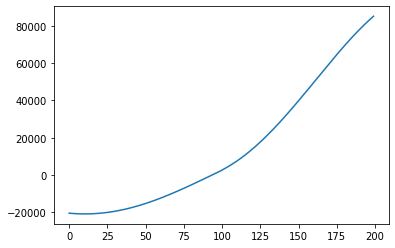